##Packages

In [ ]:
install.packages("googledrive")# Install required libraries
install.packages("tidyverse")
install.packages("conflicted")
install.packages("tsibble")
install.packages("reshape2")
install.packages("showtext")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘BH’, ‘anytime’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




In [ ]:
library(googledrive) # Load the library
library(tidyverse)
library(conflicted)
library(tsibble)
library(reshape2)
library(showtext)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr

Loading required package: sysfonts

Loading required package: showtextdb



In [ ]:
df<- read.csv("/content/filtered_districts_2010_2019.csv")

In [ ]:

df_filtered <- df %>%
  filter(District %in% c("Kathmandu", "Solukhumbu","Sarlahi"))


In [ ]:
write.csv(df_filtered, "filtered_districts_2010_2019.csv", row.names = FALSE)

In [ ]:
conflicted::conflicts_prefer(dplyr::filter)

[conflicted] Will prefer dplyr::filter over any other package.


In [ ]:
install.packages("caret")
install.packages("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’


Warning message in install.packages("caret"):
“installation of package ‘clock’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘timeDate’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘ModelMetrics’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘pROC’ had non-zero exit status”


In [ ]:
library(caret)
library(Metrics)

ERROR: Error in library(package, pos = pos, lib.loc = lib.loc, character.only = TRUE, : there is no package called ‘caret’


###Loading Dataset and data inspection

In [ ]:
# Authenticate with Google Drive
drive_auth()

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=f7eea0466dd681b89c349ae39d1d45a8&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVZNQnNKZzByMW5hMFRQOEJlOUd0SkVNeUhIUTJ6OEczdURjcjduTVhqRXlzbWRZeGcwSnNDajhIZy04dm5lN0ROaEhxQSIsInN0YXRlIjoiZjdlZWEwNDY2ZGQ2ODFiODljMzQ5YWUzOWQxZDQ1YTgifQ==


In [ ]:
file_name <- "dailyclimate.zip"  # Replace with your file name
file <- drive_get(file_name)

# Download the file to a local path
local_path <- "dailyclimate.zip"
drive_download(file, path = local_path, overwrite = TRUE)

zip_contents <- unzip(local_path, list = TRUE)
print(zip_contents)

✔ The input `path` resolved to exactly 1 file.

File downloaded:

• dailyclimate.zip <id: 1PCbv8QODYOGMIss0apSLApiqI5mV_2eD>

Saved locally as:

• dailyclimate.zip



              Name    Length                Date
1 dailyclimate.csv 116397291 2024-01-05 13:37:00


In [ ]:
climate_data <- read.csv(unz(local_path, "dailyclimate.csv"))

In [ ]:
dim(climate_data)

[1] 883128     23

In [ ]:
head(climate_data)

X Date       District     Latitude Longitude Precip Pressure Humidity_2m
1 0 1981-01-01 Arghakhanchi 27.9     83.2      0.00   93.51    4.81       
2 1 1981-01-02 Arghakhanchi 27.9     83.2      0.00   93.59    4.94       
3 2 1981-01-03 Arghakhanchi 27.9     83.2      0.03   93.55    5.22       
4 3 1981-01-04 Arghakhanchi 27.9     83.2      0.02   93.49    5.36       
5 4 1981-01-05 Arghakhanchi 27.9     83.2      1.84   93.49    5.84       
6 5 1981-01-06 Arghakhanchi 27.9     83.2      2.41   93.39    6.02       
  RH_2m Temp_2m ⋯ TempRange_2m EarthSkinTemp WindSpeed_10m MaxWindSpeed_10m
1 45.41 13.89   ⋯ 10.89        11.32         1.89          3.83            
2 46.78 13.84   ⋯ 11.17        11.44         1.72          2.60            
3 47.91 14.33   ⋯  9.93        12.24         1.80          2.80            
4 50.83 13.82   ⋯ 10.41        12.17         2.18          3.54            
5 55.55 13.76   ⋯ 10.53        12.32         1.96          2.70            
6 59.18 13.24   ⋯  9.53        11.81         1.91          3.62            
  MinWindSpeed_10m WindSpeedRange_10m WindSpeed_50m MaxWindSpeed_50m
1 0.69             3.14               2.41          4.12            
2 1.09             1.50               2.25          3.30            
3 0.48             2.32               2.32          3.54            
4 1.06             2.49               2.90          4.05            
5 0.69             2.02               2.74          4.64            
6 0.74             2.89               2.56          3.98            
  MinWindSpeed_50m WindSpeedRange_50m
1 0.73             3.39              
2 0.96             2.34              
3 0.39             3.15              
4 0.93             3.12              
5 0.96             3.68              
6 0.76             3.22

In [ ]:
str(climate_data)

'data.frame':	883128 obs. of  23 variables:
 $ X                 : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Date              : chr  "1981-01-01" "1981-01-02" "1981-01-03" "1981-01-04" ...
 $ District          : chr  "Arghakhanchi" "Arghakhanchi" "Arghakhanchi" "Arghakhanchi" ...
 $ Latitude          : num  27.9 27.9 27.9 27.9 27.9 27.9 27.9 27.9 27.9 27.9 ...
 $ Longitude         : num  83.2 83.2 83.2 83.2 83.2 83.2 83.2 83.2 83.2 83.2 ...
 $ Precip            : num  0 0 0.03 0.02 1.84 2.41 2.2 1.09 0.04 0 ...
 $ Pressure          : num  93.5 93.6 93.5 93.5 93.5 ...
 $ Humidity_2m       : num  4.81 4.94 5.22 5.36 5.84 6.02 6.12 5.12 4.75 4.68 ...
 $ RH_2m             : num  45.4 46.8 47.9 50.8 55.5 ...
 $ Temp_2m           : num  13.9 13.8 14.3 13.8 13.8 ...
 $ WetBulbTemp_2m    : num  2.15 2.54 3.32 3.73 4.93 5.23 5.58 3.02 2.04 1.84 ...
 $ MaxTemp_2m        : num  20.8 20.7 20.7 20.4 19.6 ...
 $ MinTemp_2m        : num  9.94 9.54 10.78 10.02 9.08 ...
 $ TempRange_2m      : num  10.89 11.17 9

In [ ]:
summary(climate_data)

       X              Date             District            Latitude    
 Min.   :     0   Length:883128      Length:883128      Min.   :26.50  
 1st Qu.:220782   Class :character   Class :character   1st Qu.:27.30  
 Median :441564   Mode  :character   Mode  :character   Median :27.95  
 Mean   :441564                                         Mean   :27.96  
 3rd Qu.:662345                                         3rd Qu.:28.50  
 Max.   :883127                                         Max.   :30.00  
   Longitude         Precip           Pressure       Humidity_2m    
 Min.   :80.20   Min.   :  0.000   Min.   : 54.73   Min.   : 0.270  
 1st Qu.:82.40   1st Qu.:  0.000   1st Qu.: 77.68   1st Qu.: 3.910  
 Median :84.30   Median :  0.050   Median : 83.72   Median : 6.750  
 Mean   :84.28   Mean   :  2.434   Mean   : 82.90   Mean   : 8.491  
 3rd Qu.:85.90   3rd Qu.:  1.870   3rd Qu.: 92.74   3rd Qu.:13.170  
 Max.   :87.90   Max.   :177.790   Max.   :100.34   Max.   :23.270  
     RH_2m   

Convert into tibble data frame

In [ ]:
 df_climate <- as_tibble(climate_data)

In [ ]:
head(df_climate)

##Data Cleaning

1.Check for null values

In [ ]:
mean(is.na(df_climate))


[1] 0

In [ ]:
sum(is.na(df_climate))

[1] 0

2.Delete unwanted column


In [ ]:
df_climate$X<- NULL

3.Change datatype of column "Date" from char to date type

In [ ]:
df_climate$Date <- as.Date(df_climate$Date, format = "%Y-%m-%d")


In [ ]:
df_filtered <- df_climate %>%
  filter(lubridate::year(Date) >= 2010 & lubridate::year(Date) <= 2019)


In [ ]:
dim(df_filtered)

[1] 226424     23

4.Check for duplicated columns


In [ ]:
duplicated(colnames(df_climate))

5.Set date as index


In [ ]:
# Convert data frame to tsibble
df_climate <- as_tsibble(df_climate, index= Date, key= District)

In [ ]:
index_name <- index_var(df_climate)
print(index_name)

In [ ]:
glimpse(df_climate)

In [ ]:
unique(df_climate$District)

[1] "Arghakhanchi"  "Baglung"       "Baitadi"       "Bajang"       
 [5] "Banke"         "Bara"          "Bardiya"       "Bhaktapur"    
 [9] "Chitawan"      "Dadeldhura"    "Dailekh"       "Dang"         
[13] "Darchula"      "Dhading"       "Dhankuta"      "Dhanusa"      
[17] "Dolkha"        "Dolpa"         "Doti"          "Gorkha"       
[21] "Gulmi"         "Humla"         "Ilam"          "Jhapa"        
[25] "Jumla"         "Kabhre"        "Kailali"       "Kanchanpur"   
[29] "Kaski"         "Kathmandu"     "Lalitpur"      "Lamjung"      
[33] "Mahottari"     "Makwanpur"     "Manang"        "Morang"       
[37] "Mugu"          "Mustang"       "Myagdi"        "Nawalparasi"  
[41] "Nuwakot"       "Okhaldhunga"   "Palpa"         "Panchther"    
[45] "Parbat"        "Rasuwa"        "Routahat"      "Rukum"        
[49] "Rupandehi"     "Salyan"        "Sankhuwasabha" "Saptari"      
[53] "Sarlahi"       "Sindhuli"      "Solukhumbu"    "Sunsari"      
[57] "Surkhet"       "Syangja"       "Tanahun"       "Taplejung"    
[61] "Terhathum"     "Udayapur"

In [ ]:

df_filtered <- df_climate %>%
  filter(District %in% c("Kathmandu", "Solukhumbu", "Rautahat", "Sarlahi", "Mustang"))


In [ ]:
dim(df_filtered)

[1] 56976    23

##Data Preparation

Extract month as number and label

In [ ]:
df_climate<- as.data.frame(df_climate,index= Date)

In [ ]:
# Extract month as number and label
df_climate <- df_climate %>%
  mutate(
    Month_Number = month(Date),  # Extract month as a number
    Month_Label = month(Date, label = TRUE, abbr = TRUE)  # Extract month as a label
  )

Create Season column

In [ ]:
df_climate <- df_climate %>%
  mutate(Season = case_when(
    month(Date) %in% c(12, 1, 2) ~ "Winter",
    month(Date) %in% c(3, 4, 5) ~ "Spring",
    month(Date) %in% c(6, 7, 8) ~ "Summer",
    month(Date) %in% c(9, 10, 11) ~ "Fall"
  ))


In [ ]:
head(df_climate)

In [ ]:
write.csv(df_filtered, "filtered_districts_2010_2019.csv", row.names = FALSE)

# QUALITY CONTROL

# A tibble: 62 × 2
   District     Record_Count
   <chr>               <int>
 1 Arghakhanchi        14244
 2 Baglung             14244
 3 Baitadi             14244
 4 Bajang              14244
 5 Banke               14244
 6 Bara                14244
 7 Bardiya             14244
 8 Bhaktapur           14244
 9 Chitawan            14244
10 Dadeldhura          14244
# ℹ 52 more rows


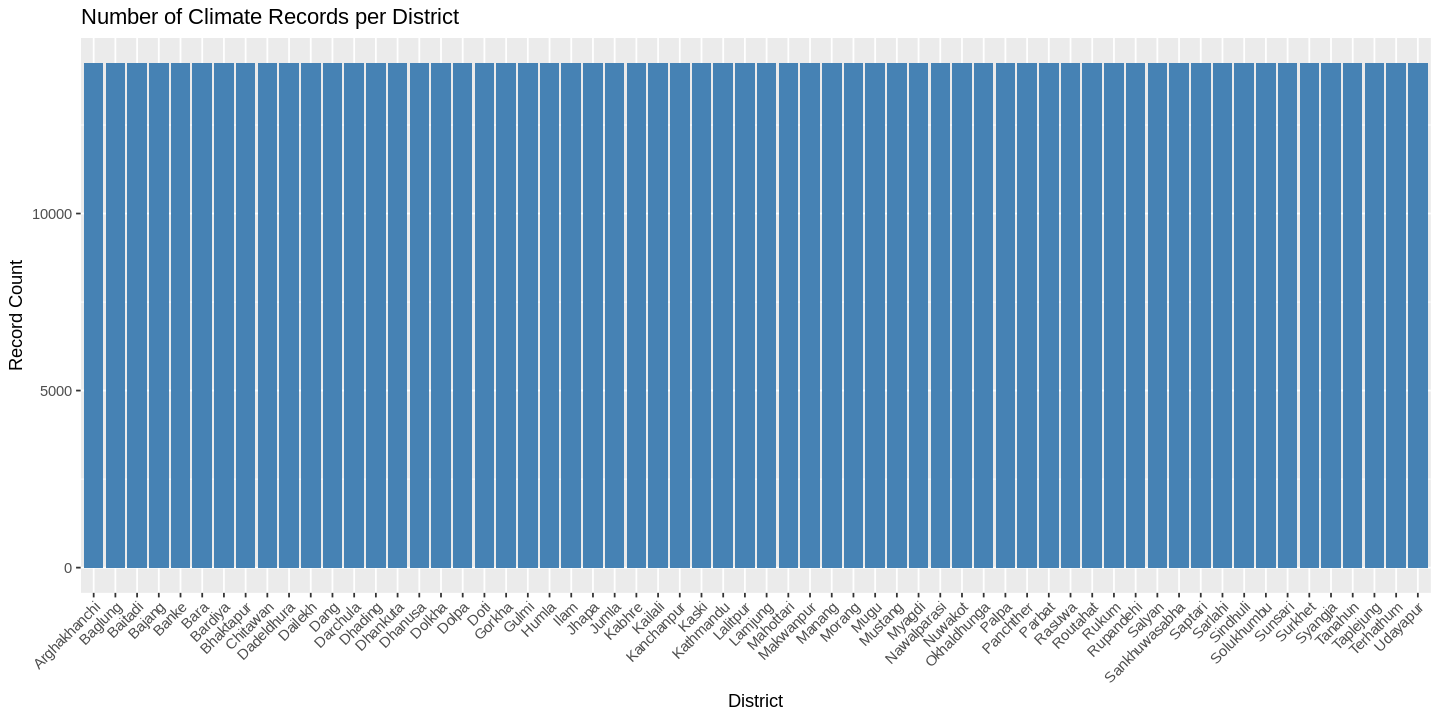

In [ ]:
district_counts <- df_climate %>%
  group_by(District) %>%
  summarise(Record_Count = n()) %>%
  arrange(desc(Record_Count))

# View the counts
print(district_counts)

# Set plot size (width x height in inches)
options(repr.plot.width = 12, repr.plot.height = 6)

# Plot the distribution
ggplot(district_counts, aes(x = reorder(District, -Record_Count), y = Record_Count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Number of Climate Records per District",
       x = "District",
       y = "Record Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

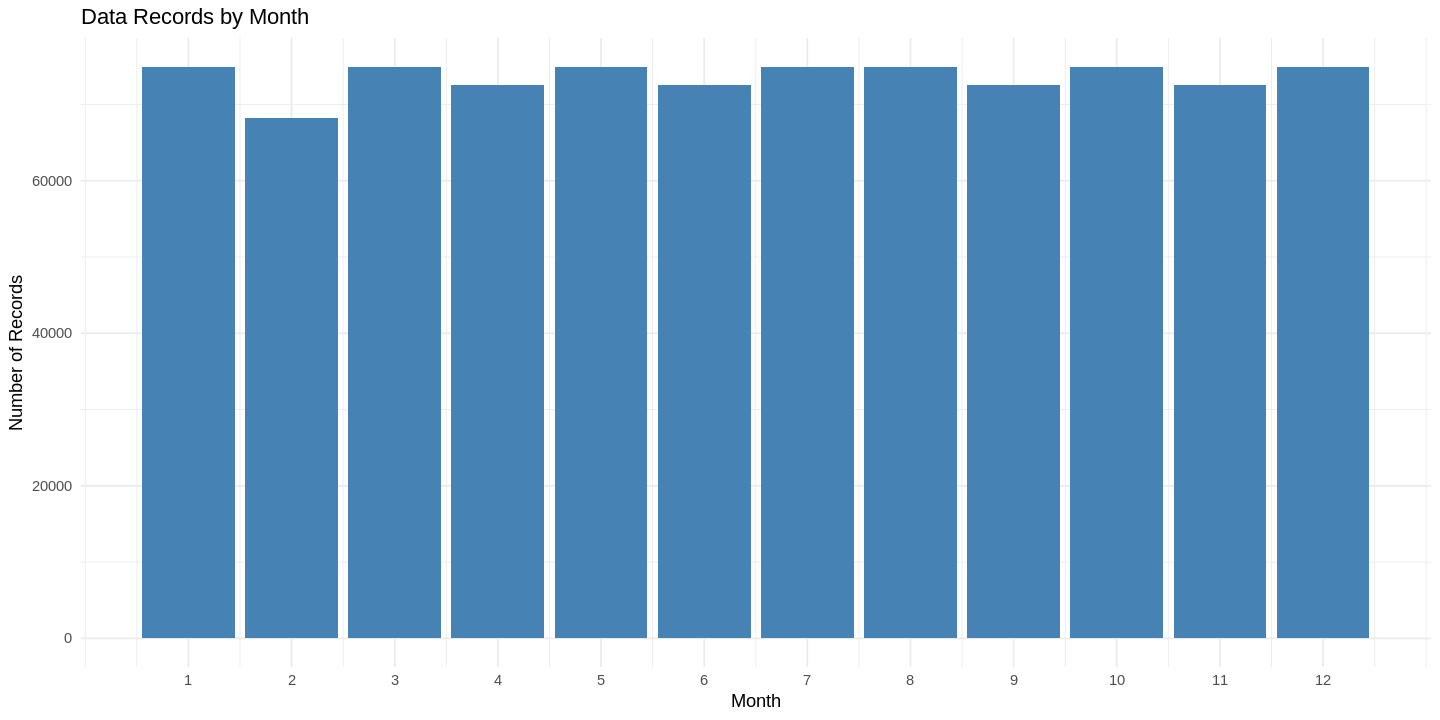

In [ ]:
df_climate$Month <- format(df_climate$Date, "%m")

# Count records per month
month_counts <- df_climate %>%
  group_by(Month_Label) %>%
  summarise(Count = n())

# Plot counts by month
ggplot(month_counts, aes(x = as.integer(Month_Label), y = Count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Data Records by Month",
       x = "Month",
       y = "Number of Records") +
  scale_x_continuous(breaks = 1:12) +
  theme_minimal()

In [ ]:
install.packages("qcc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



List of 11
 $ call      : language qcc(data = df_climate$Temp_2m, type = "xbar.one", title = "Control Chart - 2m Temperature")
 $ type      : chr "xbar.one"
 $ data.name : chr "df_climate$Temp_2m"
 $ data      : num [1:883128, 1] 13.9 13.8 14.3 13.8 13.8 ...
  ..- attr(*, "dimnames")=List of 2
 $ statistics: Named num [1:883128] 13.9 13.8 14.3 13.8 13.8 ...
  ..- attr(*, "names")= chr [1:883128] "1" "2" "3" "4" ...
 $ sizes     : int [1:883128] 1 1 1 1 1 1 1 1 1 1 ...
 $ center    : num 15.8
 $ std.dev   : num 0.579
 $ nsigmas   : num 3
 $ limits    : num [1, 1:2] 14.1 17.6
  ..- attr(*, "dimnames")=List of 2
 $ violations:List of 2
 - attr(*, "class")= chr "qcc"

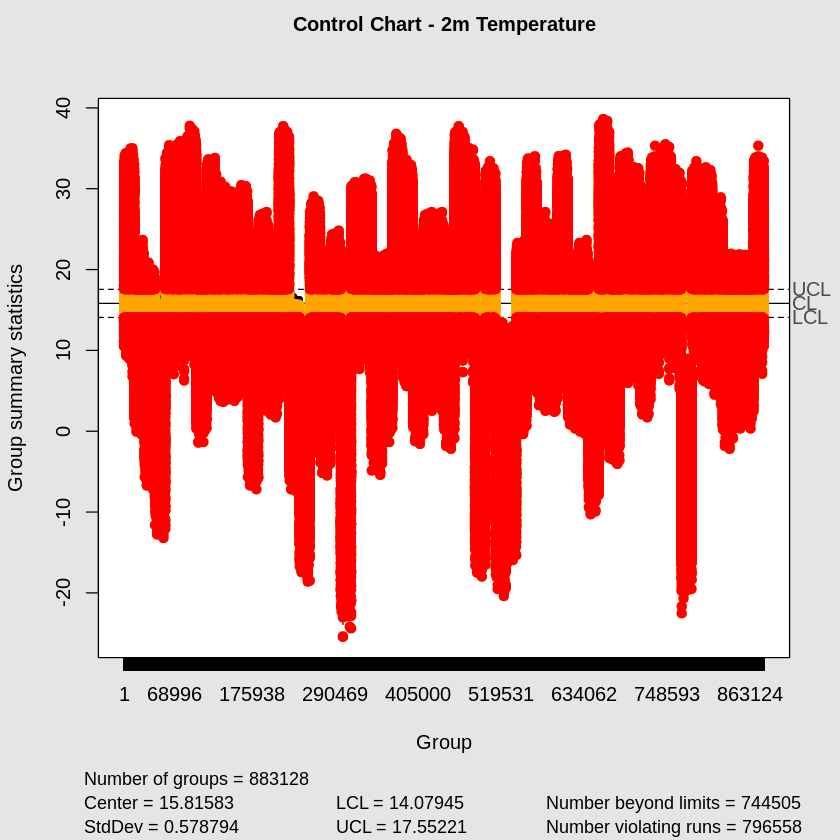

In [ ]:
library(qcc)
# Generate control chart for 2m temperature
qcc(df_climate$Temp_2m, type = "xbar.one", title = "Control Chart - 2m Temperature")


In [ ]:
# Assuming df is your data frame and Temp_2m is the temperature column

# Filter extreme heat days
extreme_days <- df_climate[df_climate$Temp_2m > 35, ]

# Calculate percentage
extreme_percent <- (nrow(extreme_days) / nrow(df_climate)) * 100

# Print result
cat(sprintf("Extreme Heat Days: %.2f%%\n", extreme_percent))


Extreme Heat Days: 0.13%


In [ ]:
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



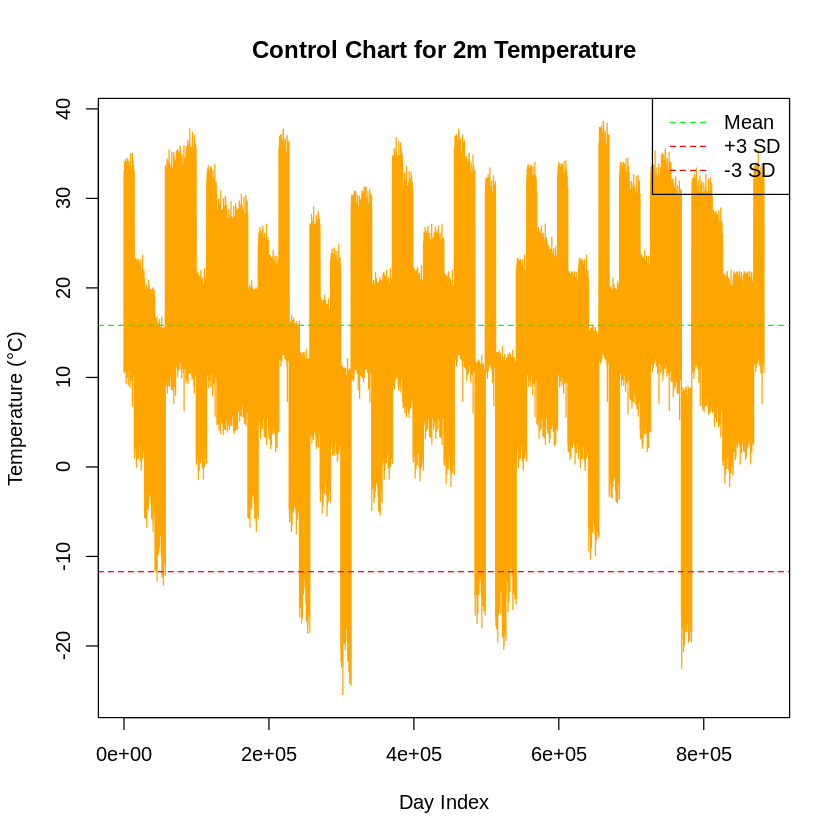

In [ ]:
mean_temp <- mean(df_climate$Temp_2m, na.rm = TRUE)
sd_temp <- sd(df_climate$Temp_2m, na.rm = TRUE)

plot(df_climate$Temp_2m, type = "l", col = "orange", main = "Control Chart for 2m Temperature",
     ylab = "Temperature (°C)", xlab = "Day Index")
abline(h = mean_temp, col = "green", lty = 2)
abline(h = mean_temp + 3 * sd_temp, col = "red", lty = 2)
abline(h = mean_temp - 3 * sd_temp, col = "red", lty = 2)
legend("topright", legend = c("Mean", "+3 SD", "-3 SD"),
       col = c("green", "red", "red"), lty = 2)


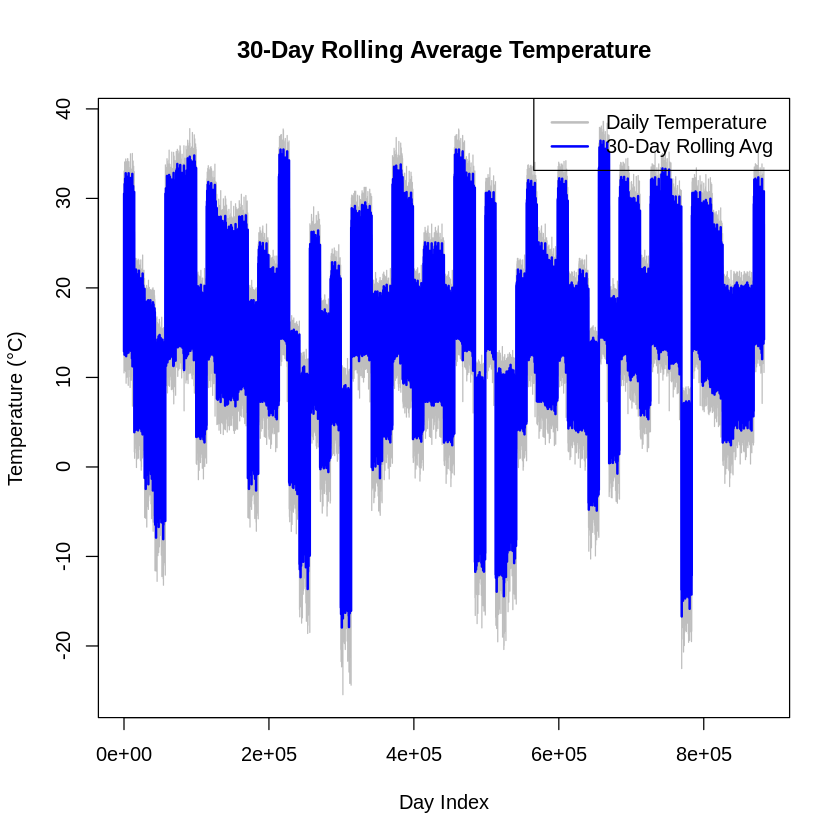

In [ ]:
# Load required library
library(zoo)

# Calculate 30-day rolling average of temperature
df_climate$Temp_2m_RollingAvg <- rollmean(df_climate$Temp_2m, k = 30, fill = NA)

# Plot original temperature and rolling average
plot(df_climate$Temp_2m, type = 'l', col = 'gray', lwd = 1,
     main = "30-Day Rolling Average Temperature",
     ylab = "Temperature (°C)", xlab = "Day Index")

lines(df_climate$Temp_2m_RollingAvg, col = 'blue', lwd = 2)
legend("topright", legend = c("Daily Temperature", "30-Day Rolling Avg"),
       col = c("gray", "blue"), lty = 1, lwd = 2)


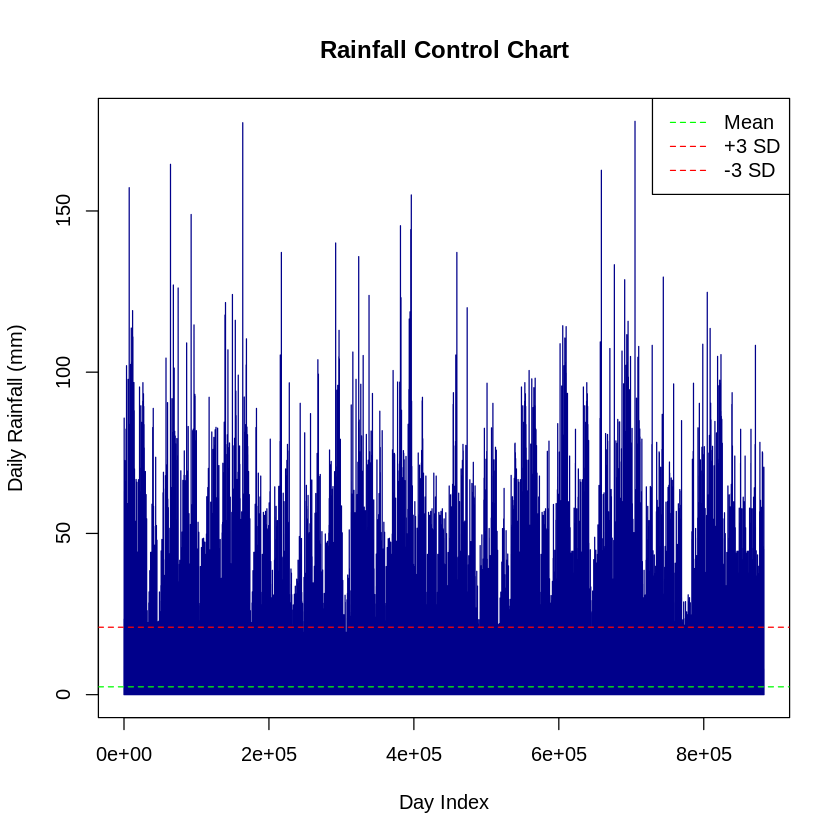

In [ ]:
mean_rain <- mean(df_climate$Precip, na.rm = TRUE)
sd_rain <- sd(df_climate$Precip, na.rm = TRUE)

plot(df_climate$Precip, type = "l", col = "darkblue", main = "Rainfall Control Chart",
     ylab = "Daily Rainfall (mm)", xlab = "Day Index")
abline(h = mean_rain, col = "green", lty = 2)
abline(h = mean_rain + 3*sd_rain, col = "red", lty = 2)
abline(h = mean_rain - 3*sd_rain, col = "red", lty = 2)
legend("topright", legend = c("Mean", "+3 SD", "-3 SD"),
       col = c("green", "red", "red"), lty = 2)

In [ ]:
ktm_rain <- df_climate[df_climate$District == "Kathmandu", "Precip"]
pkr_rain <- df_climate[df_climate$District == "Kaski", "Precip"]

t.test(ktm_rain, pkr_rain)


	Welch Two Sample t-test

data:  ktm_rain and pkr_rain
t = -3.228, df = 27679, p-value = 0.001248
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.35810549 -0.08751933
sample estimates:
mean of x mean of y 
 2.326257  2.549069 


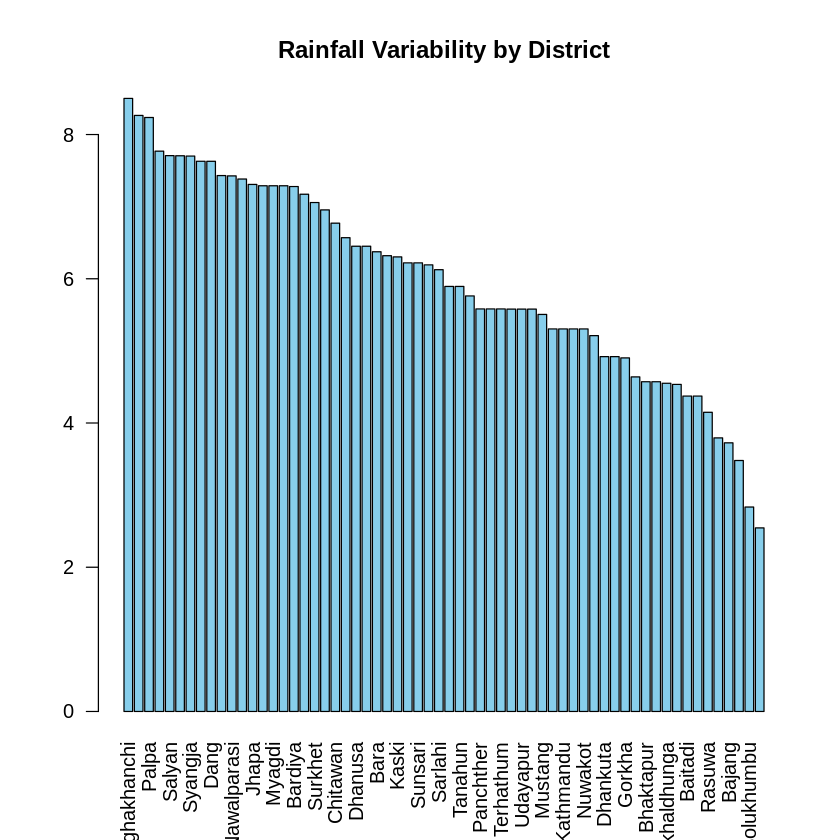

In [ ]:
rain_var <- df_climate %>% group_by(District) %>%
  summarise(Rain_SD = sd(Precip, na.rm = TRUE)) %>%
  arrange(desc(Rain_SD))

barplot(rain_var$Rain_SD, names.arg = rain_var$District, las = 2,
        main = "Rainfall Variability by District", col = "skyblue")

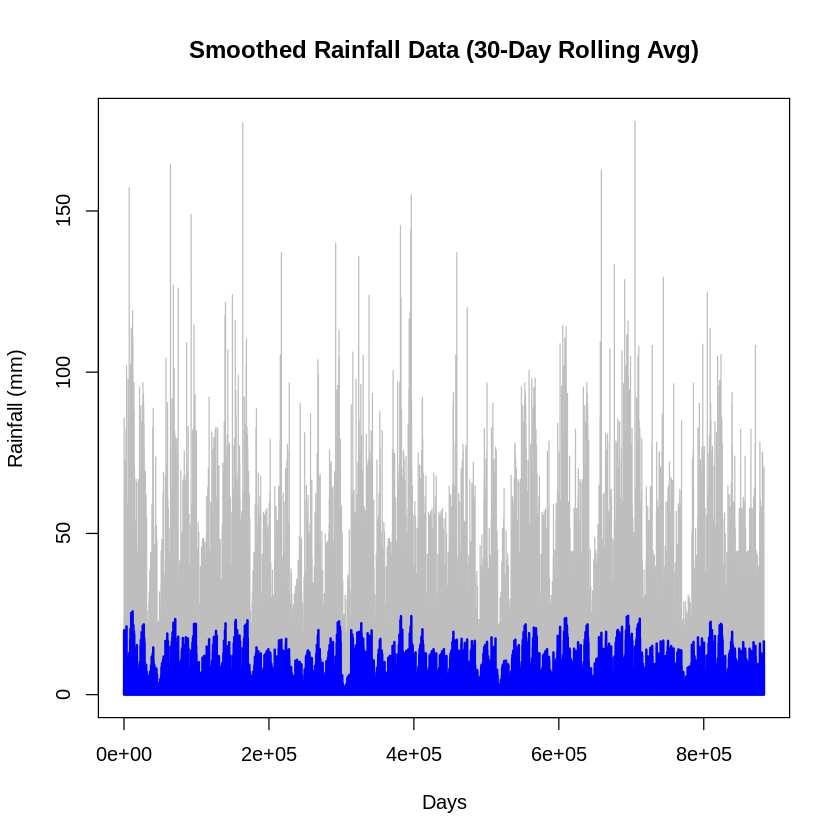

In [ ]:
df_climate$Rainfall_RollAvg <- rollmean(df_climate$Precip, k = 30, fill = NA)

plot(df_climate$Precip, type = 'l', col = 'gray',
     main = 'Smoothed Rainfall Data (30-Day Rolling Avg)',
     ylab = 'Rainfall (mm)', xlab = 'Days')
lines(df_climate$Rainfall_RollAvg, col = 'blue', lwd = 2)

In [ ]:
extreme_days <- df_climate[df_climate$Precip > 100, ]  # Adjust threshold as needed
extreme_percent <- (nrow(extreme_days) / nrow(df)) * 100
cat(sprintf("Extreme Rainfall Days: %.2f%%\n", extreme_percent))

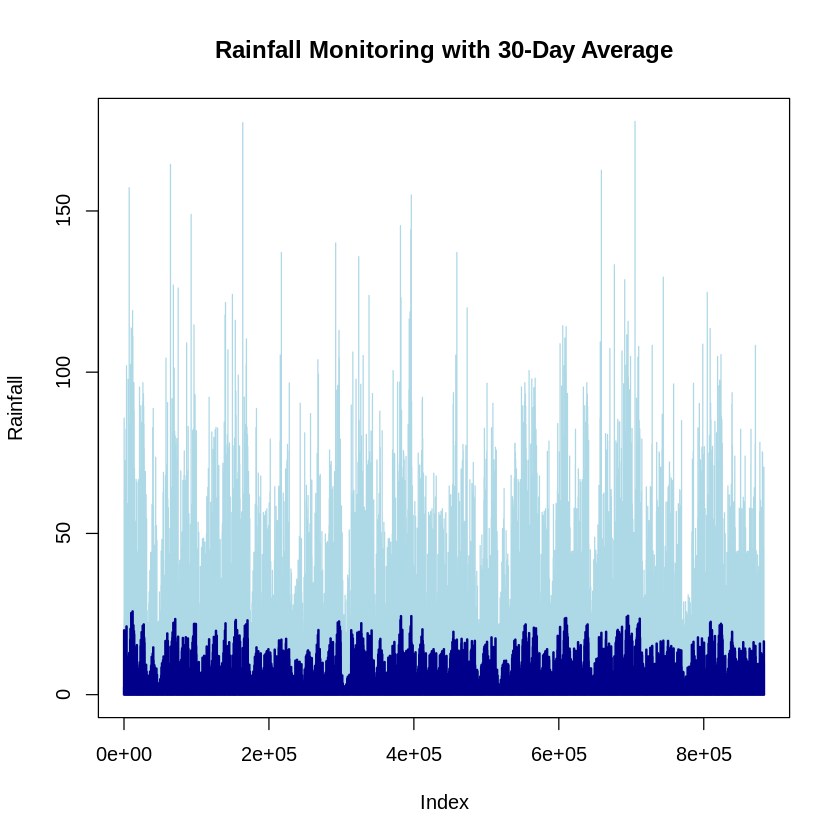

In [ ]:
plot(df_climate$Precip, type = 'l', col = 'lightblue',
     main = 'Rainfall Monitoring with 30-Day Average', ylab = 'Rainfall')
lines(df_climate$Rainfall_RollAvg, col = 'darkblue', lwd = 2)

In [ ]:
library(ggplot2)
library(scales)

mean_temp <- mean(df_climate$Temp_2m, na.rm = TRUE)
sd_temp <- sd(df_climate$Temp_2m, na.rm = TRUE)

ggplot(df_climate, aes(x = Date, y = Temp_2m)) +
  geom_line(color = "steelblue") +
  geom_hline(yintercept = mean_temp, color = "green", linetype = "dashed") +
  geom_hline(yintercept = mean_temp + 3*sd_temp, color = "red", linetype = "dashed") +
  geom_hline(yintercept = mean_temp - 3*sd_temp, color = "red", linetype = "dashed") +
  scale_x_date(date_breaks = "5 years", date_labels = "%Y") +
  labs(title = "Control Chart: Daily Temperature at 2m (1980–2020)",
       x = "Year", y = "Temperature (°C)") +
  theme_minimal()


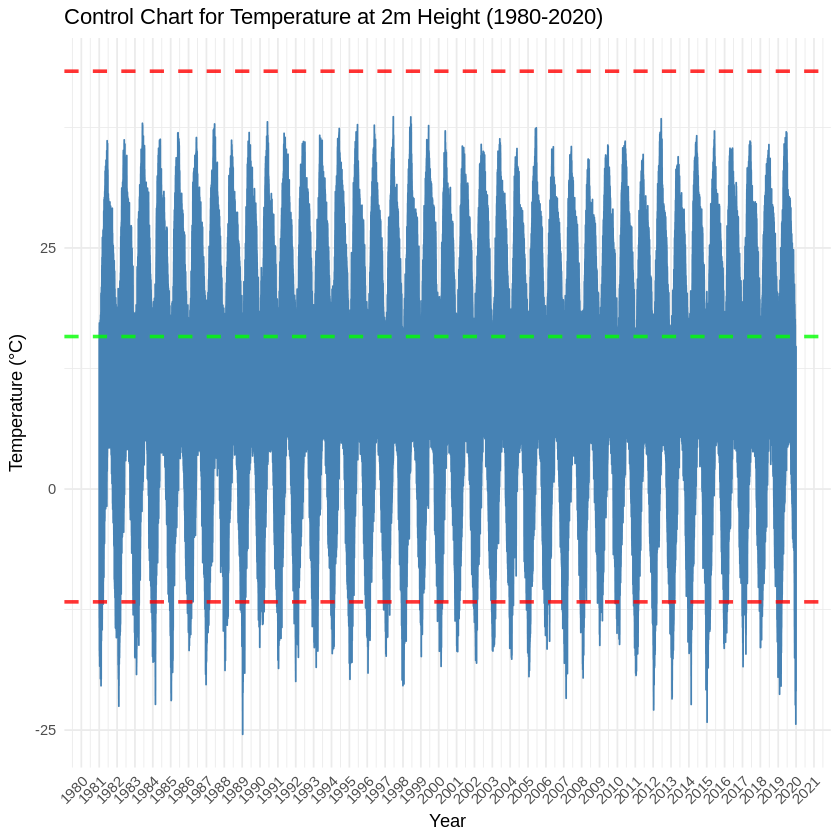

In [ ]:
# Calculate mean and standard deviation
mean_temp <- mean(df_climate$Temp_2m, na.rm = TRUE)
sd_temp <- sd(df_climate$Temp_2m, na.rm = TRUE)

# Create the control chart
ggplot(df_climate, aes(x = Date, y = Temp_2m)) +
  geom_line(color = "steelblue") +
  geom_hline(yintercept = mean_temp, color = "green", linetype = "dashed", size = 1, alpha = 0.8) +
  geom_hline(yintercept = mean_temp + 3 * sd_temp, color = "red", linetype = "dashed", size = 1, alpha = 0.8) +
  geom_hline(yintercept = mean_temp - 3 * sd_temp, color = "red", linetype = "dashed", size = 1, alpha = 0.8) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  labs(title = "Control Chart for Temperature at 2m Height (1980-2020)",
       x = "Year",
       y = "Temperature (°C)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
# Convert date to year
df_climate$Year <- format(as.Date(df_climate$Date), "%Y")
df_climate$Year <- as.numeric(df_climate$Year)

# Subset data for 1980s and 2010s
temp_1980s <- df_climate %>% filter(Year >= 1980 & Year <= 1989) %>% pull(Temp_2m)
temp_2010s <- df_climate %>% filter(Year >= 2010 & Year <= 2019) %>% pull(Temp_2m)

# Perform independent two-sample t-test
t_result <- t.test(temp_1980s, temp_2010s)
print(t_result)


	Welch Two Sample t-test

data:  temp_1980s and temp_2010s
t = -4.9089, df = 423777, p-value = 9.16e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.19315334 -0.08292498
sample estimates:
mean of x mean of y 
 15.58887  15.72691 



In [ ]:
summer <- df_climate[df_climate$Season == "Summer", "Temp_2m"]
winter <- df_climate[df_climate$Season == "Winter", "Temp_2m"]
t_test <- t.test(summer, winter)
print(t_test)



	Welch Two Sample t-test

data:  summer and winter
t = 602.19, df = 425401, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 13.01417 13.09917
sample estimates:
mean of x mean of y 
21.397418  8.340748 



`geom_smooth()` using formula = 'y ~ x'


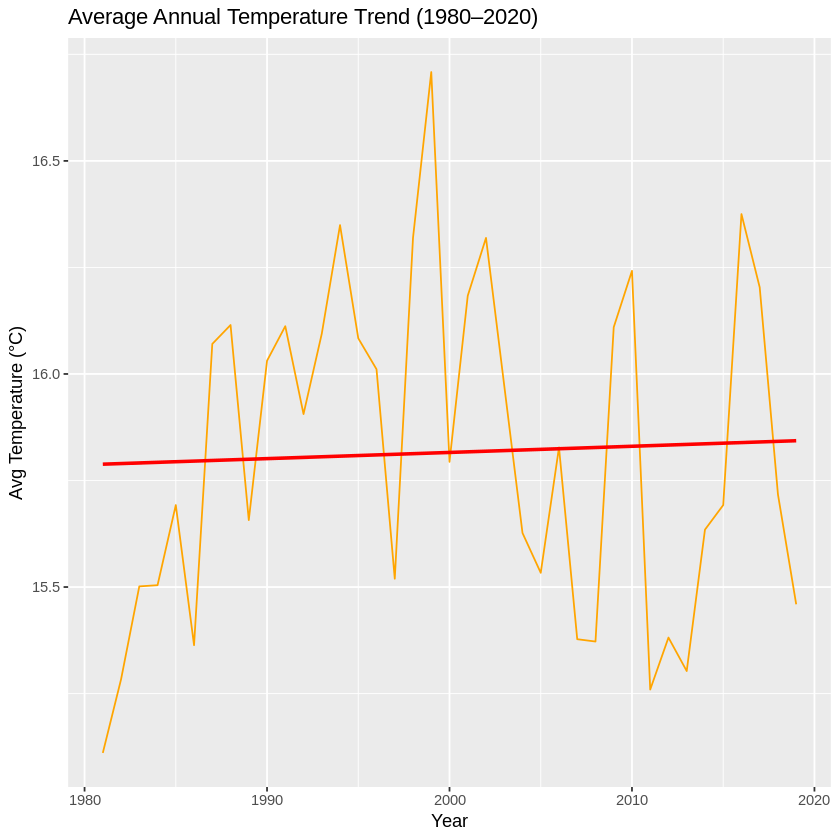

In [ ]:

df_climate$Year <- format(df_climate$Date, "%Y")
annual_avg <- df_climate %>%
  group_by(Year) %>%
  summarise(Avg_Temp = mean(Temp_2m, na.rm = TRUE))

ggplot(annual_avg, aes(x = as.numeric(Year), y = Avg_Temp)) +
  geom_line(color = "orange") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Average Annual Temperature Trend (1980–2020)",
       x = "Year", y = "Avg Temperature (°C)")


In [ ]:
outliers <- df_climate %>%
  filter(Temp_2m > mean_temp + 3*sd_temp | Temp_2m < mean_temp - 3*sd_temp)

# Print the number of outlier rows
cat("Number of outliers:", nrow(outliers), "\n")



Number of outliers: 4973 


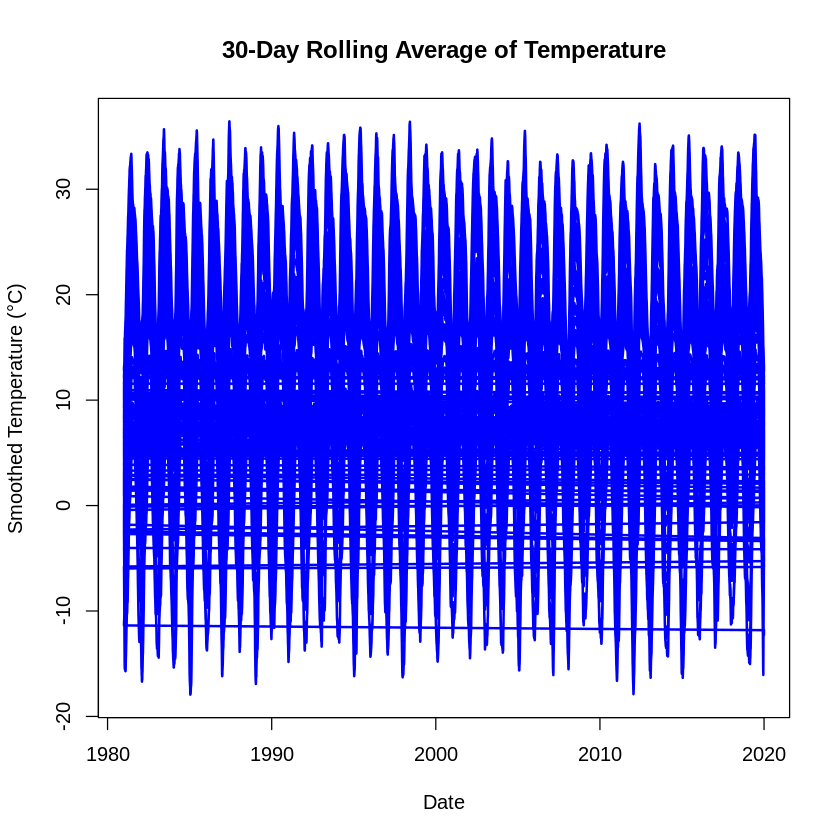

In [ ]:
# Compute 30-day rolling average
df_climate$Temp_Smooth <- rollmean(df_climate$Temp_2m, k = 30, fill = NA)

# Plot only the smoothed temperature line
plot(df_climate$Date, df_climate$Temp_Smooth, type = 'l',
     col = 'blue', lwd = 2,
     xlab = "Date", ylab = "Smoothed Temperature (°C)",
     main = "30-Day Rolling Average of Temperature")


In [ ]:
extreme_days <- df_climate %>% filter(Temp_2m > 35)
extreme_percent <- (nrow(extreme_days) / nrow(df_climate)) * 100
cat(sprintf("Extreme Heat Days: %.2f%%\n", extreme_percent))

Extreme Heat Days: 0.13%


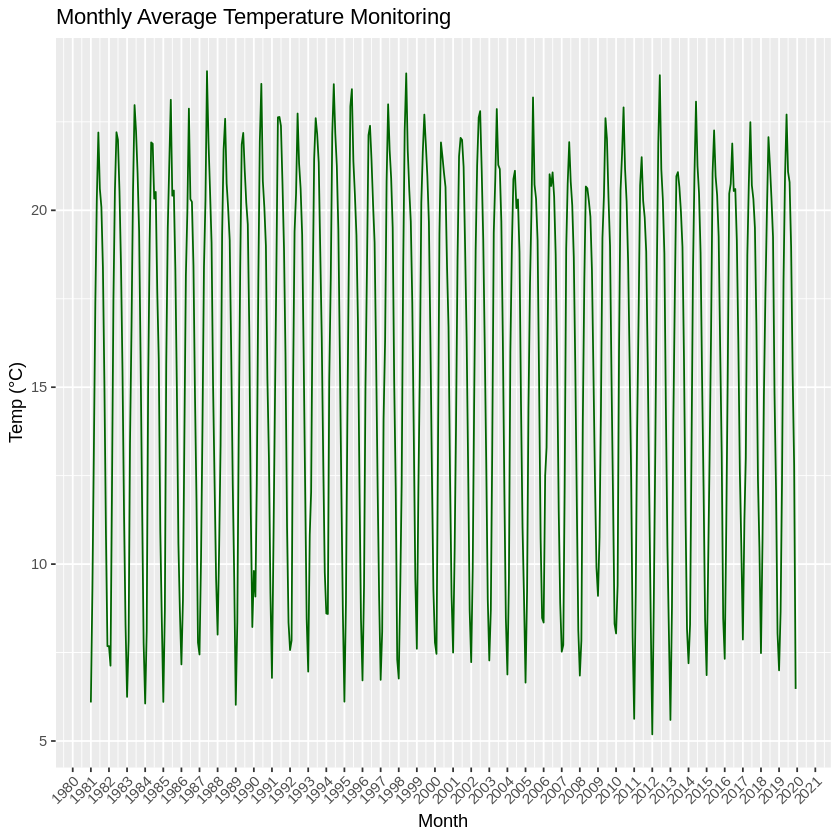

In [ ]:
df_climate$Month <- format(df_climate$Date, "%Y-%m")
monthly_avg <- df_climate %>%
  group_by(Month) %>%
  summarise(Monthly_Temp = mean(Temp_2m, na.rm = TRUE))

ggplot(monthly_avg, aes(x = as.Date(paste0(Month, "-01")), y = Monthly_Temp)) +
  geom_line(color = "darkgreen") +
  labs(title = "Monthly Average Temperature Monitoring",
       x = "Month", y = "Temp (°C)") +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


##BUILD MODEL

In [ ]:
# Split into training and testing datasets (80/20)
set.seed(42)
train_index <- createDataPartition(df_climate$Temp_2m, p = 0.8, list = FALSE)
train_data <- df_climate[train_index, ]
test_data <- df_climate[-train_index, ]


In [ ]:
# Fit a linear regression model
lm_model <- lm(Temp_2m ~ Humidity_2m + Pressure +WindSpeed_10m + Latitude + Longitude + Season+0 + District +0 , data = train_data)

# Summary of the model
summary(lm_model)


In [ ]:
install.packages("car")
# Load the required package
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:


# Calculate VIF for the model
vif.lm(lm_model)


ERROR: Error in vif.lm(lm_model): could not find function "vif.lm"


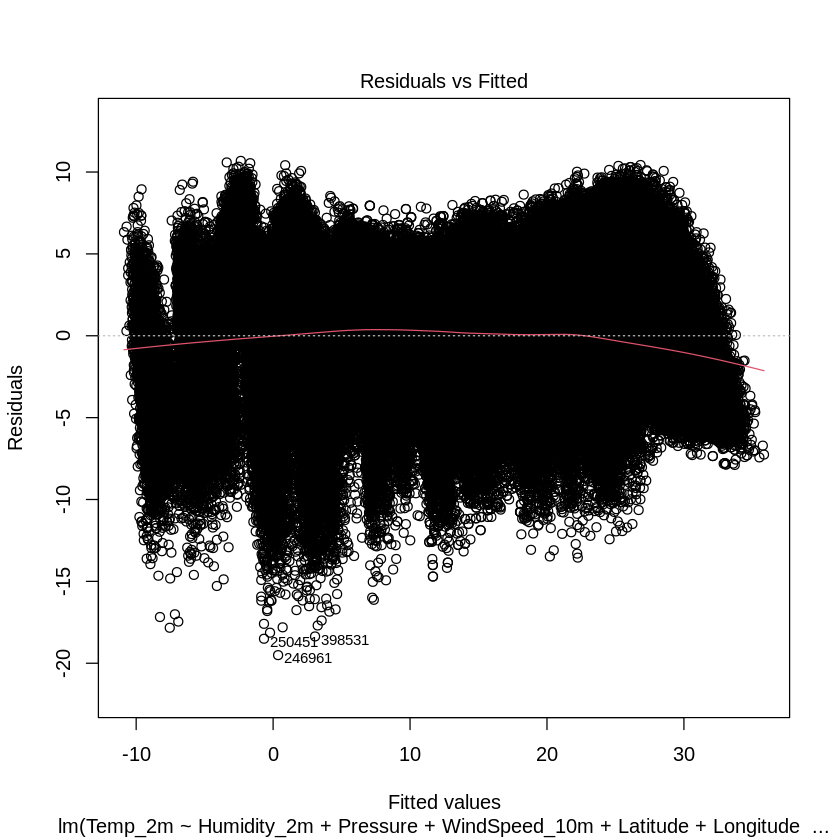

In [ ]:
# Plot Residual vs. Fitted
plot(lm_model, which = 1)


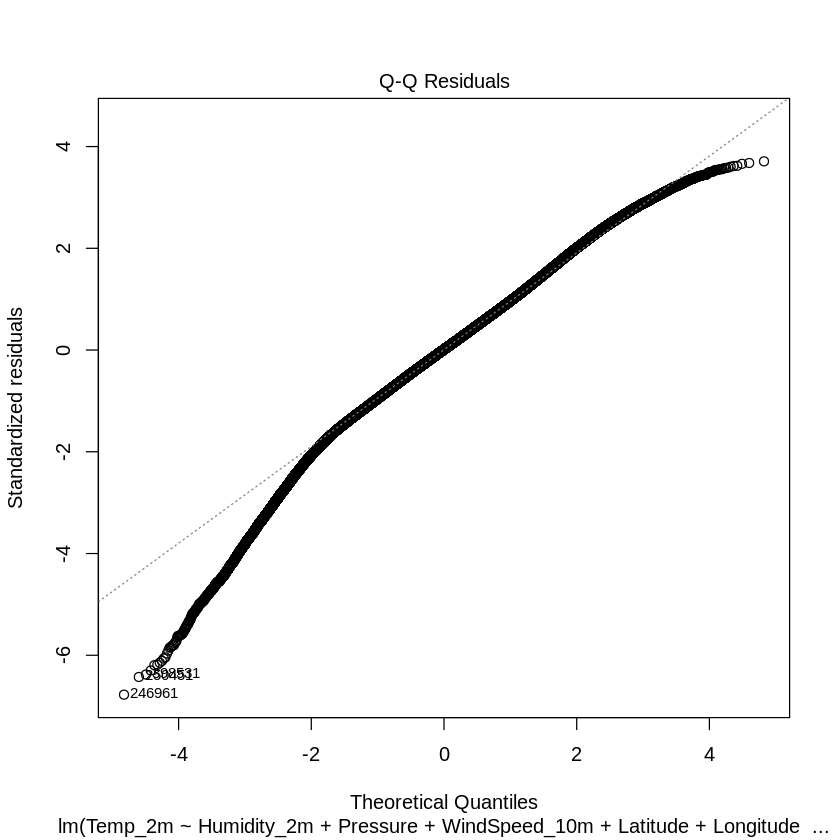

In [ ]:
# Q-Q plot
plot(lm_model, which = 2)


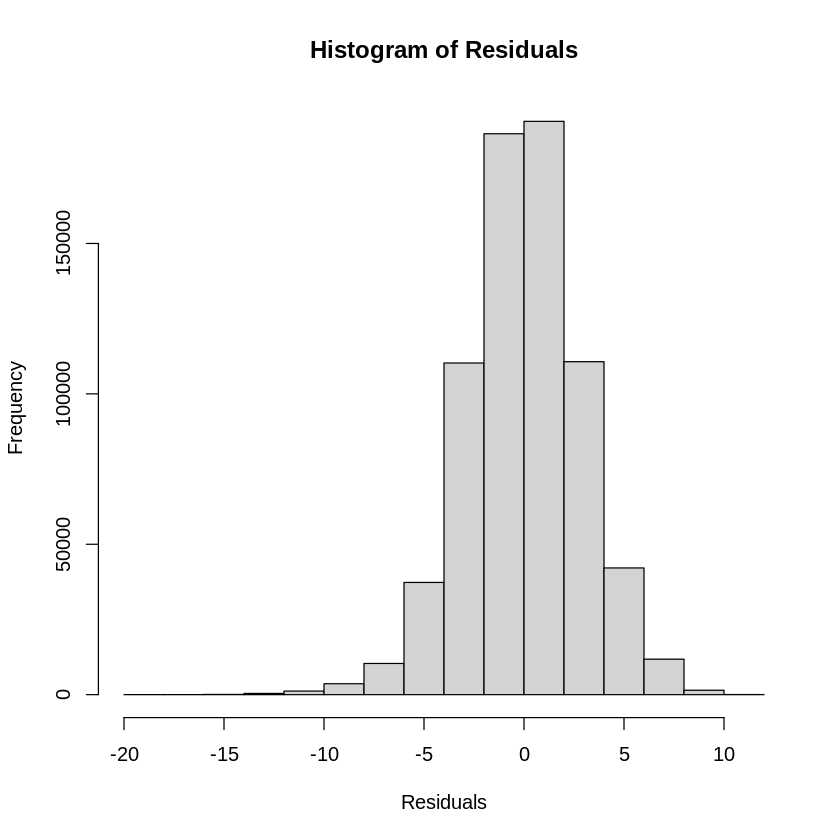

In [ ]:
# Residual histogram
hist(residuals(lm_model), main="Histogram of Residuals", xlab="Residuals")


In [ ]:
# Check for influential points using Cook's Distance
plot(model, which = 4)


In [ ]:
# Predict on the test data
test_predictions <- predict(lm_model, newdata = test_data)

# Evaluate performance
rmse_value <- rmse(test_data$Temp_2m, test_predictions)
rsq_value <- cor(test_data$Temp_2m, test_predictions)^2

cat("RMSE: ", rmse_value, "\n")
cat("R-squared: ", rsq_value, "\n")


RMSE:  2.880651 
R-squared:  0.9014059 


##Box plot

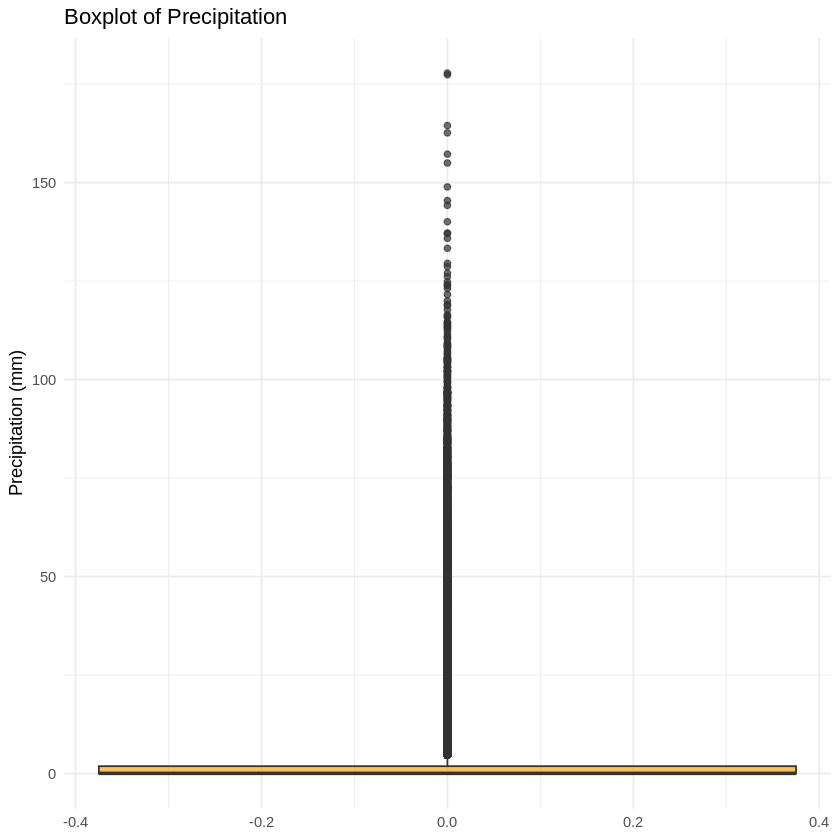

In [ ]:
# Boxplot for Precipitation
ggplot(df_climate, aes(y = Precip)) +
  geom_boxplot(fill = "orange", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Boxplot of Precipitation", y = "Precipitation (mm)")

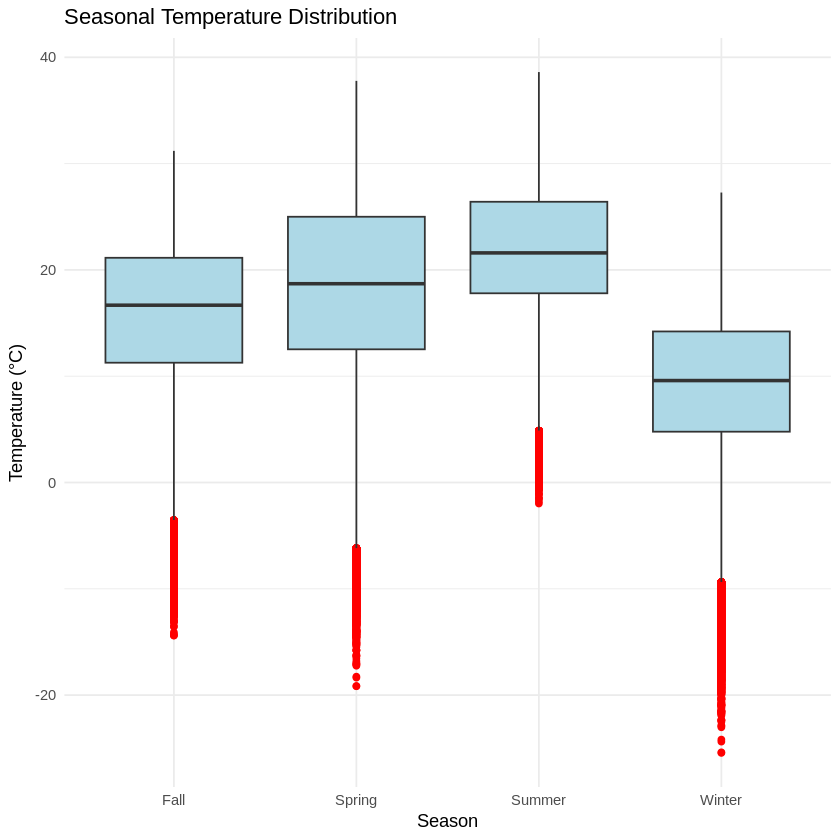

In [ ]:

# Create a box plot for temperature distribution by month
ggplot(df_climate, aes(x = Season, y = Temp_2m)) +
  geom_boxplot(fill = "lightblue", outlier.color = "red") +
  labs(title = "Seasonal Temperature Distribution",
       x = "Season",
       y = "Temperature (°C)") +
  theme_minimal()


##Trend Analysis of Temperature and Precipitation


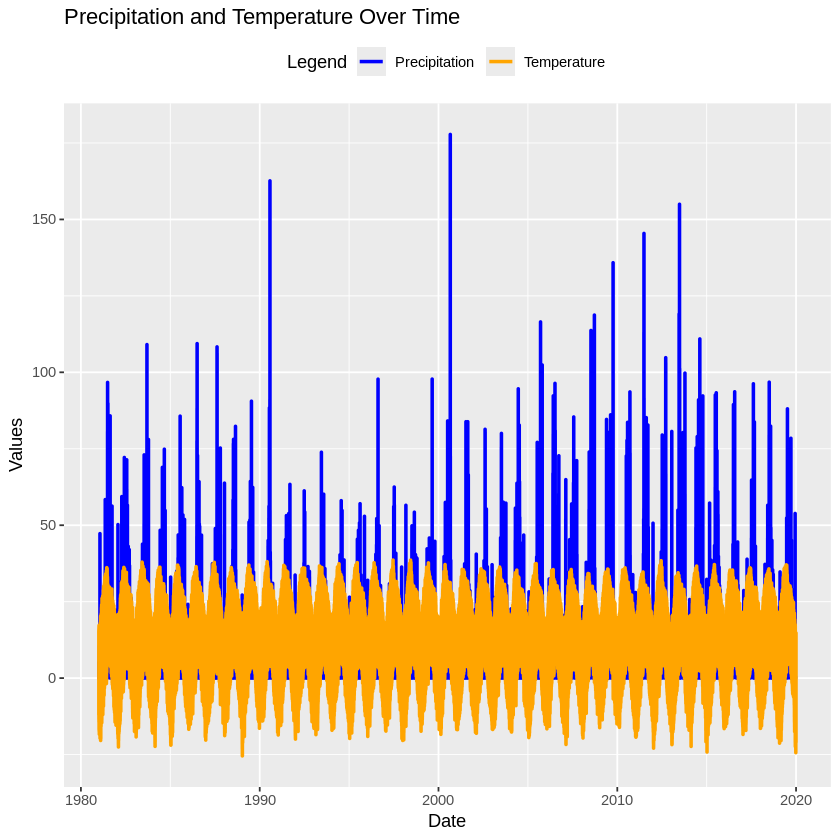

In [ ]:
# Create the plot
ggplot(df_climate, aes(x = Date)) +
  geom_line(aes(y = Precip, color = 'Precipitation'), linewidth = 1) +
  geom_line(aes(y = Temp_2m, color = 'Temperature'), linewidth = 1) +
  labs(title = 'Precipitation and Temperature Over Time',
       x = 'Date',
       y = 'Values') +
  scale_color_manual(name = 'Legend', values = c('Precipitation' = 'blue', 'Temperature' = 'orange')) +
  theme(legend.position = 'top')  # Adjust legend position as needed


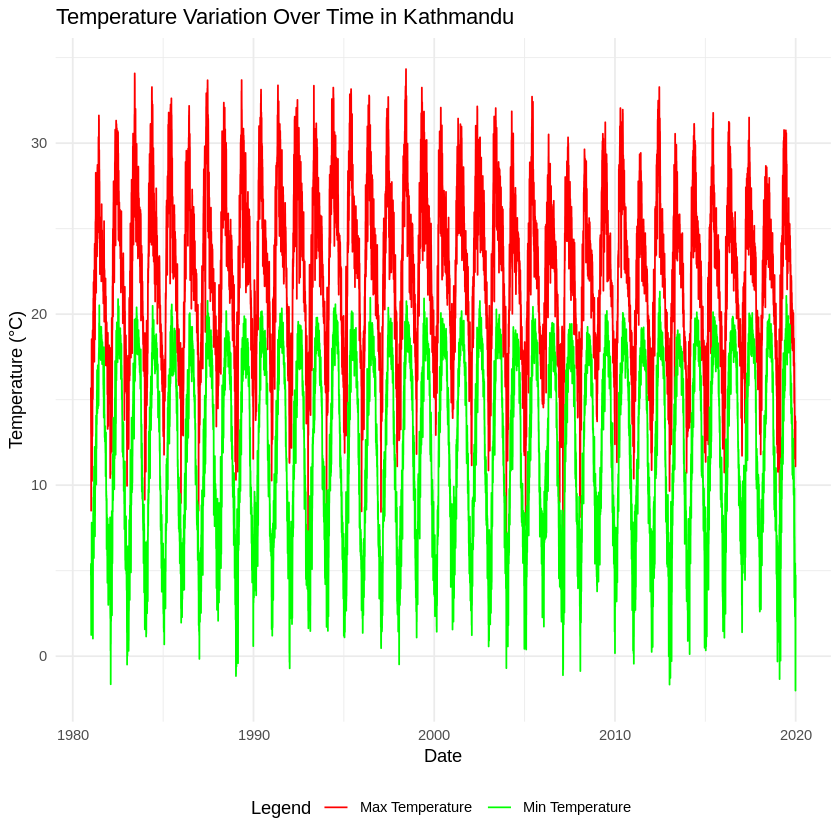

In [ ]:

district_ktm <- df_climate %>%
  dplyr::filter(District == "Kathmandu")

# Create a time series plot for temperature variation
ggplot(district_ktm, aes(x = Date)) +
  geom_line(aes(y = MaxTemp_2m, color = "Max Temperature")) +  # Max Temperature
  geom_line(aes(y = MinTemp_2m, color = "Min Temperature")) +  # Min Temperature
  labs(title = "Temperature Variation Over Time in Kathmandu",
       x = "Date",
       y = "Temperature (°C)",
       color = "Legend") +
  theme_minimal() +
  scale_color_manual(values = c(
                                  "Max Temperature" = "red",
                                  "Min Temperature" = "green")) +
  theme(legend.position = "bottom")


###Yearly trend analysis

In [ ]:
df_yearly <- df_climate %>%
  group_by(Year = format(Date, "%Y")) %>%
  summarise(
    AvgTemp = mean(Temp_2m, na.rm = TRUE),
    AvgPrecip = mean(Precip, na.rm = TRUE),
    AvgHumidity = mean(Humidity_2m, na.rm = TRUE)
  )


`geom_smooth()` using formula = 'y ~ x'


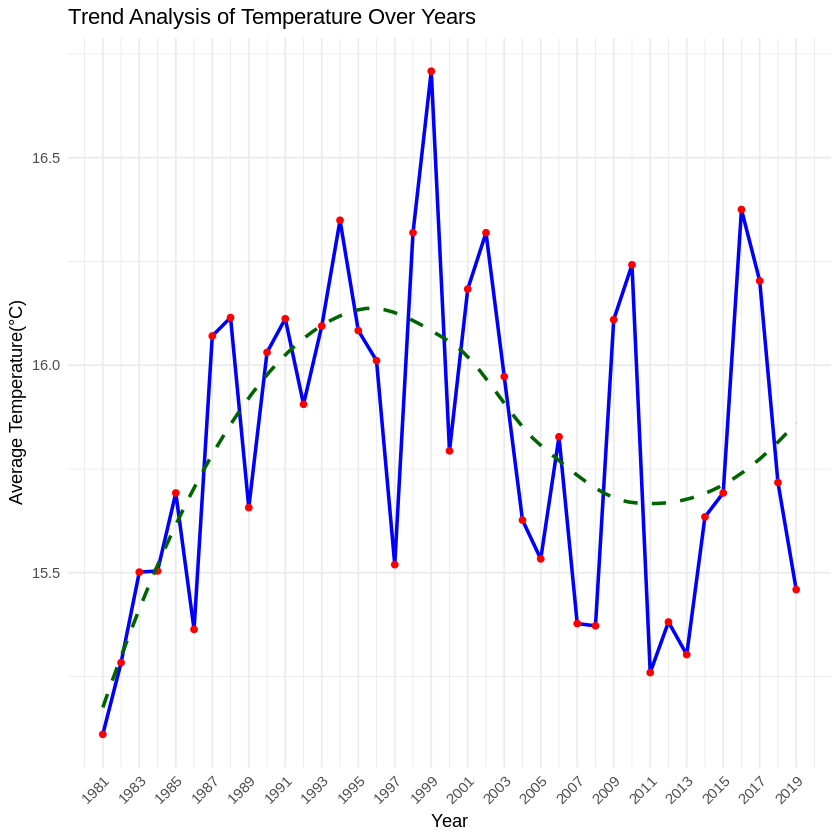

In [ ]:
# Plot the trend over years
ggplot(df_yearly, aes(x = as.numeric(Year), y = AvgTemp)) +
  geom_line(color = "blue", size = 1) +  # Line plot for trend
  geom_point(color = "red") +  # Add points for each year's average
  geom_smooth(method = "loess", color = "darkgreen", linetype = "dashed", size = 1,se= FALSE) +  # Smoothed trend line
  labs(title = "Trend Analysis of Temperature Over Years",
       x = "Year",
       y = "Average Temperature(°C)") +
      scale_x_continuous(breaks = seq(min(df_yearly$Year), max(df_yearly$Year), by = 2)) +  # Set interval
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

`geom_smooth()` using formula = 'y ~ x'


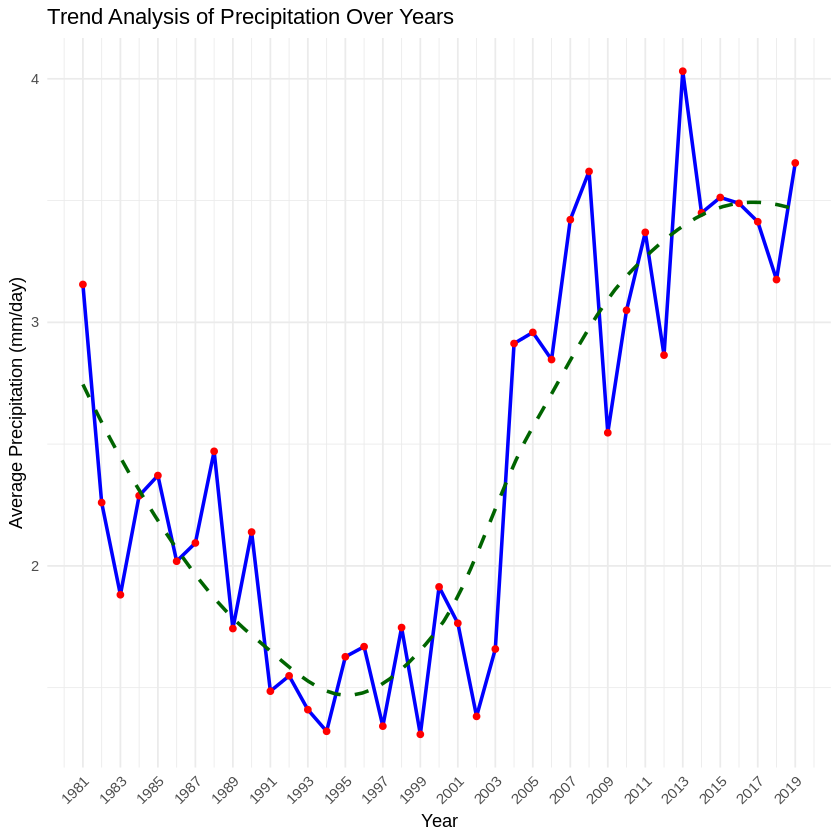

In [ ]:
# Plot the trend over years
ggplot(df_yearly, aes(x = as.numeric(Year), y = AvgPrecip)) +
  geom_line(color = "blue", size = 1) +  # Line plot for trend
  geom_point(color = "red") +  # Add points for each year's average
  geom_smooth(method = "loess", color = "darkgreen", linetype = "dashed", size = 1,se= FALSE) +  # Smoothed trend line
  labs(title = "Trend Analysis of Precipitation Over Years",
       x = "Year",
       y = "Average Precipitation (mm/day)") +
      scale_x_continuous(breaks = seq(min(df_yearly$Year), max(df_yearly$Year), by = 2)) +  # Set interval
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


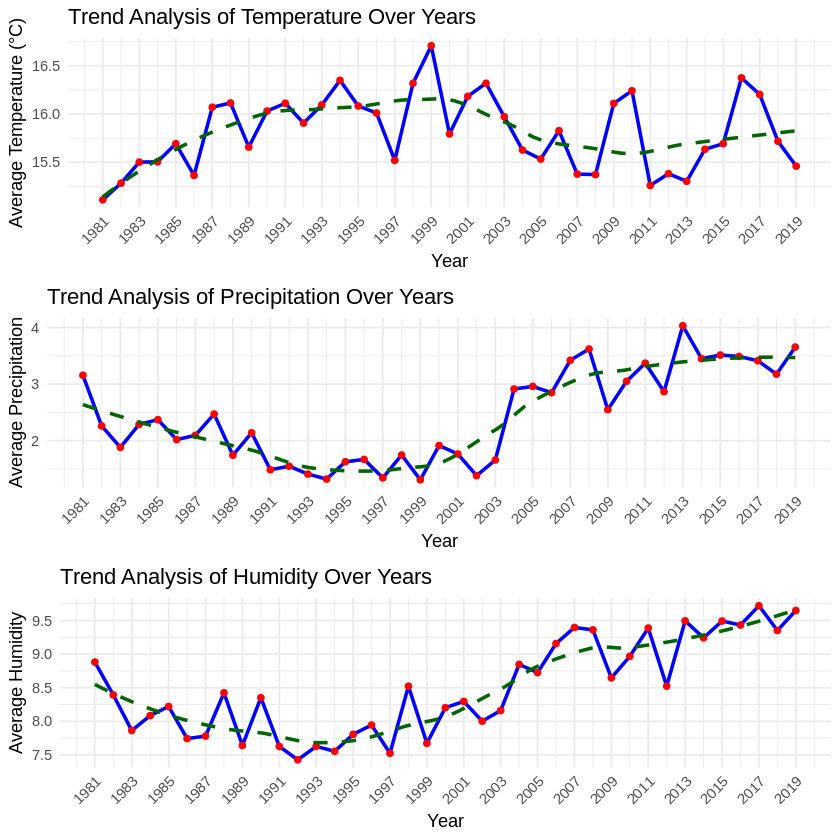

In [ ]:
plot1 <- ggplot(df_yearly, aes(x = as.numeric(Year), y = AvgTemp)) +
  geom_line(color = "blue", size = 1) +  # Line plot for trend
  geom_point(color = "red") +  # Add points for each year's average
  geom_smooth(method = "loess",span= 0.5, color = "darkgreen", linetype = "dashed", size = 1, se= FALSE) +  # Smoothed trend line
  labs(title = "Trend Analysis of Temperature Over Years",
       x = "Year",
       y = "Average Temperature (°C)") +
      scale_x_continuous(breaks = seq(min(df_yearly$Year), max(df_yearly$Year), by = 2)) +  # Set interval
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


plot2 <- ggplot(df_yearly, aes(x = as.numeric(Year), y = AvgPrecip)) +
  geom_line(color = "blue", size = 1) +  # Line plot for trend
  geom_point(color = "red") +  # Add points for each year's average
  geom_smooth(method = "loess",span= 0.5, color = "darkgreen", linetype = "dashed", size = 1, se= FALSE) +  # Smoothed trend line
  labs(title = "Trend Analysis of Precipitation Over Years",
       x = "Year",
       y = "Average Precipitation") +
      scale_x_continuous(breaks = seq(min(df_yearly$Year), max(df_yearly$Year), by = 2)) +  # Set interval
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

plot3 <- ggplot(df_yearly, aes(x = as.numeric(Year), y = AvgHumidity)) +
  geom_line(color = "blue", size = 1) +  # Line plot for trend
  geom_point(color = "red") +  # Add points for each year's average
  geom_smooth(method = "loess",span=0.5, color = "darkgreen", linetype = "dashed", size = 1, se= FALSE) +  # Smoothed trend line
  labs(title = "Trend Analysis of Humidity Over Years",
       x = "Year",
       y = "Average Humidity") +
      scale_x_continuous(breaks = seq(min(df_yearly$Year), max(df_yearly$Year), by = 2)) +  # Set interval
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Arrange plots side by side
grid.arrange(plot1, plot2, plot3, nrow = 3)

##Histogram for Temperature and windspeed distribution


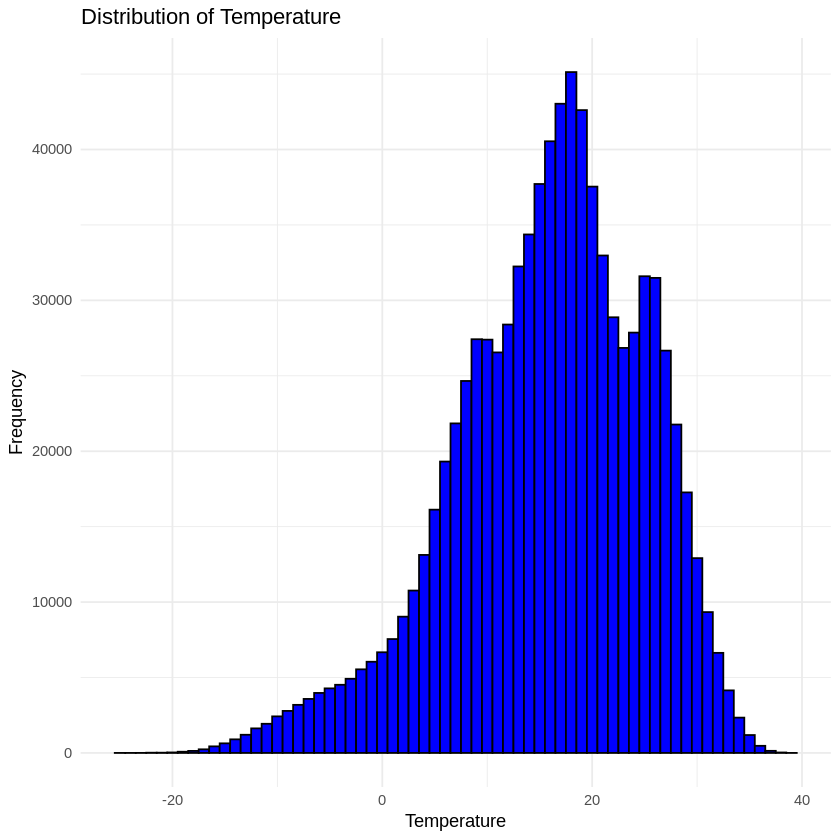

In [ ]:
ggplot(df_climate, aes(x = Temp_2m)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(
  title = "Distribution of Temperature",
  x = "Temperature",
   y = "Frequency") +
  theme_minimal()


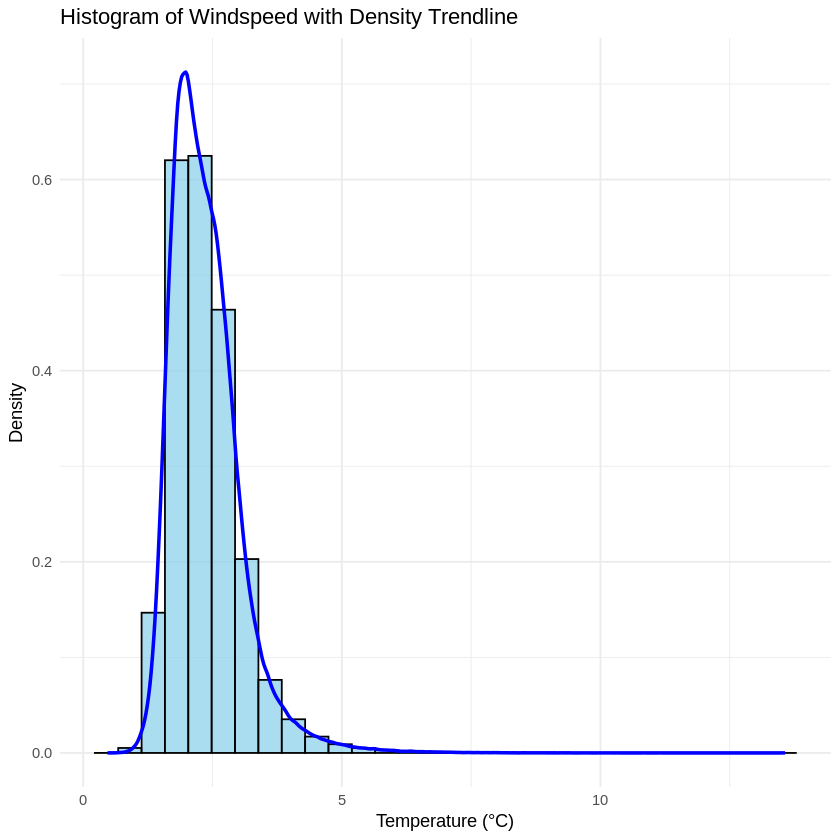

In [ ]:
# Create histogram with density curve
ggplot(df_climate, aes(x = WindSpeed_10m)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "skyblue", color = "black", alpha = 0.7) + # Histogram with density on y-axis
  geom_density(color = "blue", linewidth = 1) + # Overlay density curve
  labs(title = "Histogram of Windspeed with Density Trendline ",
       x = "Temperature (°C)",
       y = "Density") +
  theme_minimal()

In [ ]:
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Correlation Analysis and heatmap


In [ ]:
# Select relevant columns for correlation
cor_data <- df_climate %>%
    select(Temp_2m, Precip, Humidity_2m, Pressure)  # Add or modify attributes as needed
# Calculate correlation matrix
cor_matrix <- cor(cor_data, use = "pairwise.complete.obs")
# Print the correlation matrix
print(cor_matrix)


              Temp_2m    Precip Humidity_2m  Pressure
Temp_2m     1.0000000 0.1933145   0.6414030 0.7723416
Precip      0.1933145 1.0000000   0.4539794 0.0551734
Humidity_2m 0.6414030 0.4539794   1.0000000 0.3194239
Pressure    0.7723416 0.0551734   0.3194239 1.0000000


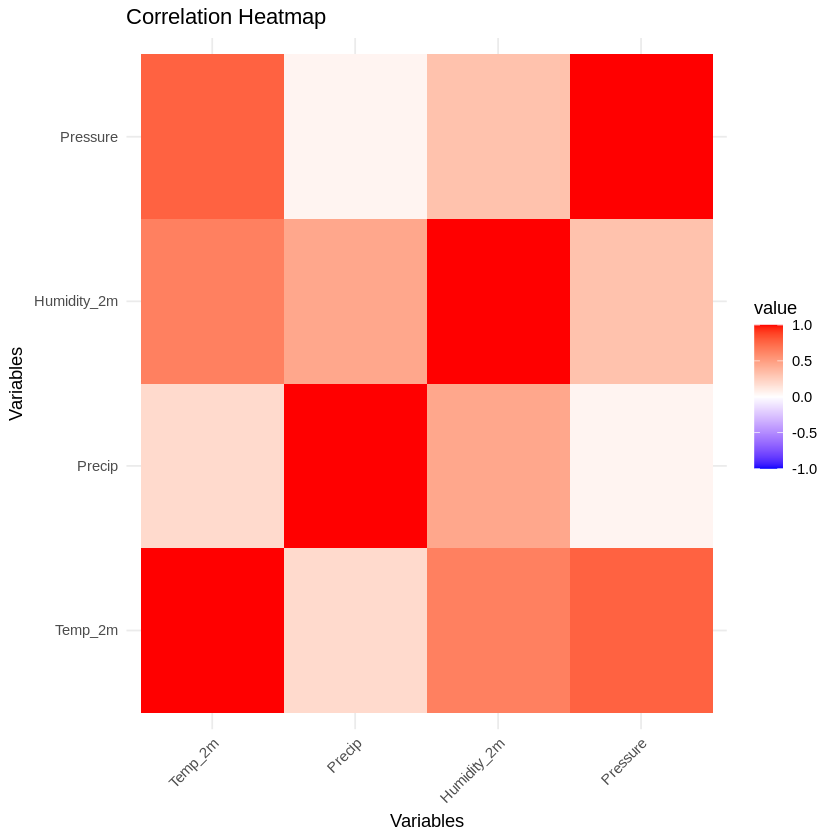

In [ ]:
# Reshape the correlation matrix for ggplot
cor_matrix_melted <- melt(cor_matrix)

# Create heatmap for correlation
ggplot(cor_matrix_melted, aes(Var1, Var2, fill = value)) +
    geom_tile() +
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1), na.value = "grey50") +
    labs(title = "Correlation Heatmap",
         x = "Variables",
         y = "Variables") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


##Seasonal analysis

In [ ]:
# Calculate seasonal averages
seasonal_averages <- df_climate %>%
  group_by(Season) %>%
  summarize(Average_Temperature = mean(Temp_2m, na.rm = TRUE),
            Average_Humidity = mean(Humidity_2m, na.rm = TRUE),
            Average_Precipitation = mean(Precip, na.rm = TRUE),
            Average_Pressure = mean(Pressure, na.rm = TRUE))

print(seasonal_averages)

# A tibble: 4 × 5
  Season Average_Temperature Average_Humidity Average_Precipitation
  <chr>                <dbl>            <dbl>                 <dbl>
1 Fall                 15.6              9.83                 1.87 
2 Spring               17.8              5.83                 1.08 
3 Summer               21.4             14.6                  6.34 
4 Winter                8.34             3.66                 0.398
# ℹ 1 more variable: Average_Pressure <dbl>


In [ ]:
install.packages("gridExtra")
library(gridExtra)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



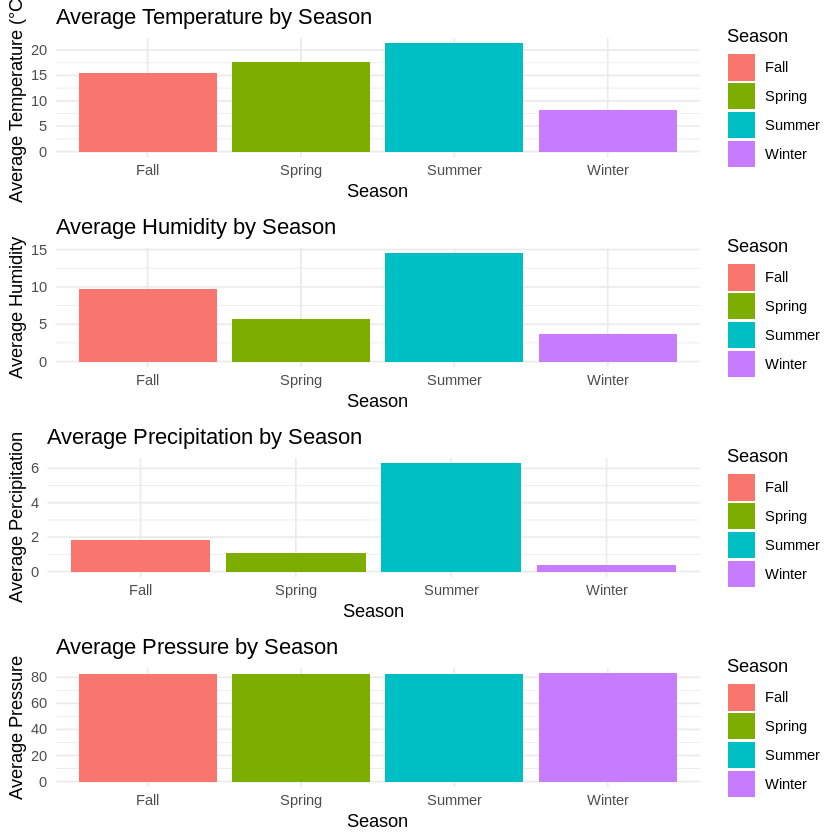

In [ ]:
plot1 <- ggplot(seasonal_averages, aes(x = Season, y = Average_Temperature, fill = Season)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Temperature by Season",
       x = "Season",
       y = "Average Temperature (°C)") +
  theme_minimal()


plot2 <- ggplot(seasonal_averages, aes(x = Season, y = Average_Humidity, fill = Season)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Humidity by Season",
       x = "Season",
       y = "Average Humidity") +
  theme_minimal()


plot3 <- ggplot(seasonal_averages, aes(x = Season, y = Average_Precipitation, fill = Season)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Precipitation by Season",
       x = "Season",
       y = "Average Percipitation") +
  theme_minimal()

plot4 <- ggplot(seasonal_averages, aes(x = Season, y = Average_Pressure, fill = Season)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Pressure by Season",
       x = "Season",
       y = "Average Pressure") +
  theme_minimal()

# Arrange plots side by side
grid.arrange(plot1, plot2, plot3,plot4, nrow = 4)

In [ ]:
seasonal_wind_speed <- df_climate %>%
  group_by(Season) %>%
  summarize(Average_WindSpeed = mean(WindSpeed_10m, na.rm = TRUE))


##Using Lattice package

In [ ]:
install.packages("lattice")
library(lattice)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



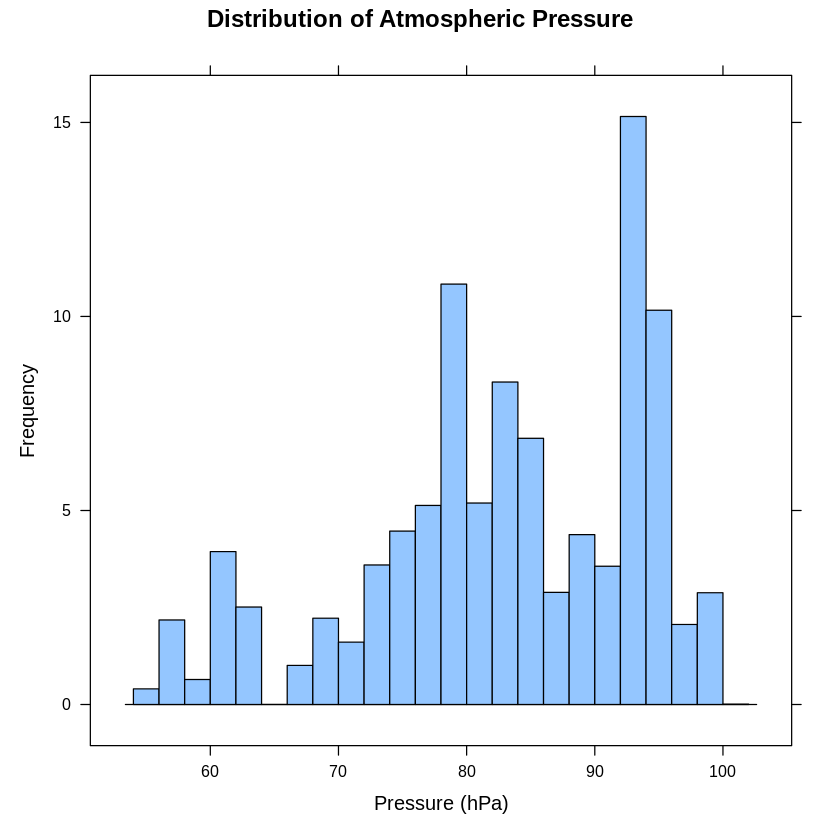

In [ ]:
histogram(~ Pressure, df_climate,
          main = "Distribution of Atmospheric Pressure",
          xlab = "Pressure (hPa)",
          ylab = "Frequency",
          breaks = 30)


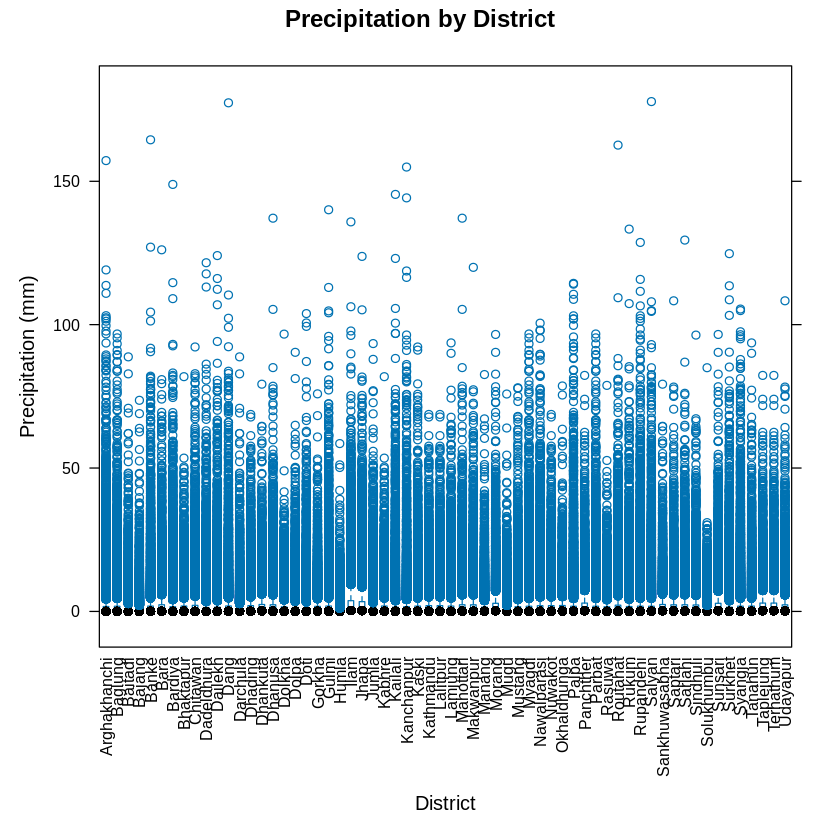

In [ ]:
# Assuming you have a column 'District'
bwplot(Precip ~ District, data = df_climate,
       main = "Precipitation by District",
       xlab = "District",
       ylab = "Precipitation (mm)",
       scales = list(x = list(rot = 90)))  # rotate x-axis labels


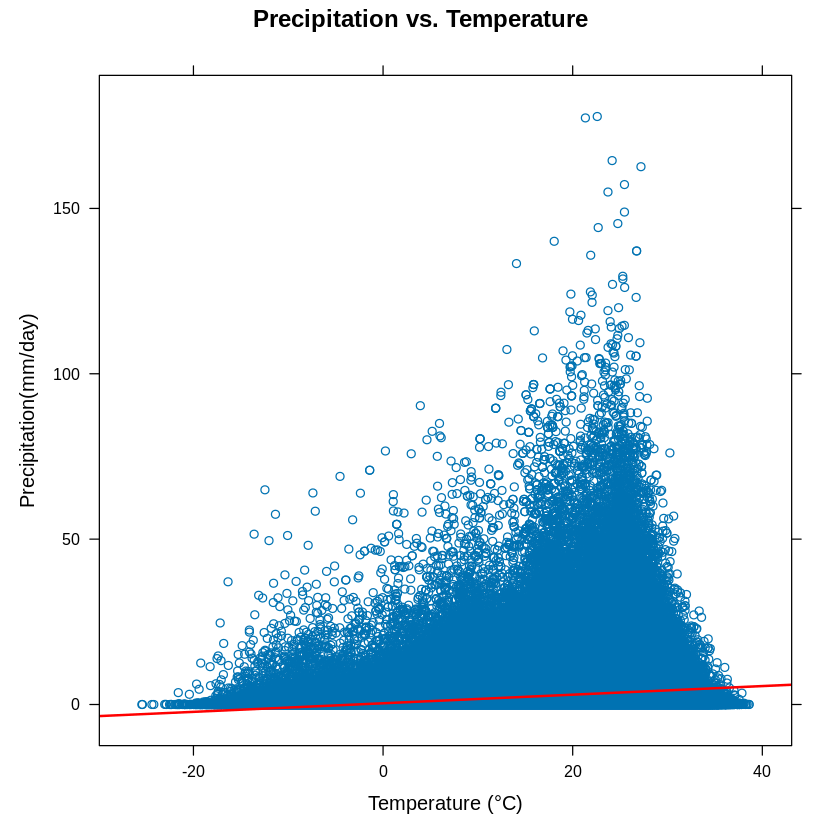

In [ ]:
xyplot(Precip ~ Temp_2m, data = df_climate,

       main = "Precipitation vs. Temperature",
       xlab = "Temperature (°C)",
       ylab = "Precipitation(mm/day)",
       col = "blue",
       panel = function(x, y) {
           panel.xyplot(x, y)
           panel.abline(lm(y ~ x), col = "red", lwd = 2)  # add linear trend line
       })  # point color


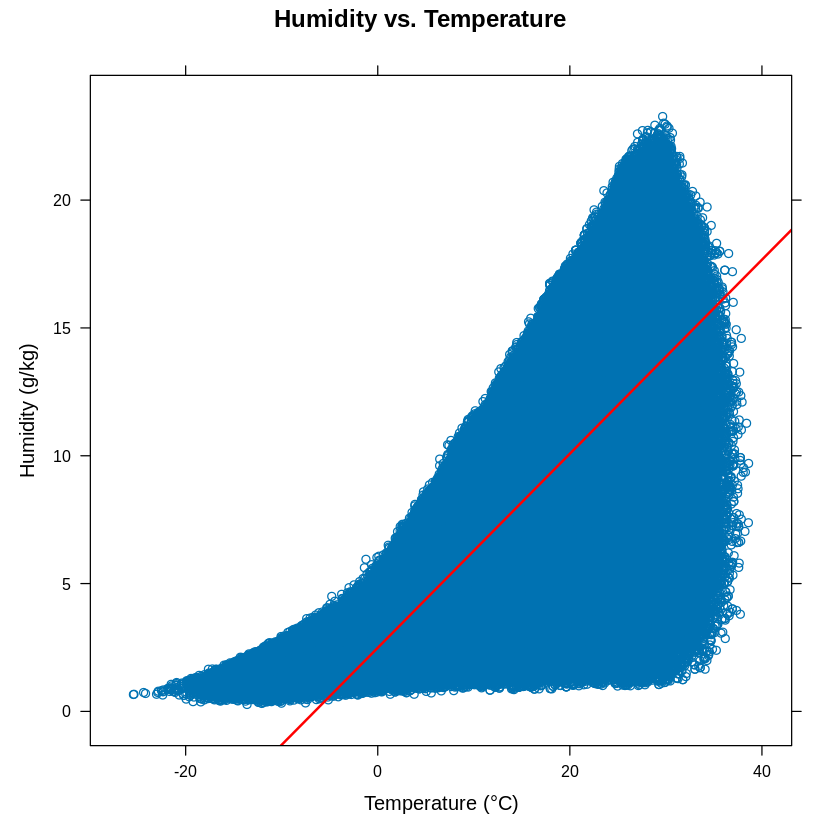

In [ ]:
xyplot(Humidity_2m ~ Temp_2m, data = df_climate,

       main = "Humidity vs. Temperature",
       xlab = "Temperature (°C)",
       ylab = "Humidity (g/kg)",
       col = "blue",
       panel = function(x, y) {
           panel.xyplot(x, y)
           panel.abline(lm(y ~ x), col = "red", lwd = 2)  # add linear trend line
       })  # point color


#Geoplot

In [ ]:
install.packages("ggmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘bitops’




In [ ]:
install.packages("sf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’




In [ ]:
library(sf)

Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.3.1; sf_use_s2() is TRUE



In [ ]:
# Install packages if not already installed
install.packages(c("rnaturalearth", "rnaturalearthdata"))

library(rnaturalearth)
library(rnaturalearthdata)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘terra’




In [ ]:
# Calculate average temperature per district
plot_by_district <- df_climate %>%
  group_by(District) %>%
  summarise(
  avg_temp = mean(Temp_2m, na.rm = TRUE),
  avg_precip= mean(Precip, na.rm= TRUE),
  Latitude = first(Latitude),
  Longitude = first(Longitude)
)


In [ ]:
# Load the new Nepal district shapefile
nepal_districts <- st_read("/content/shapes")



Reading layer `shape_files_of_districts_in_nepal' from data source 
  `/content/shapes' using driver `ESRI Shapefile'
Simple feature collection with 75 features and 10 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 80.04863 ymin: 26.34891 xmax: 88.20129 ymax: 30.4458
Geodetic CRS:  WGS 84


In [ ]:
# Check column names in each dataset
colnames(nepal_districts)



[1] "descriptio" "name"       "objectid"   "dist_code"  "dist_name" 
 [6] "shape_area" "shape_len"  "cartodb_id" "created_at" "updated_at"
[11] "geometry"

In [ ]:
# The district name column is "DIST_NAME" in the new shapefile
nepal_districts <- nepal_districts %>% rename(District = dist_name)

In [ ]:
# View the district names
unique(nepal_districts$District)

[1] "Humla"          "Darchula"       "Bajhang"        "Mugu"          
 [5] "Bajura"         "Baitadi"        "Dolpa"          "Jumla"         
 [9] "Kalikot"        "Doti"           "Dadeldhura"     "Achham"        
[13] "Mustang"        "Dailekh"        "Jajarkot"       "Kanchanpur"    
[17] "Kailali"        "Dolakha"        "Rukum"          "Surkhet"       
[21] "Manang"         "Myagdi"         "Gorkha"         "Bardiya"       
[25] "Salyan"         "Baglung"        "Kaski"          "Lamjung"       
[29] "Parbat"         "Rasuwa"         "Tanahu"         "Solukhumbu"    
[33] "Nuwakot"        "Jhapa"          "Sankhuwasabha"  "Palpa"         
[37] "Taplejung"      "Chitwan"        "Nawalparasi"    "Ramechhap"     
[41] "Kavrepalanchok" "Makwanpur"      "Bhojpur"        "Sindhuli"      
[45] "Khotang"        "Panchthar"      "Dhankuta"       "Udayapur"      
[49] "Ilam"           "Dhanusa"        "Syangja"        "Sindhupalchok" 
[53] "Sunsari"        "Arghakhanchi"   "Rolpa"          "Pyuthan"       
[57] "Dhading"        "Banke"          "Gulmi"          "Dang"          
[61] "Kapilbastu"     "Kathmandu"      "Rupandehi"      "Bhaktapur"     
[65] "Lalitpur"       "Okhaldhunga"    "Parsa"          "Bara"          
[69] "Tehrathum"      "Rautahat"       "Sarlahi"        "Mahottari"     
[73] "Siraha"         "Saptari"        "Morang"

In [ ]:
# View the district names
unique(df_climate$District)

[1] "Arghakhanchi"  "Baglung"       "Baitadi"       "Bajang"       
 [5] "Banke"         "Bara"          "Bardiya"       "Bhaktapur"    
 [9] "Chitawan"      "Dadeldhura"    "Dailekh"       "Dang"         
[13] "Darchula"      "Dhading"       "Dhankuta"      "Dhanusa"      
[17] "Dolkha"        "Dolpa"         "Doti"          "Gorkha"       
[21] "Gulmi"         "Humla"         "Ilam"          "Jhapa"        
[25] "Jumla"         "Kabhre"        "Kailali"       "Kanchanpur"   
[29] "Kaski"         "Kathmandu"     "Lalitpur"      "Lamjung"      
[33] "Mahottari"     "Makwanpur"     "Manang"        "Morang"       
[37] "Mugu"          "Mustang"       "Myagdi"        "Nawalparasi"  
[41] "Nuwakot"       "Okhaldhunga"   "Palpa"         "Panchther"    
[45] "Parbat"        "Rasuwa"        "Routahat"      "Rukum"        
[49] "Rupandehi"     "Salyan"        "Sankhuwasabha" "Saptari"      
[53] "Sarlahi"       "Sindhuli"      "Solukhumbu"    "Sunsari"      
[57] "Surkhet"       "Syangja"       "Tanahun"       "Taplejung"    
[61] "Terhathum"     "Udayapur"

In [ ]:
# Create a mapping for mismatched district names district_ma
district_map <- c(
  district_map <- c(
  "Bajhang" = "Bajang",
  "Chitwan"= "Chitawan",
  "Dolakha"= "Dolkha",
  "Kavrepalanchok" = "Kabhre",
  "Panchthar"=  "Panchther",
  "Rautahat"="Routahat",
  "Tanahu"="Tanahun" ,
  "Tehrathum"="Terhathum"
)
)

# Now apply the mapping to the District column
nepal_districts <- nepal_districts %>%
  mutate(District = recode(District, !!!district_map))

In [ ]:
# Merge temperature data with spatial data
nepal_map_data <- left_join(nepal_districts, plot_by_district , by = "District")


In [ ]:
setdiff(unique(nepal_districts$District), plot_by_district$District)

[1] "Bajhang"        "Bajura"         "Kalikot"        "Achham"        
 [5] "Jajarkot"       "Dolakha"        "Tanahu"         "Chitwan"       
 [9] "Ramechhap"      "Kavrepalanchok" "Bhojpur"        "Khotang"       
[13] "Panchthar"      "Sindhupalchok"  "Rolpa"          "Pyuthan"       
[17] "Kapilbastu"     "Parsa"          "Tehrathum"      "Rautahat"      
[21] "Siraha"

In [ ]:
setdiff(plot_by_district$District, unique(nepal_districts$District))

[1] "Bajang"    "Chitawan"  "Dolkha"    "Kabhre"    "Panchther" "Routahat" 
[7] "Tanahun"   "Terhathum"

In [ ]:
head(plot_by_district)

District     avg_temp  avg_precip Latitude Longitude
1 Arghakhanchi 22.726329 3.028853   27.9     83.2     
2 Baglung      13.834550 2.787923   28.3     83.6     
3 Baitadi       9.950737 1.601415   29.5     80.5     
4 Bajang        5.444005 1.340441   29.6     81.2     
5 Banke        22.249311 2.871878   28.1     81.7     
6 Bara         23.795140 2.717751   27.2     85.0

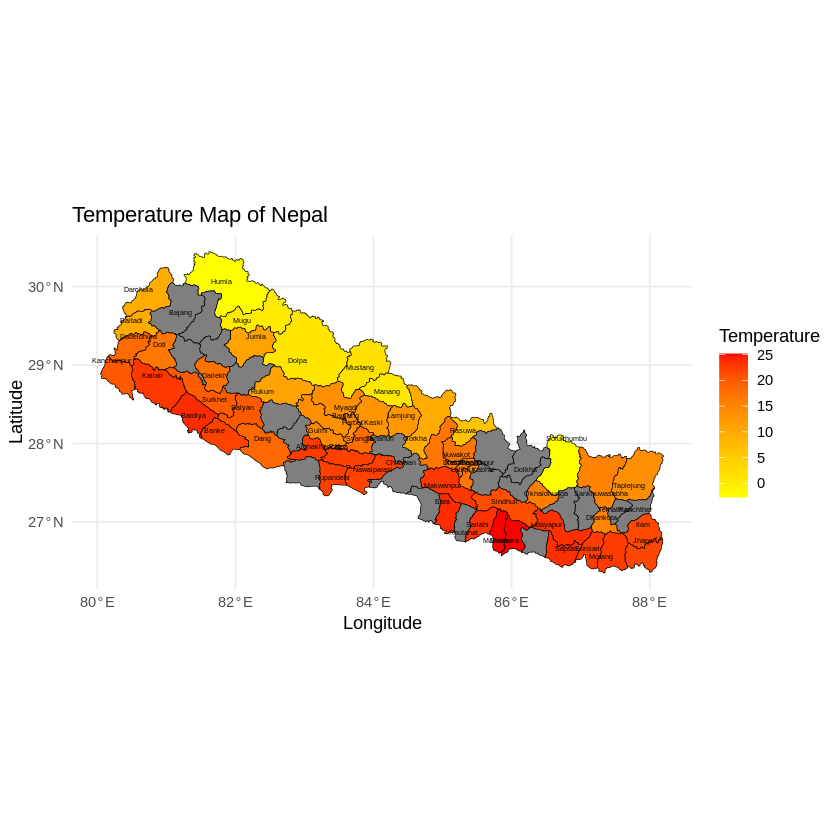

In [ ]:

# Plot
ggplot(data = nepal_map_data) +
  geom_sf(aes(fill = avg_temp), color = "black") +  # Fill districts
  geom_text(data = plot_by_district , aes(x = Longitude, y = Latitude, label = District),
            size = 1.5, vjust = -0.5, color = "black") +
  scale_fill_gradient(low = "yellow", high = "red") +  # Color scale
  labs(title = "Temperature Map of Nepal", fill = "Temperature") +
  theme_minimal()


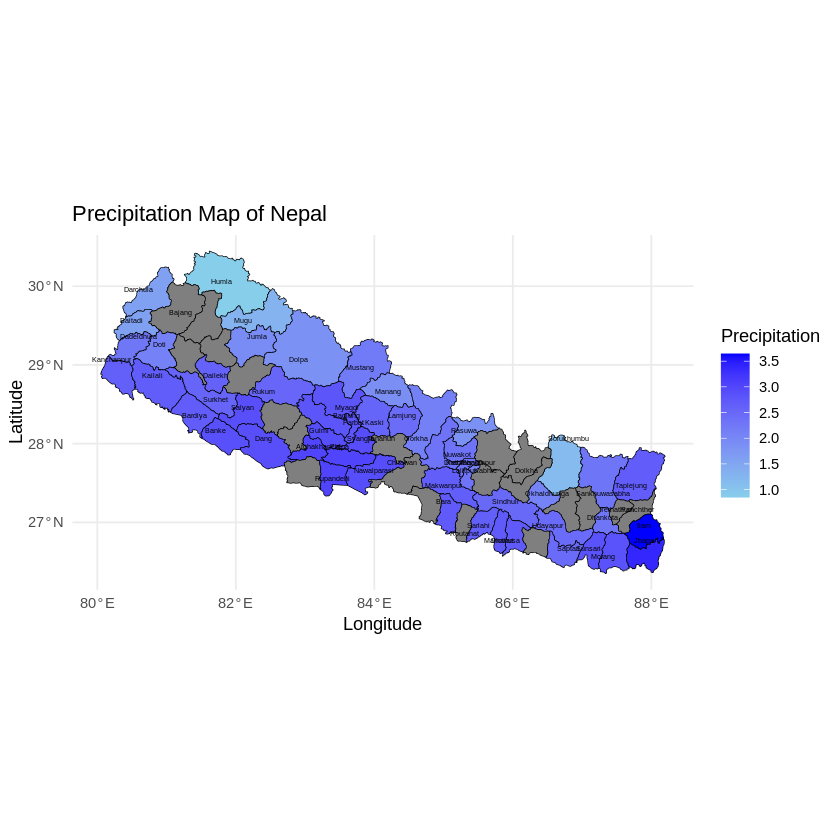

In [ ]:

# Plot
ggplot(data = nepal_map_data) +
  geom_sf(aes(fill = avg_precip), color = "black") +  # Fill districts based on precipitation
  geom_text(data = plot_by_district , aes(x = Longitude, y = Latitude, label = District),
            size = 1.5, vjust = -0.5, color = "black") +
  scale_fill_gradient(low = "skyblue", high = "blue") +  # Color scale for precipitation
  labs(title = "Precipitation Map of Nepal", fill = "Precipitation") +
  theme_minimal()


In [ ]:
seasonal_data <- df_climate %>%
  group_by(Date, Season) %>%
  summarise(
    avg_temp = mean(Temp_2m, na.rm = TRUE),
    avg_precip = mean(Precip, na.rm = TRUE),
    avg_humidity = mean(Humidity_2m, na.rm = TRUE),

  )


`summarise()` has grouped output by 'Date'. You can override using the
`.groups` argument.


#Data slicing and regional analysis


###Slicing by hilly region

In [ ]:
# Create a vector of districts to filter
districts_to_filter <- c("Arghakhanchi","Baglung", "Baitadi", "Bhaktapur", "Chitwan",
                         "Dadeldhura", "Dailekh", "Dhading", "Dhankuta",
                         "Dolpa", "Gorkha", "Gulmi", "Ilam", "Jumla",
                         "Kabhre", "Kaski", "Kathmandu", "Lalitpur",
                         "Lamjung", "Makwanpur", "Myagdi",
                         "Nuwakot", "Okhaldhunga", "Palpa", "Parbat",
                          "Rukum", "Salyan", "Sindhuli",
                         "Surkhet", "Syangja")

# Filter the dataset to only include these districts
filtered_hilly_data <- subset(df_climate, District %in% districts_to_filter)



In [ ]:
glimpse(filtered_hilly_data)

Rows: 413,076
Columns: 25
$ Date               <date> 1981-01-01, 1981-01-02, 1981-01-03, 1981-01-04, 19…
$ District           <chr> "Arghakhanchi", "Arghakhanchi", "Arghakhanchi", "Ar…
$ Latitude           <dbl> 27.9, 27.9, 27.9, 27.9, 27.9, 27.9, 27.9, 27.9, 27.…
$ Longitude          <dbl> 83.2, 83.2, 83.2, 83.2, 83.2, 83.2, 83.2, 83.2, 83.…
$ Precip             <dbl> 0.00, 0.00, 0.03, 0.02, 1.84, 2.41, 2.20, 1.09, 0.0…
$ Pressure           <dbl> 93.51, 93.59, 93.55, 93.49, 93.49, 93.39, 93.44, 93…
$ Humidity_2m        <dbl> 4.81, 4.94, 5.22, 5.36, 5.84, 6.02, 6.12, 5.12, 4.7…
$ RH_2m              <dbl> 45.41, 46.78, 47.91, 50.83, 55.55, 59.18, 65.22, 57…
$ Temp_2m            <dbl> 13.89, 13.84, 14.33, 13.82, 13.76, 13.24, 12.02, 11…
$ WetBulbTemp_2m     <dbl> 2.15, 2.54, 3.32, 3.73, 4.93, 5.23, 5.58, 3.02, 2.0…
$ MaxTemp_2m         <dbl> 20.82, 20.70, 20.71, 20.43, 19.62, 19.02, 16.29, 17…
$ MinTemp_2m         <dbl> 9.94, 9.54, 10.78, 10.02, 9.08, 9.49, 8.56, 7.65, 7…
$ TempRange_2m

In [ ]:
new <- filtered_hilly_data %>%
  filter(year(Date) >=2010 & year(Date)<=2020 )

In [ ]:
dim(new)

[1] 105908     25

In [ ]:
dim(filtered_hilly_data)

[1] 413076     25

In [ ]:
dim(df_climate)

[1] 883128     25

In [ ]:
# Check the first few rows of the filtered data
head(new)

Date       District     Latitude Longitude Precip Pressure Humidity_2m RH_2m
1 2010-01-01 Arghakhanchi 27.9     83.2      0      93.70    3.90        42.33
2 2010-01-02 Arghakhanchi 27.9     83.2      0      93.91    3.85        38.36
3 2010-01-03 Arghakhanchi 27.9     83.2      0      93.76    4.19        40.32
4 2010-01-04 Arghakhanchi 27.9     83.2      0      93.39    5.74        54.15
5 2010-01-05 Arghakhanchi 27.9     83.2      0      93.40    5.65        57.94
6 2010-01-06 Arghakhanchi 27.9     83.2      0      93.62    5.31        53.97
  Temp_2m WetBulbTemp_2m ⋯ MaxWindSpeed_10m MinWindSpeed_10m WindSpeedRange_10m
1 11.80   -0.76          ⋯ 3.02             0.88             2.14              
2 13.12   -0.87          ⋯ 3.44             0.38             3.05              
3 13.64    0.17          ⋯ 4.61             0.48             4.13              
4 13.88    4.59          ⋯ 5.77             1.06             4.71              
5 12.59    4.29          ⋯ 3.89             0.38             3.51              
6 12.76    3.52          ⋯ 2.92             0.72             2.20              
  WindSpeed_50m MaxWindSpeed_50m MinWindSpeed_50m WindSpeedRange_50m
1 2.26          3.11             1.08             2.03              
2 2.13          3.89             0.47             3.42              
3 2.64          5.10             0.64             4.46              
4 3.74          6.57             1.73             4.84              
5 1.96          3.74             0.45             3.30              
6 1.75          2.60             1.09             1.51              
  Month_Number Month_Label Season
1 1            Jan         Winter
2 1            Jan         Winter
3 1            Jan         Winter
4 1            Jan         Winter
5 1            Jan         Winter
6 1            Jan         Winter

In [ ]:
dim(filtered_hilly_data)

[1] 413076     25

In [ ]:
# Save as CSV
write.csv(filtered_hilly_data, file = "dataframe_hilly.csv", row.names = FALSE)

In [ ]:
# Get the unique district names from the 'District' column
unique_districts <- unique(df_climate$District)

# Print the unique district names
print(unique_districts)


 [1] "Arghakhanchi"  "Baglung"       "Baitadi"       "Bajang"       
 [5] "Banke"         "Bara"          "Bardiya"       "Bhaktapur"    
 [9] "Chitawan"      "Dadeldhura"    "Dailekh"       "Dang"         
[13] "Darchula"      "Dhading"       "Dhankuta"      "Dhanusa"      
[17] "Dolkha"        "Dolpa"         "Doti"          "Gorkha"       
[21] "Gulmi"         "Humla"         "Ilam"          "Jhapa"        
[25] "Jumla"         "Kabhre"        "Kailali"       "Kanchanpur"   
[29] "Kaski"         "Kathmandu"     "Lalitpur"      "Lamjung"      
[33] "Mahottari"     "Makwanpur"     "Manang"        "Morang"       
[37] "Mugu"          "Mustang"       "Myagdi"        "Nawalparasi"  
[41] "Nuwakot"       "Okhaldhunga"   "Palpa"         "Panchther"    
[45] "Parbat"        "Rasuwa"        "Routahat"      "Rukum"        
[49] "Rupandehi"     "Salyan"        "Sankhuwasabha" "Saptari"      
[53] "Sarlahi"       "Sindhuli"      "Solukhumbu"    "Sunsari"      
[57] "Surkhet"       "Syangja"    

In [ ]:
unique_districts1 <- unique(filtered_hilly_data$District)

# Print the unique district names
print(unique_districts1)

 [1] "Arghakhanchi" "Baglung"      "Baitadi"      "Bhaktapur"    "Dadeldhura"  
 [6] "Dailekh"      "Dhading"      "Dhankuta"     "Dolpa"        "Gorkha"      
[11] "Gulmi"        "Ilam"         "Jumla"        "Kabhre"       "Kaski"       
[16] "Kathmandu"    "Lalitpur"     "Lamjung"      "Makwanpur"    "Myagdi"      
[21] "Nuwakot"      "Okhaldhunga"  "Palpa"        "Parbat"       "Rukum"       
[26] "Salyan"       "Sindhuli"     "Surkhet"      "Syangja"     


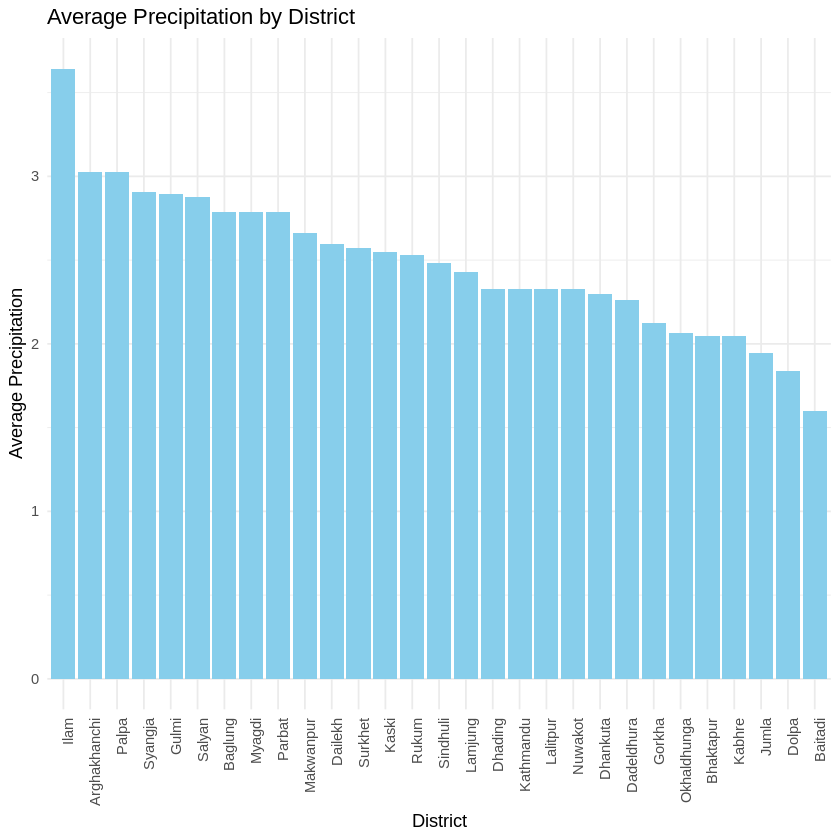

In [ ]:
avg_precip_by_district <- filtered_hilly_data %>%
  group_by(District) %>%
  summarise(avg_precip = mean(Precip, na.rm = TRUE))

ggplot(avg_precip_by_district, aes(x = reorder(District, -avg_precip), y = avg_precip)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme_minimal() +
  labs(title = "Average Precipitation by District", x = "District", y = "Average Precipitation") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


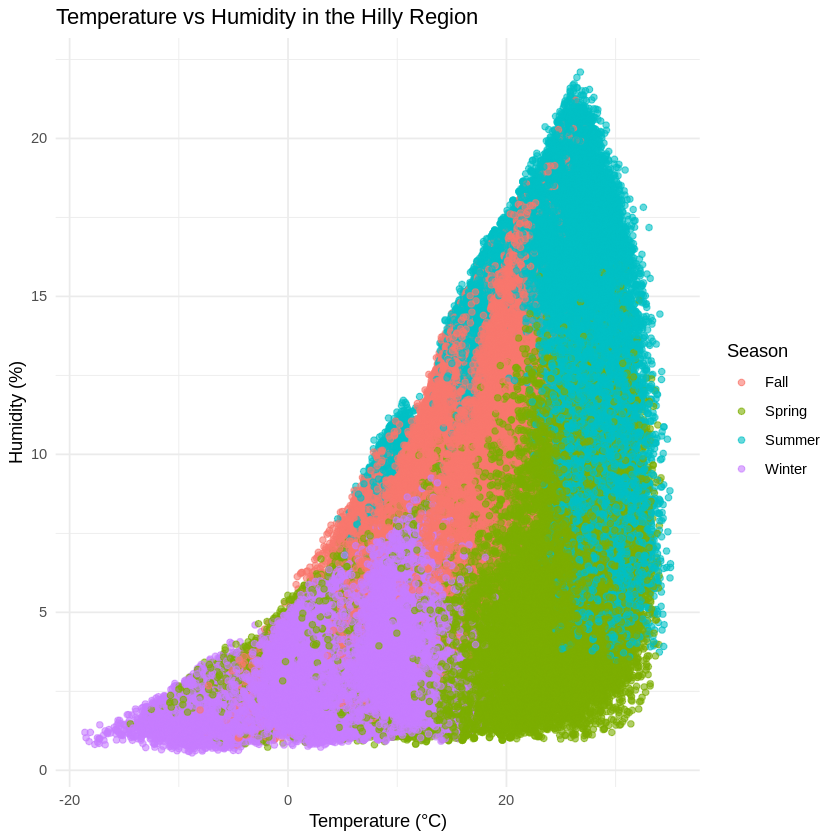

In [ ]:
ggplot(filtered_hilly_data, aes(x = Temp_2m, y = Humidity_2m)) +
  geom_point(aes(color = Season), alpha = 0.6) +
  theme_minimal() +
  labs(title = "Temperature vs Humidity in the Hilly Region",
       x = "Temperature (°C)",
       y = "Humidity (%)")


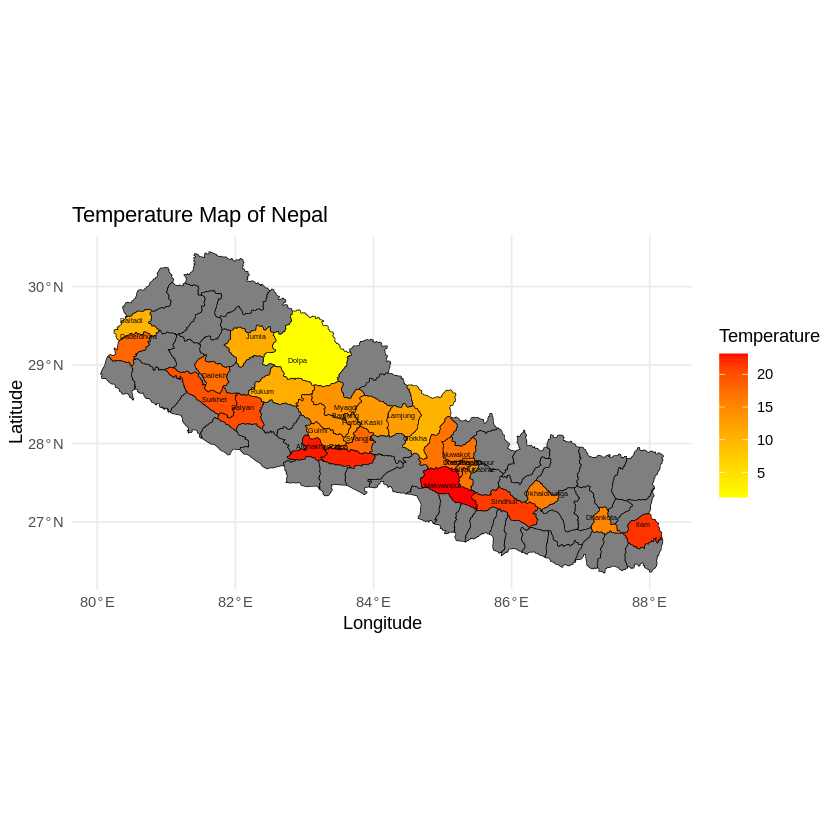

In [ ]:
# Calculate average temperature per district
plot_hilly <- filtered_hilly_data %>%
  group_by(District) %>%
  summarise(
  avg_temp = mean(Temp_2m, na.rm = TRUE),
  avg_precip= mean(Precip, na.rm= TRUE),
  Latitude = first(Latitude),
  Longitude = first(Longitude)
)
# Merge temperature data with spatial data
nepal_temp_hilly <- left_join(nepal_districts, plot_hilly , by = "District")

# Plot
ggplot(data = nepal_temp_hilly) +
  geom_sf(aes(fill = avg_temp), color = "black") +  # Fill districts
  geom_text(data = plot_hilly , aes(x = Longitude, y = Latitude, label = District),
            size = 1.5, vjust = -0.5, color = "black") +
  scale_fill_gradient(low = "yellow", high = "red") +  # Color scale
  labs(title = "Temperature Map of Nepal", fill = "Temperature") +
  theme_minimal()




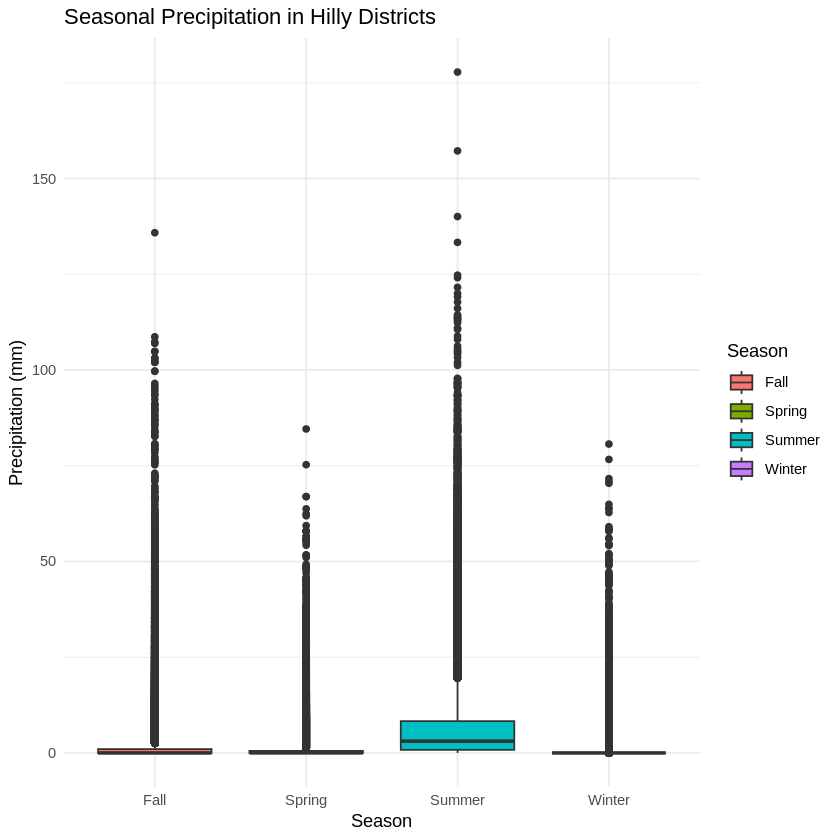

In [ ]:
ggplot(filtered_hilly_data, aes(x = Season, y = Precip, fill = Season)) +
  geom_boxplot() +
  labs(title = "Seasonal Precipitation in Hilly Districts",
       x = "Season", y = "Precipitation (mm)") +
  theme_minimal()

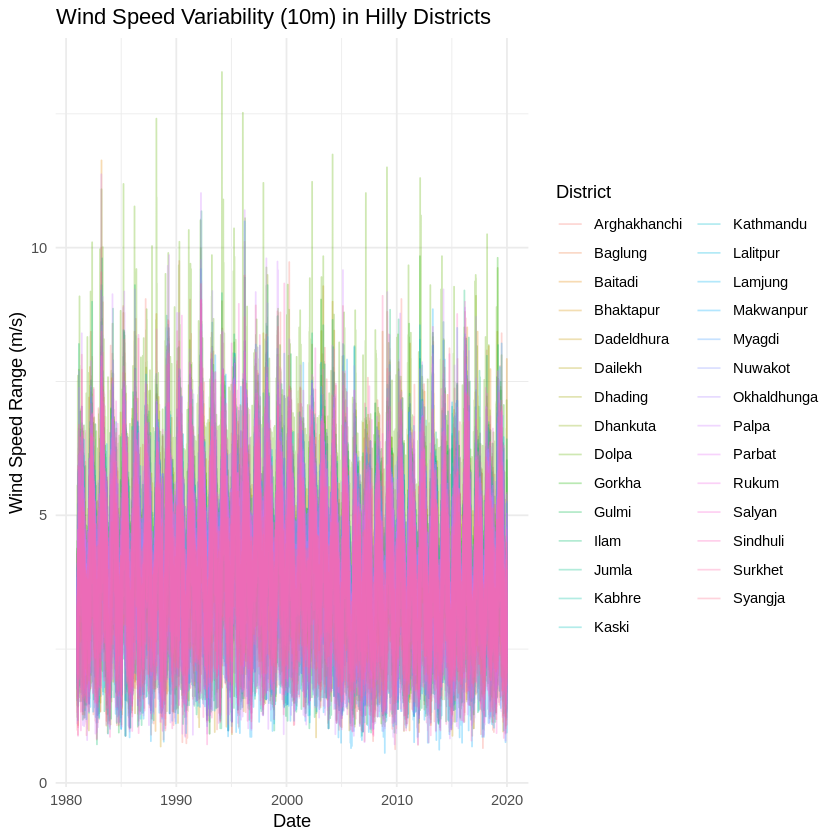

In [ ]:
ggplot(filtered_hilly_data, aes(x = Date, y = WindSpeedRange_10m, color = District)) +
  geom_line(alpha = 0.3) +
  labs(title = "Wind Speed Variability (10m) in Hilly Districts",
       x = "Date", y = "Wind Speed Range (m/s)") +
  theme_minimal()


Warning message in layer_sf(geom = GeomSf, data = data, mapping = mapping, stat = stat, :
“Ignoring unknown aesthetics: data”
Warning message:
“Removed 47 rows containing missing values or values outside the scale range
(`geom_point()`).”


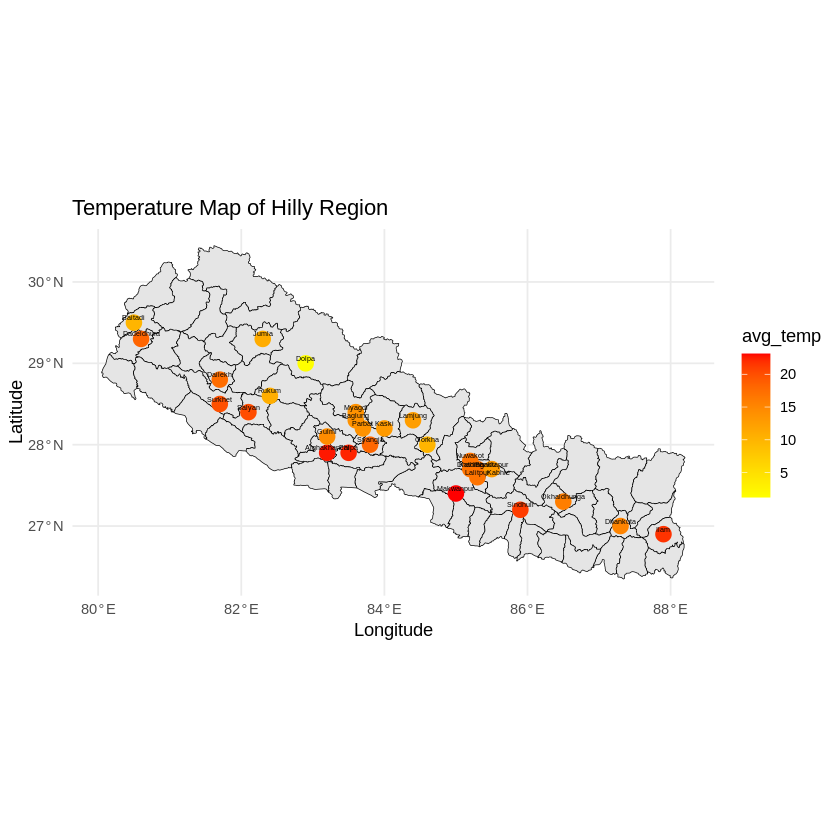

In [ ]:
# Plot
ggplot(data = nepal_temp_hilly) +
  geom_sf(aes(data = avg_temp), color = "black") +
  geom_point(aes(x = Longitude, y = Latitude, color = avg_temp), size = 4) +  # Points for avg_temp
  geom_text(data = plot_hilly , aes(x = Longitude, y = Latitude, label = District),
            size = 1.5, vjust = -0.5, color = "black") +
  scale_color_gradient(low = "yellow", high = "red") +  # Color scale
  labs(title = "Temperature Map of Hilly Region", fill = "Temperature") +
  theme_minimal()

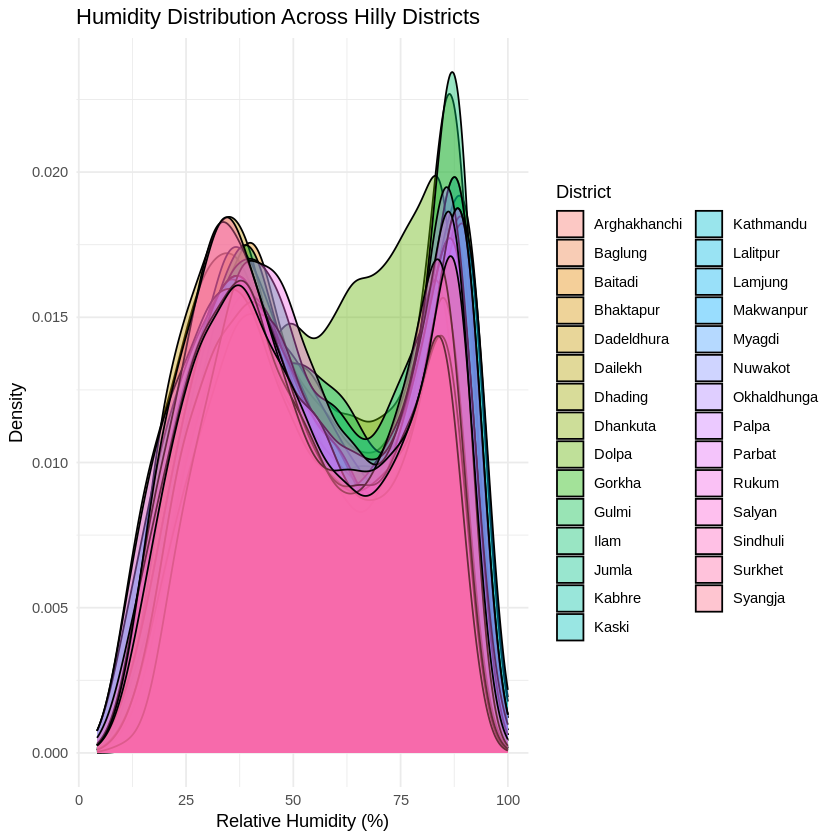

In [ ]:
ggplot(filtered_hilly_data, aes(x = RH_2m, fill = District)) +
  geom_density(alpha = 0.4) +
  labs(title = "Humidity Distribution Across Hilly Districts",
       x = "Relative Humidity (%)", y = "Density") +
  theme_minimal()

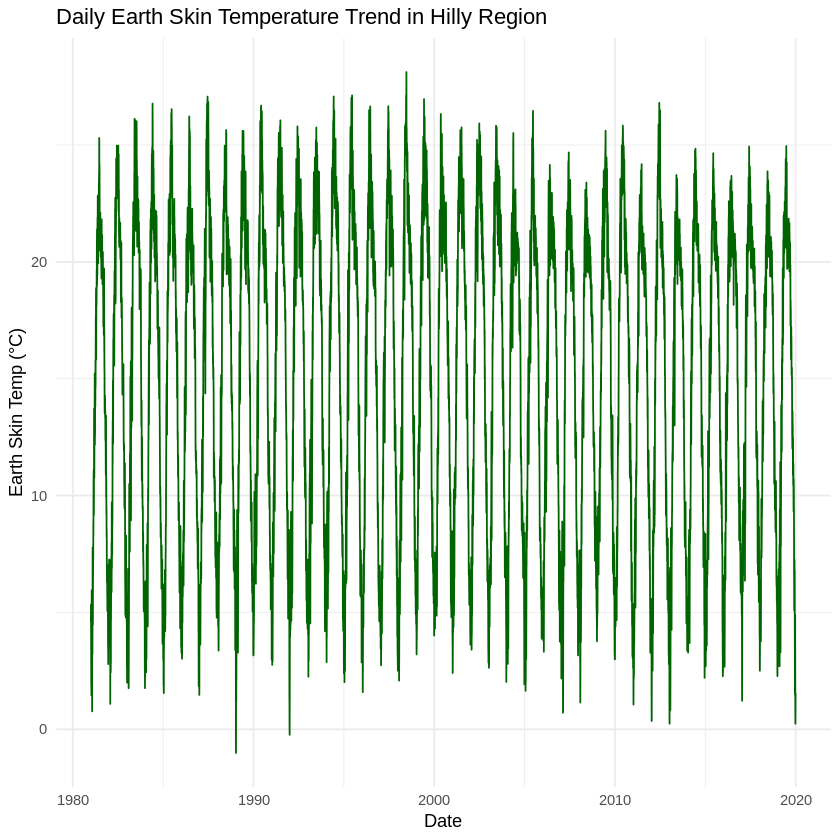

In [ ]:
daily_avg_skin_temp <- filtered_hilly_data %>%
  group_by(Date) %>%
  summarize(AvgSkinTemp = mean(EarthSkinTemp, na.rm = TRUE))

ggplot(daily_avg_skin_temp, aes(x = Date, y = AvgSkinTemp)) +
  geom_line(color = "darkgreen") +
  labs(title = "Daily Earth Skin Temperature Trend in Hilly Region",
       x = "Date", y = "Earth Skin Temp (°C)") +
  theme_minimal()


In [ ]:
install.packages("outliers")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(outliers)

Outliers using IQR

In [ ]:
# Step 1: Calculate IQR and Bounds
Q1 <- quantile(filtered_hilly_data$Precip, 0.25)  # First Quartile (25%)
Q3 <- quantile(filtered_hilly_data$Precip, 0.75)  # Third Quartile (75%)
IQR <- Q3 - Q1  # Interquartile Range

lower_bound <- Q1 - 1.5 * IQR  # Lower bound
upper_bound <- Q3 + 1.5 * IQR  # Upper bound

# Step 2: Identify Outliers
outliers <- filtered_hilly_data[filtered_hilly_data$Precip < lower_bound | filtered_hilly_data$Precip > upper_bound, ]
non_outliers <- filtered_hilly_data[filtered_hilly_data$Precip >= lower_bound & filtered_hilly_data$Precip <= upper_bound, ]

# Step 3: Summary Statistics
cat("Original Dataset Summary:\n")
summary(filtered_hilly_data$Precip)
cat("\nDataset Without Outliers:\n")
summary(non_outliers$Precip)
cat("\nOutliers Only:\n")
summary(outliers$Precip)

Original Dataset Summary:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.040   2.486   1.870 177.790 


Dataset Without Outliers:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.534   0.500   4.670 


Outliers Only:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.68    6.69    9.82   13.42   15.90  177.79 

Warning message in geom_boxplot(outliers.colour = "red"):
“Ignoring unknown parameters: `outliers.colour`”


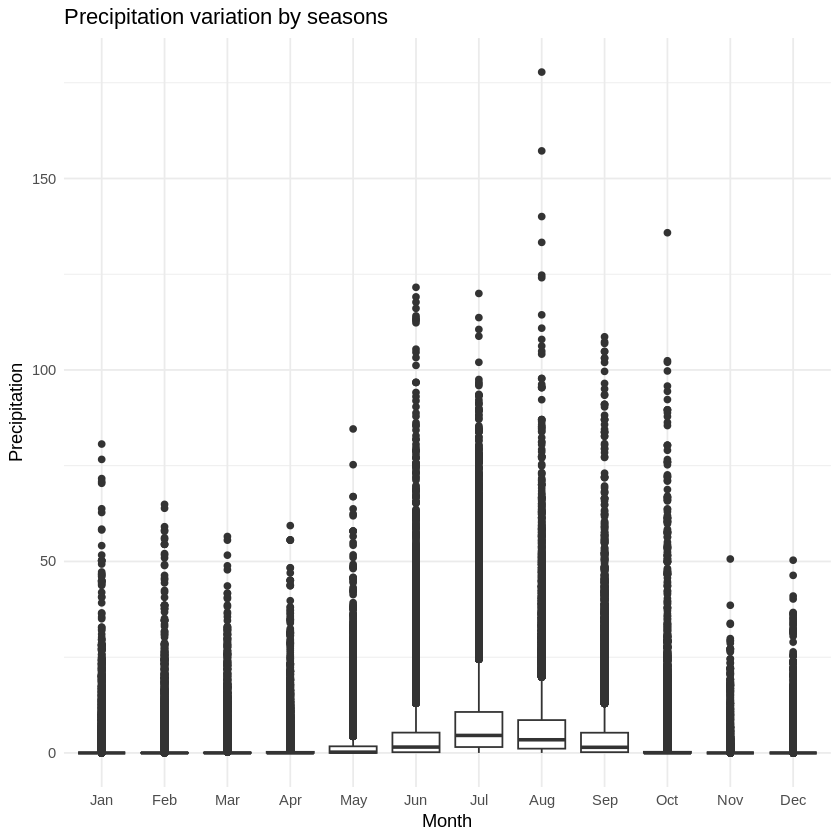

In [ ]:
# Boxplot with Outliers
ggplot(filtered_hilly_data, aes(x = Month_Label, y = Precip)) +
  geom_boxplot(outliers.colour = "red") +
  theme_minimal() +
  labs(title = "Precipitation variation by seasons", x = "Month", y = "Precipitation")



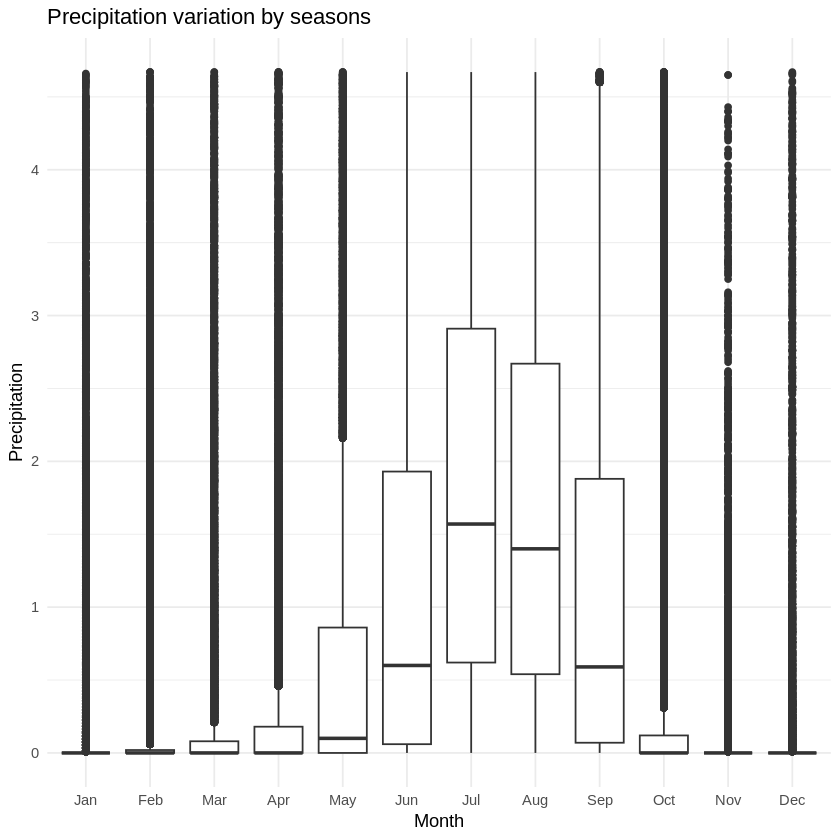

In [ ]:
# Boxplot Without Outliers
ggplot(non_outliers, aes(x = Month_Label, y = Precip)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Precipitation variation by seasons", x = "Month", y = "Precipitation")

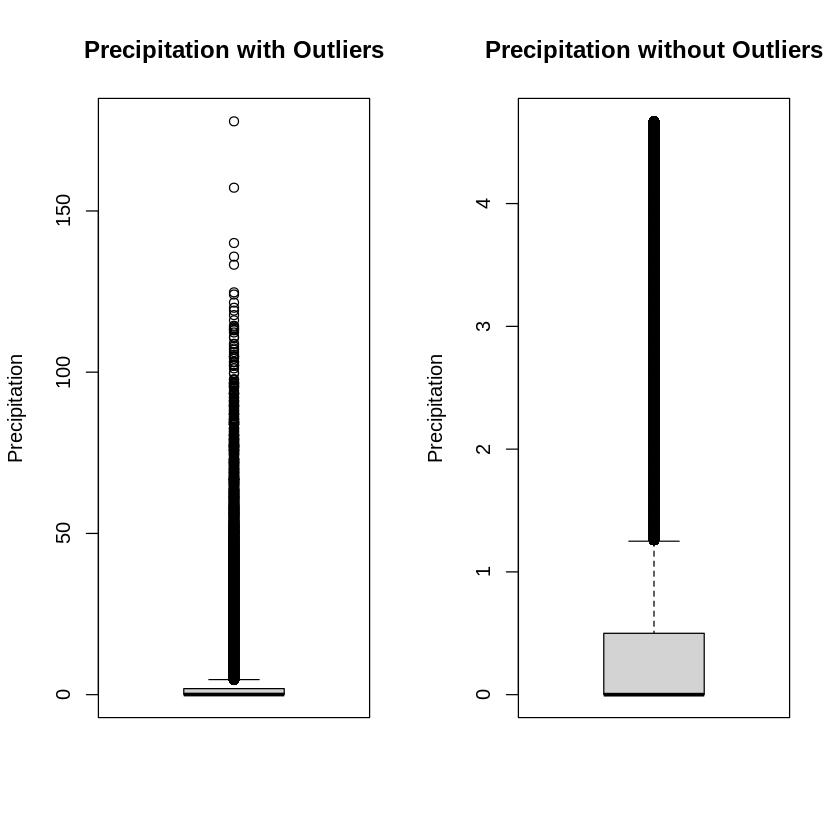

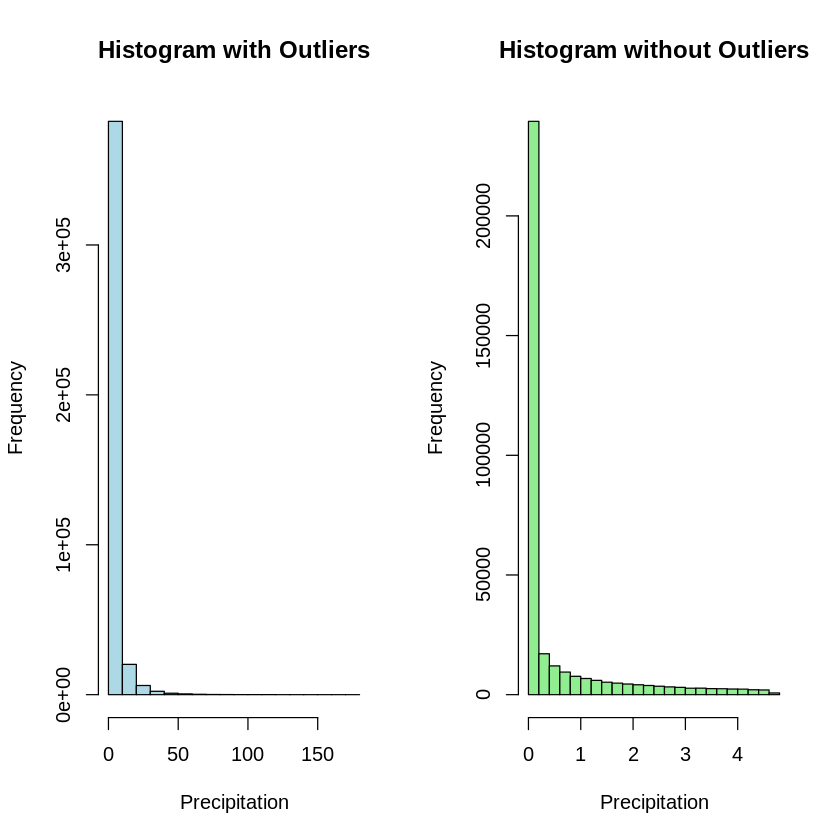

In [ ]:
# Visualizing with Boxplot
par(mfrow=c(1, 2))  # Set up side-by-side plotting

# Boxplot with outliers
boxplot(filtered_hilly_data$Precip, main="Precipitation with Outliers", ylab="Precipitation")

# Boxplot without outliers
boxplot(non_outliers$Precip, main="Precipitation without Outliers", ylab="Precipitation")

# Visualizing with Histogram
par(mfrow=c(1, 2))  # Set up side-by-side plotting

# Histogram with outliers
hist(filtered_hilly_data$Precip, main="Histogram with Outliers", xlab="Precipitation", col="lightblue", breaks=20)

# Histogram without outliers
hist(non_outliers$Precip, main="Histogram without Outliers", xlab="Precipitation", col="lightgreen", breaks=20)


In [ ]:
# Standard Deviation and Range
cat("\nStandard Deviation with Outliers: ", sd(filtered_hilly_data$Precip), "\n")
cat("Standard Deviation without Outliers: ", sd(non_outliers$Precip), "\n")

cat("\nRange with Outliers: ", range(filtered_hilly_data$Precip), "\n")
cat("Range without Outliers: ", range(non_outliers$Precip), "\n")



Standard Deviation with Outliers:  6.32799 
Standard Deviation without Outliers:  1.034829 

Range with Outliers:  0 177.79 
Range without Outliers:  0 4.67 


In [ ]:
# Count of extreme events (outliers) in the dataset
extreme_events <- filtered_hilly_data[filtered_hilly_data$Precip < lower_bound | filtered_hilly_data$Precip > upper_bound, ]
extreme_event_count <- nrow(extreme_events)

cat("\nCount of Extreme Events (Outliers): ", extreme_event_count, "\n")
print(upper_bound)


Count of Extreme Events (Outliers):  62586 
  75% 
4.675 


In [ ]:
dim(extreme_events)

[1] 62586    25

In [ ]:
# Define extreme event threshold (e.g., 90th percentile)
extreme_threshold <- quantile(filtered_hilly_data$Precip, 0.90)
extreme_events_custom <- filtered_hilly_data[filtered_hilly_data$Precip > extreme_threshold, ]
extreme_event_count_custom <- nrow(extreme_events_custom)

cat("\nCount of Extreme Events (Custom Threshold): ", extreme_event_count_custom, "\n")
print(extreme_threshold)


Count of Extreme Events (Custom Threshold):  41248 
 90% 
7.64 


In [ ]:
# Create a binary variable indicating extreme events
filtered_hilly_data$ExtremeEvent <- ifelse(filtered_hilly_data$Precip > extreme_threshold, 1, 0)

# Check the class distribution
table(filtered_hilly_data$ExtremeEvent)



     0      1 
371828  41248 

In [ ]:

# Split the data into training and testing sets
set.seed(123)  # For reproducibility
train_index <- createDataPartition(filtered_hilly_data$ExtremeEvent, p=0.8, list=FALSE)
train_data <- filtered_hilly_data[train_index, ]
test_data <- filtered_hilly_data[-train_index, ]


In [ ]:
# Logistic Regression Model
model <- glm(ExtremeEvent ~ Precip + Temperature + OtherPredictors, data=train_data, family="binomial")

# Summary of the model
summary(model)

# Predict on the test set
predictions <- predict(model, newdata=test_data, type="response")

# Convert probabilities to binary outcomes
predicted_classes <- ifelse(predictions > 0.5, 1, 0)

# Evaluate Model Performance
conf_matrix <- confusionMatrix(factor(predicted_classes), factor(test_data$ExtremeEvent))
cat("\nConfusion Matrix:\n")
print(conf_matrix)


ERROR: Error in eval(mf, parent.frame()): object 'train_data' not found


In [ ]:
# Decision Tree Model
library(rpart)
tree_model <- rpart(ExtremeEvent ~ Precip + Temperature + OtherPredictors, data=train_data)
summary(tree_model)

# Predict on the test set
tree_predictions <- predict(tree_model, newdata=test_data, type="class")

# Evaluate Model Performance
tree_conf_matrix <- confusionMatrix(factor(tree_predictions), factor(test_data$ExtremeEvent))
cat("\nDecision Tree Confusion Matrix:\n")
print(tree_conf_matrix)


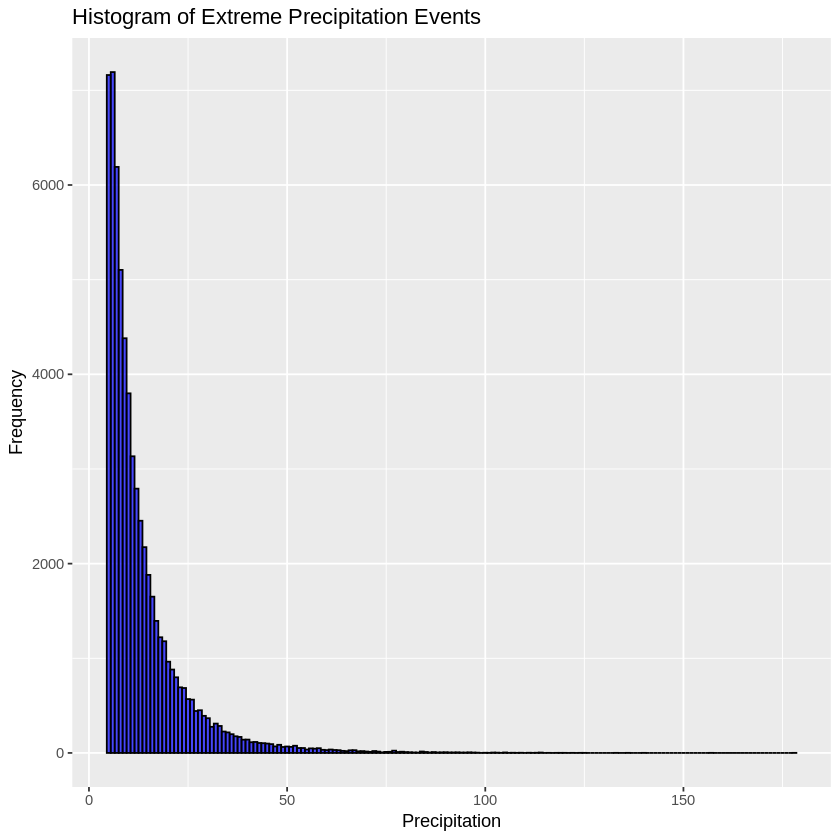

In [ ]:
# Histogram of Extreme Events (Outliers)

ggplot(extreme_events, aes(x = Precip)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Extreme Precipitation Events", x = "Precipitation", y = "Frequency")


In [ ]:
# Summary statistics for extreme events
summary(extreme_events$Precip)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.68    6.69    9.82   13.42   15.90  177.79 

In [ ]:
#binary classification of extreme events
# Create a binary variable for extreme events
filtered_hilly_data$ExtremeEvent <- ifelse(filtered_hilly_data$Precip > extreme_threshold, 1, 0)


###Slicing by month

In [ ]:
time_based_filter <- df_climate %>%
   dplyr::filter(Month_Label %in% c("May","Jun","Jul","Aug"))
dim(time_based_filter)

[1] 297414     25

In [ ]:
glimpse(time_based_filter)

Rows: 297,414
Columns: 25
$ Date               <date> 1981-05-01, 1981-05-02, 1981-05-03, 1981-05-04, 19…
$ District           <chr> "Arghakhanchi", "Arghakhanchi", "Arghakhanchi", "Ar…
$ Latitude           <dbl> 27.9, 27.9, 27.9, 27.9, 27.9, 27.9, 27.9, 27.9, 27.…
$ Longitude          <dbl> 83.2, 83.2, 83.2, 83.2, 83.2, 83.2, 83.2, 83.2, 83.…
$ Precip             <dbl> 0.02, 0.01, 0.03, 0.13, 2.39, 4.63, 0.59, 0.29, 0.4…
$ Pressure           <dbl> 93.12, 93.01, 93.20, 93.24, 93.15, 93.16, 93.14, 93…
$ Humidity_2m        <dbl> 6.52, 7.35, 8.99, 10.73, 10.83, 12.16, 11.46, 10.89…
$ RH_2m              <dbl> 25.23, 26.11, 34.49, 41.19, 39.27, 49.82, 49.32, 48…
$ Temp_2m            <dbl> 28.32, 29.77, 28.46, 28.44, 29.42, 27.30, 26.46, 25…
$ WetBulbTemp_2m     <dbl> 6.41, 8.12, 11.25, 13.93, 14.06, 15.81, 14.87, 14.0…
$ MaxTemp_2m         <dbl> 36.85, 37.35, 35.29, 34.42, 35.69, 31.97, 30.39, 30…
$ MinTemp_2m         <dbl> 20.47, 22.10, 22.09, 22.98, 23.23, 24.01, 22.76, 20…
$ TempRange_2m

In [ ]:
# Save as CSV
write.csv(time_based_filter, file = "dataframe_time.csv", row.names = FALSE)

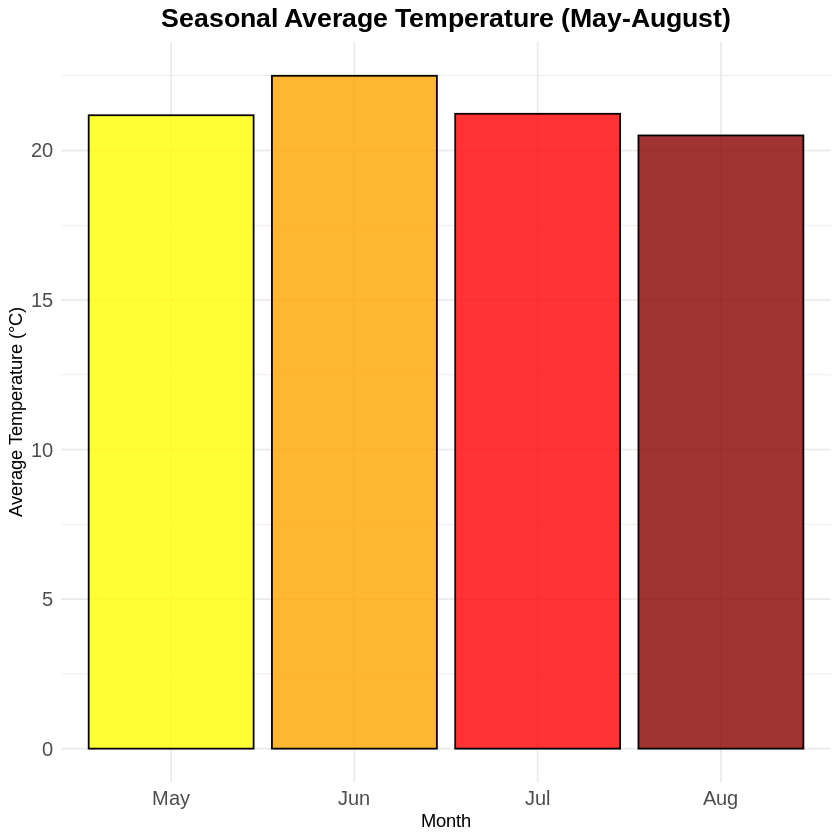

In [ ]:

# Summarize the average temperature for each month
avg_temp_data <- time_based_filter %>%
  group_by(Month_Label) %>%
  summarize(Avg_Temp = mean(Temp_2m, na.rm = TRUE))  # Replace 'Temperature' with your column name

# Create a bar chart for seasonal average temperature
ggplot(data = avg_temp_data, aes(x = Month_Label, y = Avg_Temp, fill = Month_Label)) +
  geom_bar(stat = "identity", color = "black", alpha = 0.8) +
  scale_fill_manual(values = c("May" = "yellow", "Jun" = "orange",
                               "Jul" = "red", "Aug" = "darkred")) +  # Custom colors
  labs(
    title = "Seasonal Average Temperature (May-August)",
    x = "Month",
    y = "Average Temperature (°C)",
    fill = "Month"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.position = "none"
  )


In [ ]:
precip_temp_data <- time_based_filter %>%
  group_by(Month_Label) %>%
  summarize(
    Avg_Precip = mean(Precip, na.rm = TRUE),
    Avg_humid = mean(Humidity_2m, na.rm = TRUE)
  )

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


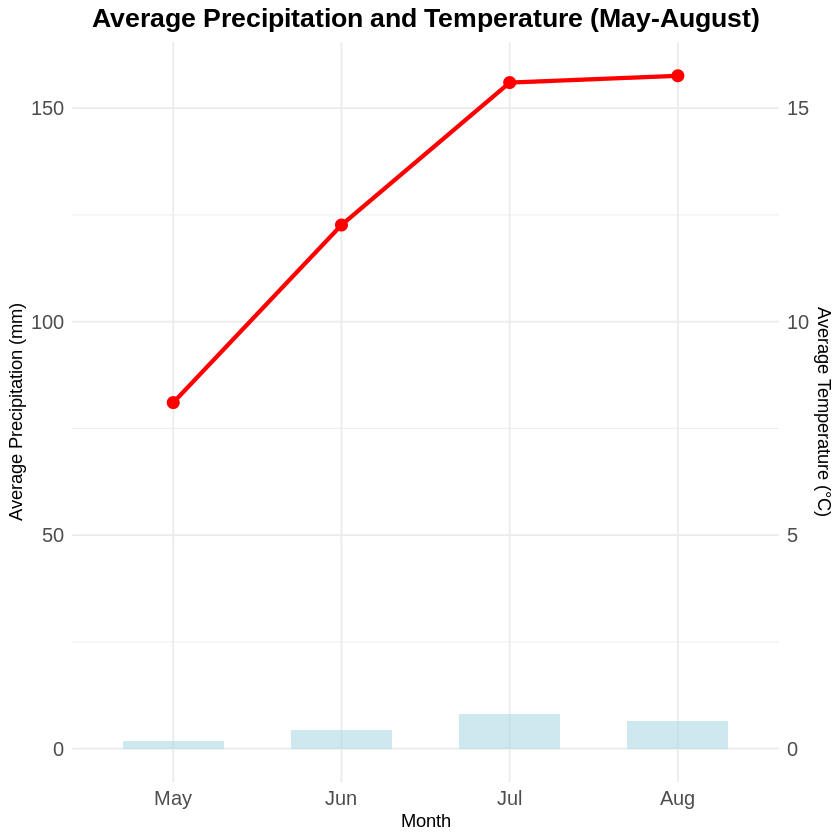

In [ ]:
ggplot(data = precip_temp_data, aes(x = Month_Label)) +
  geom_bar(aes(y = Avg_Precip), stat = "identity", fill = "lightblue", alpha = 0.6, width = 0.6) +
  geom_line(aes(y = Avg_humid * 10, group = 1), color = "red", size = 1.2) +  # Scaling the temperature/humidity
  geom_point(aes(y = Avg_humid * 10), color = "red", size = 3) +
  scale_y_continuous(
    name = "Average Precipitation (mm)",
    sec.axis = sec_axis(~ . / 10, name = "Average Temperature (°C)")  # Rescale to show actual temperature on secondary axis
  ) +
  labs(
    title = "Average Precipitation and Temperature (May-August)",
    x = "Month"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12)
  )


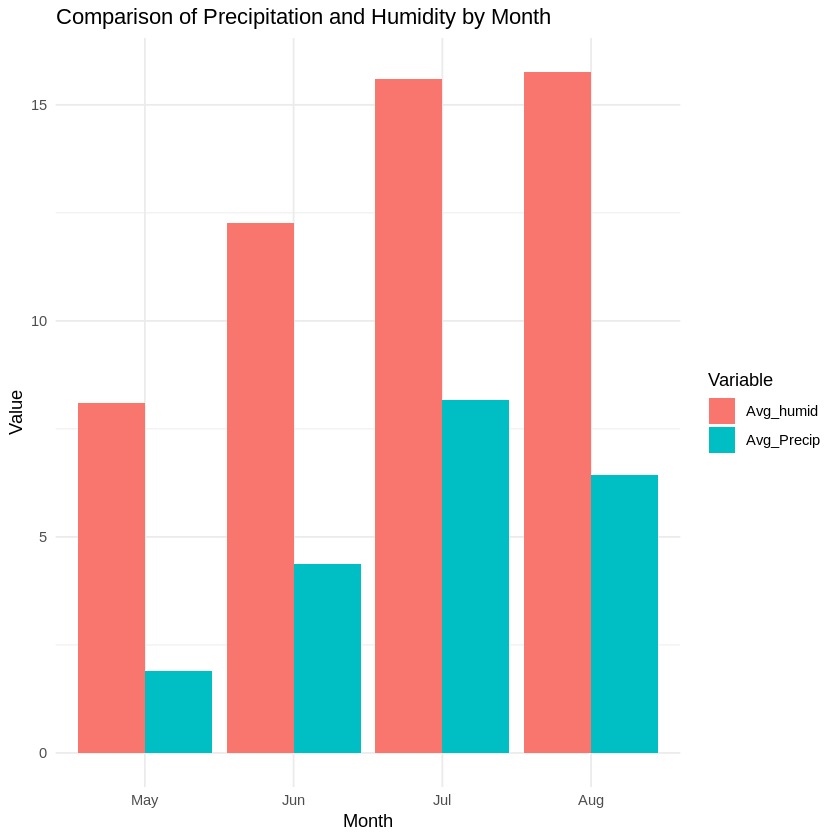

In [ ]:

precip_temp_data_long <- pivot_longer(precip_temp_data, cols = c(Avg_Precip, Avg_humid), names_to = "Variable", values_to = "Value")

ggplot(precip_temp_data_long, aes(x = Month_Label, y = Value, fill = Variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Comparison of Precipitation and Humidity by Month", x = "Month", y = "Value") +
  theme_minimal()


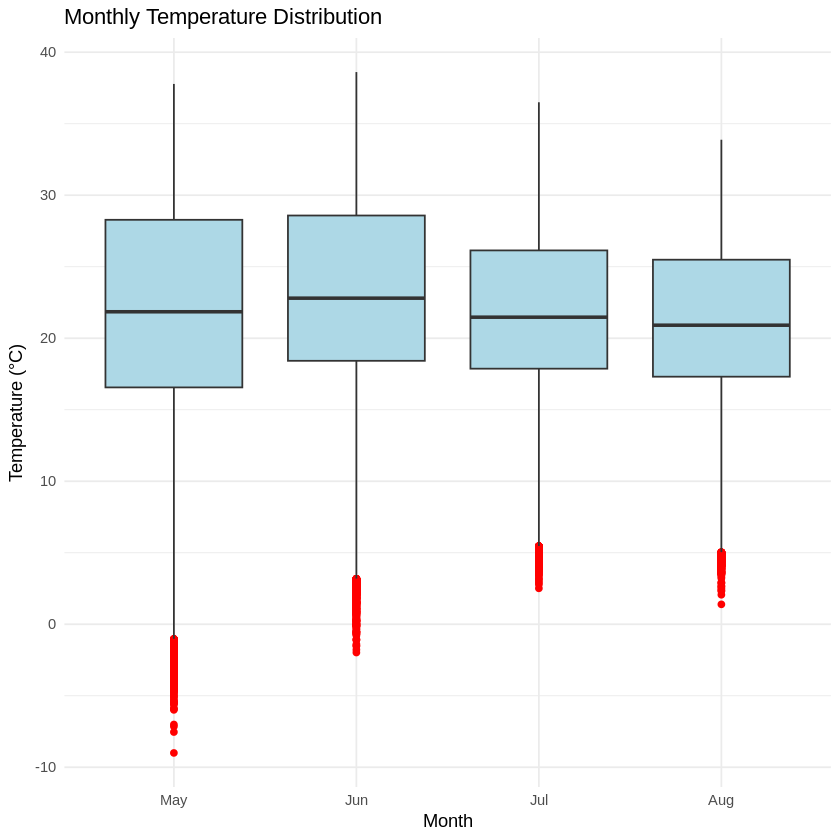

In [ ]:

# Create a box plot for temperature distribution by month
ggplot(time_based_filter, aes(x = Month_Label, y = Temp_2m)) +
  geom_boxplot(fill = "lightblue", outlier.color = "red") +
  labs(title = "Monthly Temperature Distribution",
       x = "Month",
       y = "Temperature (°C)") +
  theme_minimal()


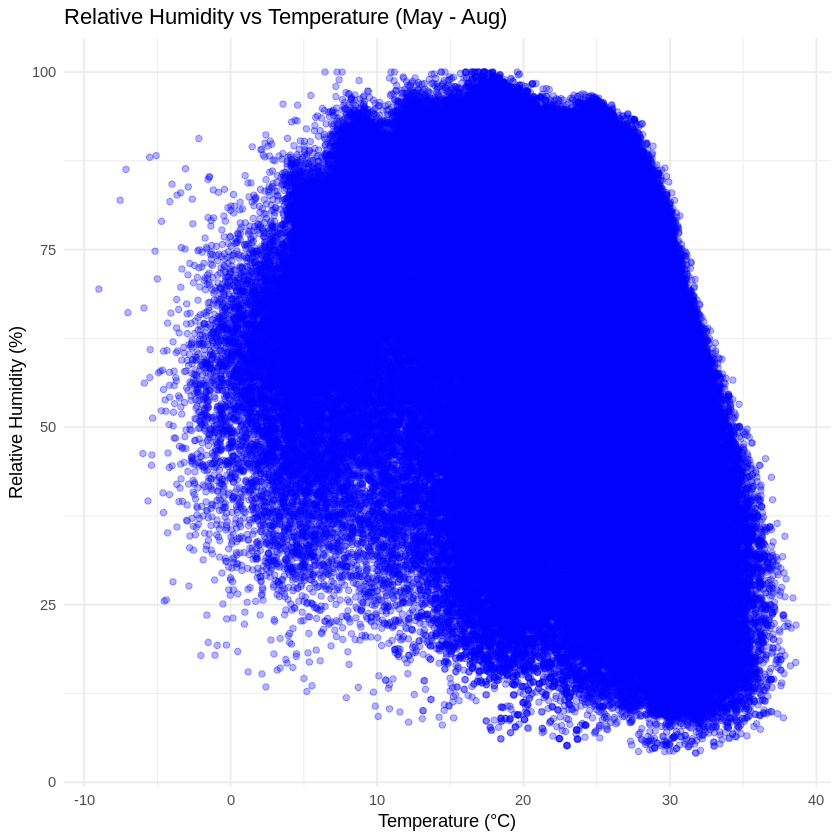

In [ ]:
ggplot(time_based_filter, aes(x = Temp_2m, y = RH_2m)) +
  geom_point(alpha = 0.3, color = "blue") +
  labs(title = "Relative Humidity vs Temperature (May - Aug)",
       x = "Temperature (°C)", y = "Relative Humidity (%)") +
  theme_minimal()


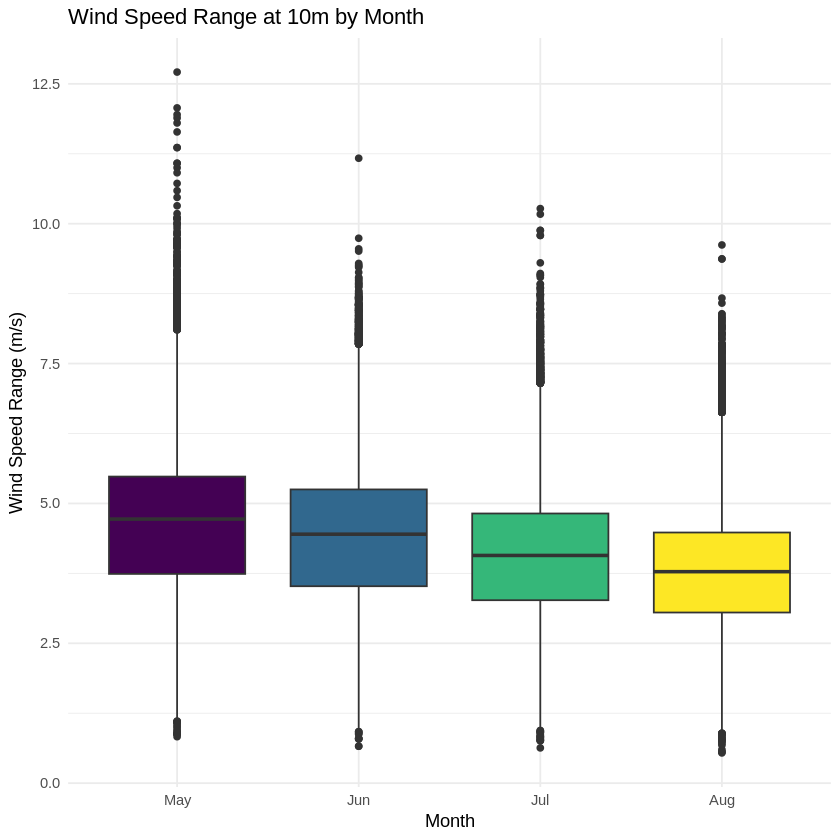

In [ ]:
ggplot(time_based_filter, aes(x = Month_Label, y = WindSpeedRange_10m, fill = Month_Label)) +
  geom_boxplot() +
  labs(title = "Wind Speed Range at 10m by Month",
       x = "Month", y = "Wind Speed Range (m/s)") +
  theme_minimal() +
  theme(legend.position = "none")


`summarise()` has grouped output by 'District'. You can override using the
`.groups` argument.


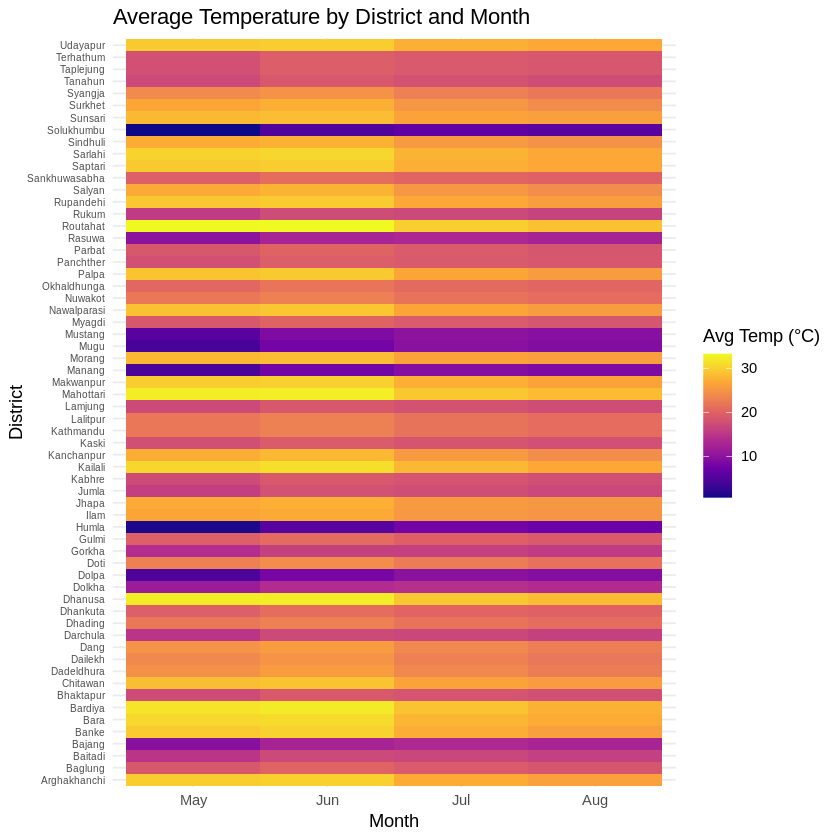

In [ ]:
library(reshape2)

avg_temp_district <- time_based_filter %>%
  group_by(District, Month_Label) %>%
  summarise(AvgTemp = mean(Temp_2m, na.rm = TRUE)) %>%
  ungroup()

ggplot(avg_temp_district, aes(x = Month_Label, y = District, fill = AvgTemp)) +
  geom_tile() +
  scale_fill_viridis_c(option = "plasma") +
  labs(title = "Average Temperature by District and Month",
       x = "Month", y = "District", fill = "Avg Temp (°C)") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 6))


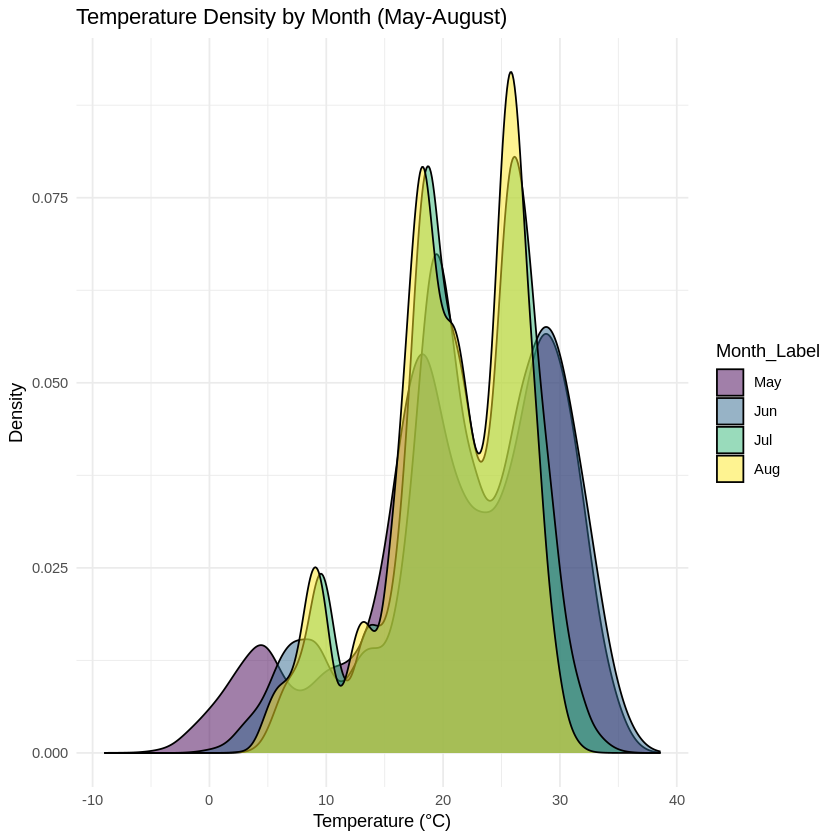

In [ ]:
ggplot(time_based_filter, aes(x = Temp_2m, fill = Month_Label)) +
  geom_density(alpha = 0.5) +
  labs(title = "Temperature Density by Month (May-August)",
       x = "Temperature (°C)", y = "Density") +
  theme_minimal()


###Slicing by western region

In [ ]:
install.packages("gridExtra")
library(gridExtra)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# List of districts to match
district_list <- c("Gorkha", "Kaski", "Lamjung", "Manang", "Syangja",
                  "Arghakhanchi", "Gulmi",
                   "Nawalparasi", "Palpa", "Rupandehi", "Baglung",
                    "Myagdi", "Parbat","Mustang")

# Filter the dataset
filtered_data_western <- df_climate[df_climate$District %in% district_list, ]
dim(filtered_data_western)


[1] 199416     25

In [ ]:
Arghakhanchi"  "Baglung"       "Baitadi"       "Bajang"
 [5] "Banke"         "Bara"          "Bardiya"       "Bhaktapur"
 [9] "Chitawan"      "Dadeldhura"    "Dailekh"       "Dang"
[13] "Darchula"      "Dhading"       "Dhankuta"      "Dhanusa"
[17] "Dolkha"        "Dolpa"         "Doti"          "Gorkha"
[21] "Gulmi"         "Humla"         "Ilam"          "Jhapa"
[25] "Jumla"         "Kabhre"        "Kailali"       "Kanchanpur"
[29] "Kaski"         "Kathmandu"     "Lalitpur"      "Lamjung"
[33] "Mahottari"     "Makwanpur"     "Manang"        "Morang"
[37] "Mugu"          "Mustang"       "Myagdi"        "Nawalparasi"
[41] "Nuwakot"       "Okhaldhunga"   "Palpa"         "Panchther"
[45] "Parbat"        "Rasuwa"        "Routahat"      "Rukum"
[49] "Rupandehi"     "Salyan"        "Sankhuwasabha" "Saptari"
[53] "Sarlahi"       "Sindhuli"      "Solukhumbu"    "Sunsari"
[57] "Surkhet"       "Syangja"       "Tanahun"       "Taplejung"
[61] "Terhathum"     "Udayapur"

In [ ]:
# List of districts to match
district_list <- c("Kathmandu", "Chitawan", "Taplejung",
                   "Arghakhanchi","Nuwakot", "Mustang")

# Filter the dataset
df <- df_climate[df_climate$District %in% district_list, ]
dim(df)

[1] 85464    25

In [ ]:
head(filtered_data_western)

Date       District     Latitude Longitude Precip Pressure Humidity_2m RH_2m
1 1981-01-01 Arghakhanchi 27.9     83.2      0.00   93.51    4.81        45.41
2 1981-01-02 Arghakhanchi 27.9     83.2      0.00   93.59    4.94        46.78
3 1981-01-03 Arghakhanchi 27.9     83.2      0.03   93.55    5.22        47.91
4 1981-01-04 Arghakhanchi 27.9     83.2      0.02   93.49    5.36        50.83
5 1981-01-05 Arghakhanchi 27.9     83.2      1.84   93.49    5.84        55.55
6 1981-01-06 Arghakhanchi 27.9     83.2      2.41   93.39    6.02        59.18
  Temp_2m WetBulbTemp_2m ⋯ MaxWindSpeed_10m MinWindSpeed_10m WindSpeedRange_10m
1 13.89   2.15           ⋯ 3.83             0.69             3.14              
2 13.84   2.54           ⋯ 2.60             1.09             1.50              
3 14.33   3.32           ⋯ 2.80             0.48             2.32              
4 13.82   3.73           ⋯ 3.54             1.06             2.49              
5 13.76   4.93           ⋯ 2.70             0.69             2.02              
6 13.24   5.23           ⋯ 3.62             0.74             2.89              
  WindSpeed_50m MaxWindSpeed_50m MinWindSpeed_50m WindSpeedRange_50m
1 2.41          4.12             0.73             3.39              
2 2.25          3.30             0.96             2.34              
3 2.32          3.54             0.39             3.15              
4 2.90          4.05             0.93             3.12              
5 2.74          4.64             0.96             3.68              
6 2.56          3.98             0.76             3.22              
  Month_Number Month_Label Season
1 1            Jan         Winter
2 1            Jan         Winter
3 1            Jan         Winter
4 1            Jan         Winter
5 1            Jan         Winter
6 1            Jan         Winter

In [ ]:
# Convert 'Date' column to Date format
filtered_data_western$Date <- as.Date(filtered_data_western$Date)

# Extract year as numeric
filtered_data_western$year <- as.numeric(format(filtered_data_western$Date, "%Y"))

# Remove rows where year is between 1980 and 1990 (inclusive)
df_filtered <- filtered_data_western[!(filtered_data_western$year >= 1980 & filtered_data_western$year <= 1995), ]



In [ ]:
# Convert 'Date' column to Date format
df$Date <- as.Date(df$Date)

# Extract year as numeric
df$year <- as.numeric(format(df$Date, "%Y"))

# Remove rows where year is between 1980 and 1990 (inclusive)
df_filter <- df[!(df$year >= 1980 & df$year <= 1995), ]

In [ ]:
dim(df_filter)

[1] 52596    26

In [ ]:
dim(df_filtered)

[1] 122724     26

In [ ]:
write.csv(df_filter, file = "df_filter.csv", row.names = FALSE)

In [ ]:
# Save as CSV
write.csv(df_filtered, file = "df_filtered.csv", row.names = FALSE)

In [ ]:
# Save as CSV
write.csv(filtered_data_western, file = "dataframe_western.csv", row.names = FALSE)

In [ ]:
unique_districts2 <- unique(filtered_data_western$District)

# Print the unique district names
print(unique_districts2)

 [1] "Arghakhanchi" "Baglung"      "Gorkha"       "Gulmi"        "Kaski"       
 [6] "Lamjung"      "Manang"       "Mustang"      "Myagdi"       "Nawalparasi" 
[11] "Palpa"        "Parbat"       "Rupandehi"    "Syangja"     


Warning message in layer_sf(geom = GeomSf, data = data, mapping = mapping, stat = stat, :
“Ignoring unknown aesthetics: data”
Warning message:
“Removed 61 rows containing missing values or values outside the scale range
(`geom_point()`).”


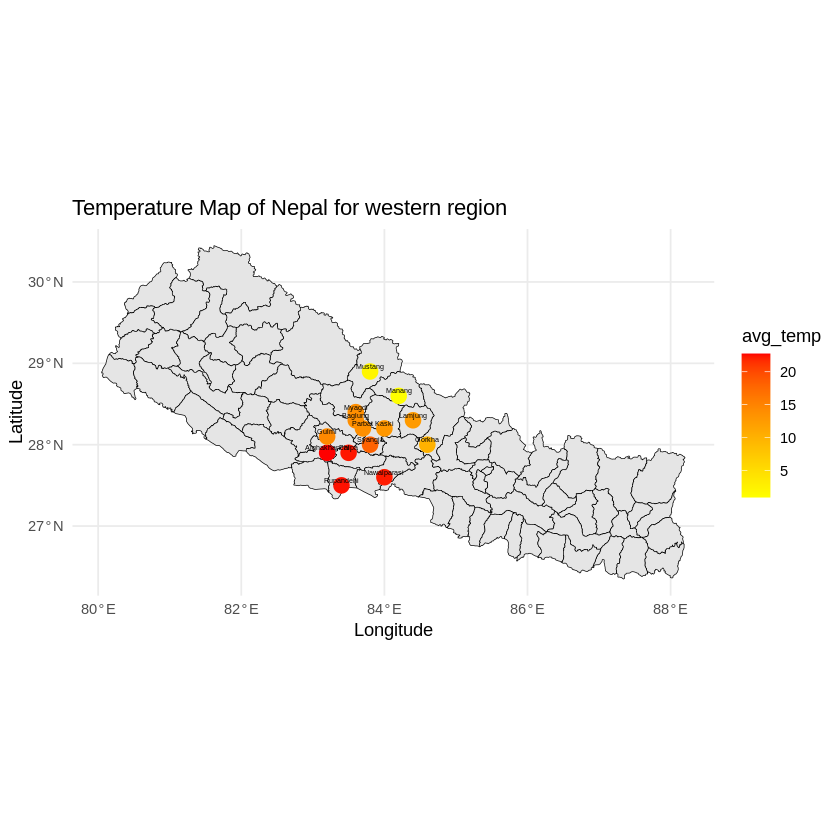

In [ ]:
# Calculate average temperature per district
plot_western <- filtered_data_western %>%
  group_by(District) %>%
  summarise(
  avg_temp = mean(Temp_2m, na.rm = TRUE),
  Latitude = first(Latitude),
  Longitude = first(Longitude)
)
# Merge temperature data with spatial data
nepal_temp_west <- left_join(nepal_districts, plot_western , by = "District")

# Plot
ggplot(data = nepal_temp_west) +
  geom_sf(aes(data = avg_temp), color = "black") +
    geom_point(aes(x = Longitude, y = Latitude, color = avg_temp), size = 4) +  # Points for avg_temp
  geom_text(data = plot_western , aes(x = Longitude, y = Latitude, label = District),
            size = 1.5, vjust = -0.5, color = "black") +
  scale_color_gradient(low = "yellow", high = "red") +  # Color scale
  labs(title = "Temperature Map of Nepal for western region", fill = "Temperature") +
  theme_minimal()




In [ ]:
glimpse(filtered_data_western)

Rows: 199,416
Columns: 28
$ Date               <date> 1981-01-01, 1981-01-01, 1981-01-01, 1981-01-01, 19…
$ District           <chr> "Arghakhanchi", "Baglung", "Gorkha", "Gulmi", "Kask…
$ Latitude           <dbl> 27.9, 28.3, 28.0, 28.1, 28.2, 28.3, 28.6, 28.9, 28.…
$ Longitude          <dbl> 83.2, 83.6, 84.6, 83.2, 84.0, 84.4, 84.2, 83.8, 83.…
$ Precip             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Pressure           <dbl> 93.51, 79.29, 73.70, 80.08, 78.16, 77.59, 61.21, 62…
$ Humidity_2m        <dbl> 4.81, 3.73, 3.09, 3.72, 3.56, 3.47, 1.95, 2.02, 3.7…
$ RH_2m              <dbl> 45.41, 50.12, 49.03, 47.74, 49.43, 49.08, 54.47, 52…
$ Temp_2m            <dbl> 13.89, 6.14, 2.73, 6.98, 5.45, 5.11, -7.40, -6.20, …
$ WetBulbTemp_2m     <dbl> 2.15, -4.07, -7.37, -3.81, -4.81, -5.18, -14.54, -1…
$ MaxTemp_2m         <dbl> 20.82, 13.12, 9.88, 13.89, 12.47, 12.15, 0.88, 2.34…
$ MinTemp_2m         <dbl> 9.94, 1.68, -2.81, 2.39, 0.73, 0.25, -14.45, -12.97…
$ TempRange_2m

In [ ]:
monthly_climate <- filtered_data_western %>%
  group_by(Month_Label) %>%
  summarize(
    Avg_min_wind = mean(MinWindSpeed_50m, na.rm = TRUE),
    Avg_Mean_wind = mean(WindSpeed_50m, na.rm = TRUE),
    Avg_Max_wind = mean(MaxWindSpeed_50m, na.rm = TRUE),
    Avg_Precip = mean(Precip, na.rm = TRUE)
  ) %>%
  arrange(match(Month_Label, c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")))


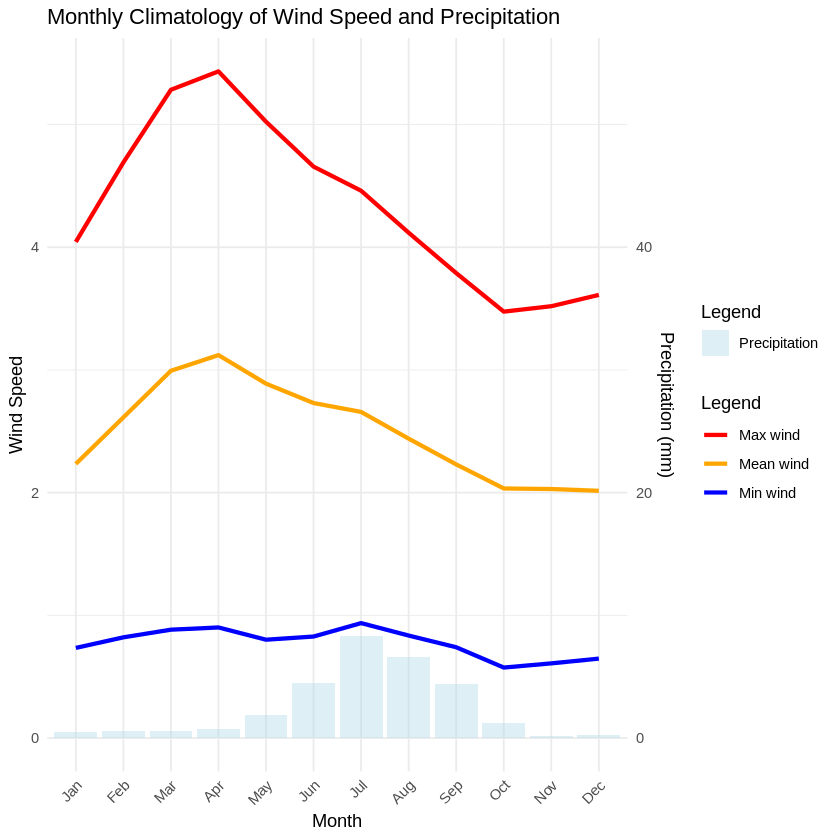

In [ ]:
ggplot(data = monthly_climate, aes(x = Month_Label)) +
  # Temperature lines
  geom_line(aes(y = Avg_min_wind, group = 1, color = "Min wind"), size = 1.2) +
  geom_line(aes(y = Avg_Mean_wind, group = 1, color = "Mean wind"), size = 1.2) +
  geom_line(aes(y = Avg_Max_wind, group = 1, color = "Max wind"), size = 1.2) +
  # Precipitation bars
  geom_bar(aes(y = Avg_Precip / 10, fill = "Precipitation"), stat = "identity", alpha = 0.4) +
  # Customize scales
  scale_y_continuous(
    name = "Wind Speed",
    sec.axis = sec_axis(~. * 10, name = "Precipitation (mm)")
  ) +
  # Customize colors
  scale_color_manual(
    values = c("Min wind" = "blue", "Mean wind" = "orange", "Max wind" = "red")
  ) +
  scale_fill_manual(
    values = c("Precipitation" = "lightblue")
  ) +
  # Labels and theme
  labs(
    title = "Monthly Climatology of Wind Speed and Precipitation",
    x = "Month",
    color = "Legend",
    fill = "Legend"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

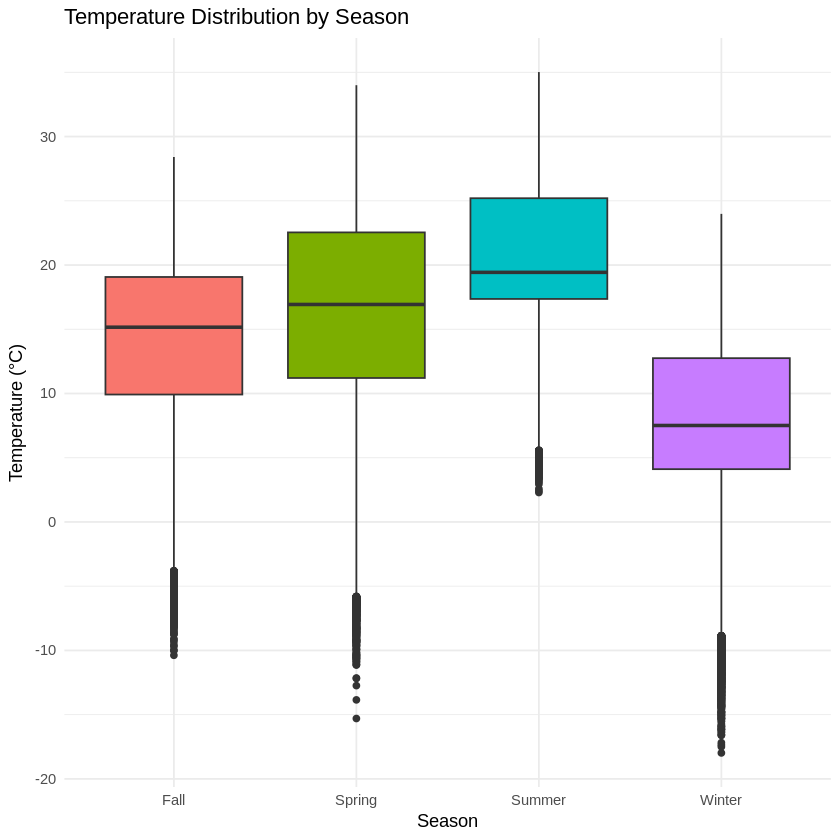

In [ ]:
ggplot(filtered_data_western, aes(x = Season, y = Temp_2m, fill = Season)) +
  geom_boxplot() +
  labs(title = "Temperature Distribution by Season",
       x = "Season", y = "Temperature (°C)") +
  theme_minimal() +
  theme(legend.position = "none")


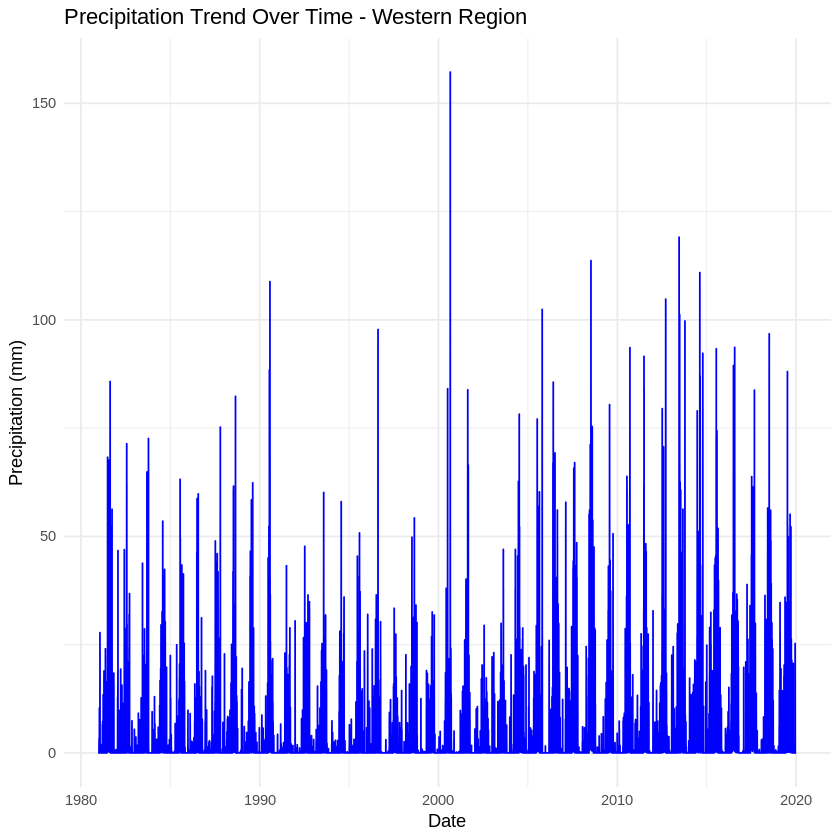

In [ ]:
ggplot(filtered_data_western, aes(x = Date, y = Precip)) +
  geom_line(color = "blue") +
  labs(title = "Precipitation Trend Over Time - Western Region",
       x = "Date", y = "Precipitation (mm)") +
  theme_minimal()


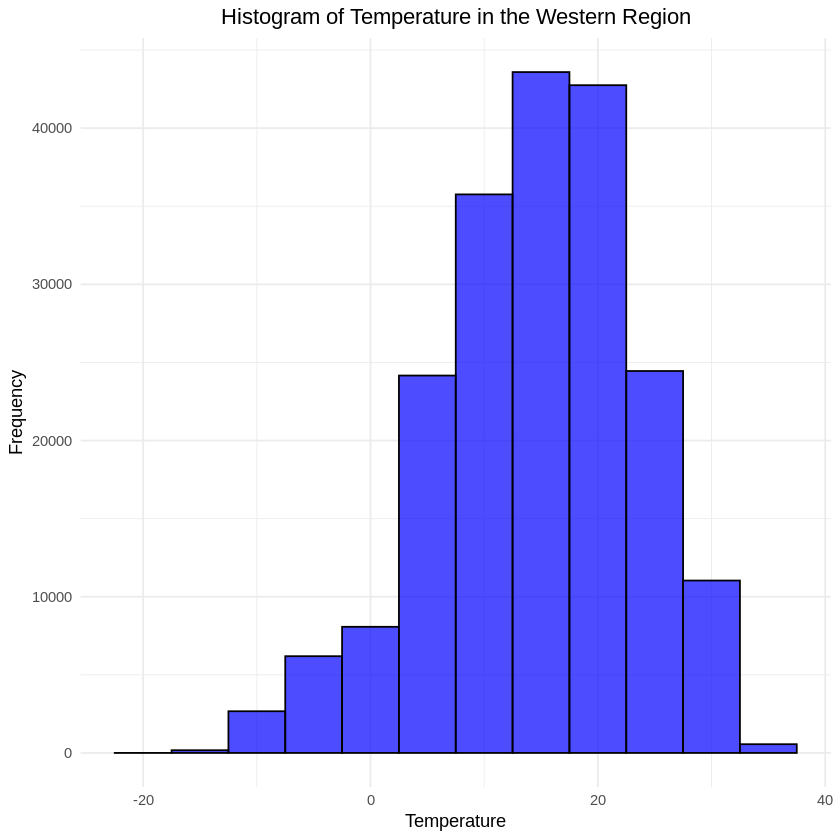

In [ ]:
ggplot(filtered_data_western, aes(x = Temp_2m)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black", alpha = 0.7) +  # Adjust binwidth as needed
  labs(title = "Histogram of Temperature in the Western Region",
       x = "Temperature",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))


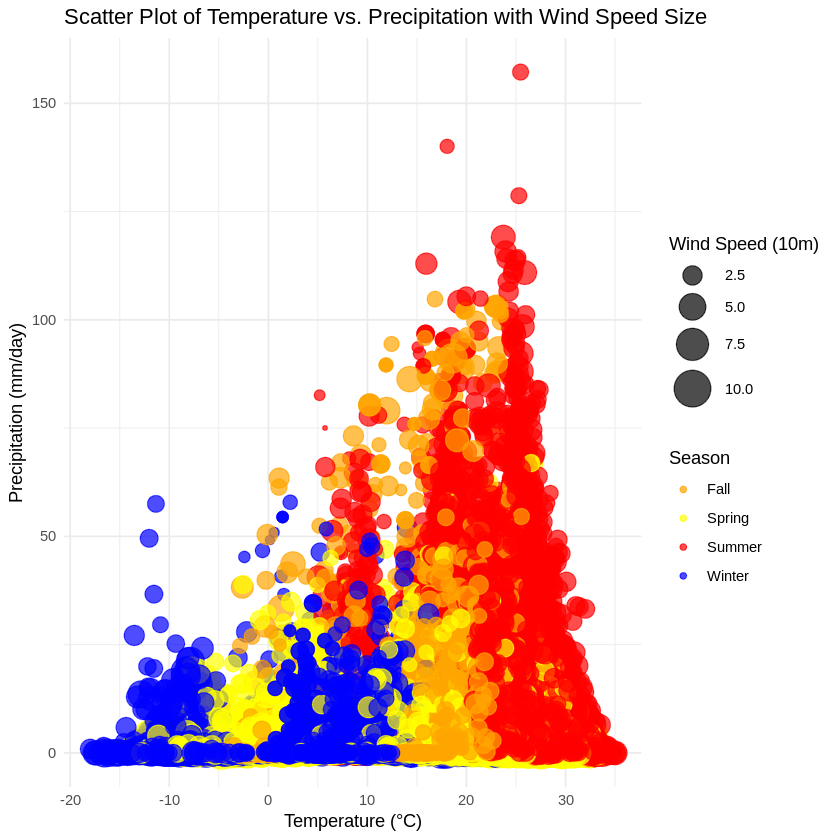

In [ ]:
# Suppose the unique values in Season are "Spring", "Summer", "Fall", and "Winter"
ggplot(filtered_data_western, aes(x = Temp_2m, y = Precip, color = Season, size = WindSpeed_10m)) +
  geom_point(alpha = 0.7) +
  scale_color_manual(values = c(
    "Spring" = adjustcolor("yellow", alpha.f = 0.6),
    "Summer" = adjustcolor("red", alpha.f = 0.6),
    "Fall" = adjustcolor("orange", alpha.f = 0.6),
    "Winter" = adjustcolor("blue", alpha.f = 0.6)
  )) +
  scale_size_continuous(range = c(1, 10)) +
  labs(title = "Scatter Plot of Temperature vs. Precipitation with Wind Speed Size ",
       x = "Temperature (°C)",
       y = "Precipitation (mm/day)",
       color = "Season",
       size = "Wind Speed (10m)") +
  theme_minimal()


In [ ]:
western_region_data_long <- filtered_districts %>%
  pivot_longer(cols = c(Precip, Temp_2m),
               names_to = "Variable",
               values_to = "Value")


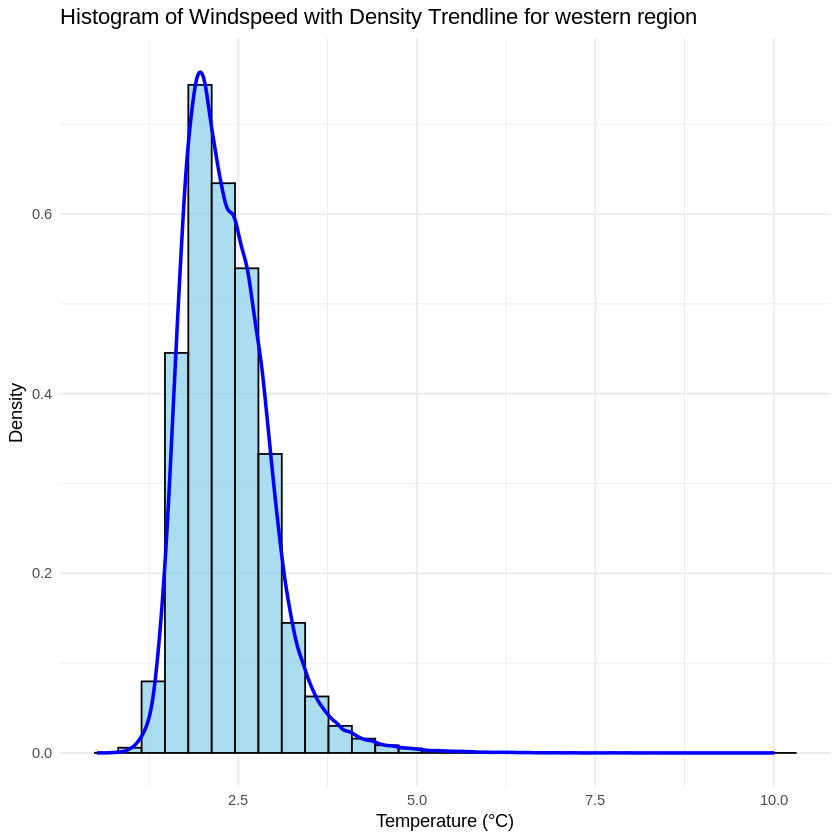

In [ ]:
# Create histogram with density curve
ggplot(filtered_data_western, aes(x = WindSpeed_10m)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", color = "black", alpha = 0.7) + # Histogram with density on y-axis
  geom_density(color = "blue", linewidth = 1) + # Overlay density curve
  labs(title = "Histogram of Windspeed with Density Trendline for western region",
       x = "Temperature (°C)",
       y = "Density") +
  theme_minimal()


#Agriculture Dataset(hilly)

In [ ]:
# Reading a CSV file
data_hilly <- read.csv("/content/dataframe_hilly.csv")

# Display the first few rows
head(data_hilly)


Date       District     Latitude Longitude Precip Pressure Humidity_2m RH_2m
1 1981-01-01 Arghakhanchi 27.9     83.2      0.00   93.51    4.81        45.41
2 1981-01-02 Arghakhanchi 27.9     83.2      0.00   93.59    4.94        46.78
3 1981-01-03 Arghakhanchi 27.9     83.2      0.03   93.55    5.22        47.91
4 1981-01-04 Arghakhanchi 27.9     83.2      0.02   93.49    5.36        50.83
5 1981-01-05 Arghakhanchi 27.9     83.2      1.84   93.49    5.84        55.55
6 1981-01-06 Arghakhanchi 27.9     83.2      2.41   93.39    6.02        59.18
  Temp_2m WetBulbTemp_2m ⋯ MaxWindSpeed_10m MinWindSpeed_10m WindSpeedRange_10m
1 13.89   2.15           ⋯ 3.83             0.69             3.14              
2 13.84   2.54           ⋯ 2.60             1.09             1.50              
3 14.33   3.32           ⋯ 2.80             0.48             2.32              
4 13.82   3.73           ⋯ 3.54             1.06             2.49              
5 13.76   4.93           ⋯ 2.70             0.69             2.02              
6 13.24   5.23           ⋯ 3.62             0.74             2.89              
  WindSpeed_50m MaxWindSpeed_50m MinWindSpeed_50m WindSpeedRange_50m
1 2.41          4.12             0.73             3.39              
2 2.25          3.30             0.96             2.34              
3 2.32          3.54             0.39             3.15              
4 2.90          4.05             0.93             3.12              
5 2.74          4.64             0.96             3.68              
6 2.56          3.98             0.76             3.22              
  Month_Number Month_Label Season
1 1            Jan         Winter
2 1            Jan         Winter
3 1            Jan         Winter
4 1            Jan         Winter
5 1            Jan         Winter
6 1            Jan         Winter

In [ ]:
data_hilly$Year <- year(data_hilly$Date)

In [ ]:
head(data_hilly)

Date       District     Latitude Longitude Precip Pressure Humidity_2m RH_2m
1 1981-01-01 Arghakhanchi 27.9     83.2      0.00   93.51    4.81        45.41
2 1981-01-02 Arghakhanchi 27.9     83.2      0.00   93.59    4.94        46.78
3 1981-01-03 Arghakhanchi 27.9     83.2      0.03   93.55    5.22        47.91
4 1981-01-04 Arghakhanchi 27.9     83.2      0.02   93.49    5.36        50.83
5 1981-01-05 Arghakhanchi 27.9     83.2      1.84   93.49    5.84        55.55
6 1981-01-06 Arghakhanchi 27.9     83.2      2.41   93.39    6.02        59.18
  Temp_2m WetBulbTemp_2m ⋯ MinWindSpeed_10m WindSpeedRange_10m WindSpeed_50m
1 13.89   2.15           ⋯ 0.69             3.14               2.41         
2 13.84   2.54           ⋯ 1.09             1.50               2.25         
3 14.33   3.32           ⋯ 0.48             2.32               2.32         
4 13.82   3.73           ⋯ 1.06             2.49               2.90         
5 13.76   4.93           ⋯ 0.69             2.02               2.74         
6 13.24   5.23           ⋯ 0.74             2.89               2.56         
  MaxWindSpeed_50m MinWindSpeed_50m WindSpeedRange_50m Month_Number Month_Label
1 4.12             0.73             3.39               1            Jan        
2 3.30             0.96             2.34               1            Jan        
3 3.54             0.39             3.15               1            Jan        
4 4.05             0.93             3.12               1            Jan        
5 4.64             0.96             3.68               1            Jan        
6 3.98             0.76             3.22               1            Jan        
  Season Year
1 Winter 1981
2 Winter 1981
3 Winter 1981
4 Winter 1981
5 Winter 1981
6 Winter 1981

In [ ]:
data_agri <- read.csv("/content/agriculture.csv")

In [ ]:
head(data_agri)

Adm0.En ADM0.EN..Nepal.province.shp. Adm0.Pcode
1 Nepal   Nepal                        NP        
2 Nepal   Nepal                        NP        
3 Nepal   Nepal                        NP        
4 Nepal   Nepal                        NP        
5 Nepal   Nepal                        NP        
6 Nepal   Nepal                        NP        
  ADM0.PCODE..Nepal.province.shp. Adm1.En ADM1.EN..Nepal.province.shp.
1 NP                              5       5                           
2 NP                              5       5                           
3 NP                              5       5                           
4 NP                              5       5                           
5 NP                              5       5                           
6 NP                              5       5                           
  Adm1.Pcode ADM1.PCODE..Nepal.province.shp. Adm1.Ref Adm1Alt1En ⋯
1 NP05       NP05                            NA       NA         ⋯
2 NP05       NP05                            NA       NA         ⋯
3 NP05       NP05                            NA       NA         ⋯
4 NP05       NP05                            NA       NA         ⋯
5 NP05       NP05                            NA       NA         ⋯
6 NP05       NP05                            NA       NA         ⋯
  Kg.Per.Hectare                      Measure  Metric.Ton Number.of.Records
1 Kg Per 0e5/14/1901tare              500.0000 NA         1                
2 Kg Per 16e10/27/1901 4:00:00 PMtare 666.6667 NA         1                
3 Kg Per 0e8/22/1901tare              600.0000 NA         1                
4 Kg Per 0e5/14/1901tare              500.0000 NA         1                
5 Kg Per 0e2/3/1901tare               400.0000 NA         1                
6 Kg Per 10e3/19/1901 10:40:00 AMtare 444.4444 NA         1                
  Production Shape.Area Shape.Area..Nepal.province.shp. Shape.Leng
1 10.00000   0.1509977  1.768381                        2.231063  
2 20.00000   0.1509977  1.768381                        2.231063  
3 30.00000   0.1509977  1.768381                        2.231063  
4 20.00000   0.1509977  1.768381                        2.231063  
5 23.33044   0.0663588  1.768381                        1.501964  
6 23.33044   0.0663588  1.768381                        1.501964  
  Shape.Leng..Nepal.province.shp. Yield   
1 12.62472                        500.0000
2 12.62472                        666.6667
3 12.62472                        600.0000
4 12.62472                        500.0000
5 12.62472                        400.0000
6 12.62472                        444.4444

In [ ]:
glimpse(data_agri)

Rows: 68,243
Columns: 41
$ Adm0.En                         <chr> "Nepal", "Nepal", "Nepal", "Nepal", "N…
$ ADM0.EN..Nepal.province.shp.    <chr> "Nepal", "Nepal", "Nepal", "Nepal", "N…
$ Adm0.Pcode                      <chr> "NP", "NP", "NP", "NP", "NP", "NP", "N…
$ ADM0.PCODE..Nepal.province.shp. <chr> "NP", "NP", "NP", "NP", "NP", "NP", "N…
$ Adm1.En                         <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ ADM1.EN..Nepal.province.shp.    <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ Adm1.Pcode                      <chr> "NP05", "NP05", "NP05", "NP05", "NP05"…
$ ADM1.PCODE..Nepal.province.shp. <chr> "NP05", "NP05", "NP05", "NP05", "NP05"…
$ Adm1.Ref                        <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Adm1Alt1En                      <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Adm1Alt2En                      <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Crop                            <chr> "Soyabean", "Soyabean", "Soyabean", "S…
$ Crop.Type    

In [ ]:
sum(is.na(data_agri))
colSums(is.na(data_agri))

[1] 619393

Adm0.En    ADM0.EN..Nepal.province.shp. 
                              0                               0 
                     Adm0.Pcode ADM0.PCODE..Nepal.province.shp. 
                              0                               0 
                        Adm1.En    ADM1.EN..Nepal.province.shp. 
                              0                               0 
                     Adm1.Pcode ADM1.PCODE..Nepal.province.shp. 
                              0                               0 
                       Adm1.Ref                      Adm1Alt1En 
                          68243                           68243 
                     Adm1Alt2En                            Crop 
                          68243                               0 
                      Crop.Type                            Date 
                              0                               0 
      date..Nepal.province.shp.                           Date1 
                              0                               0 
                     Dist.Alt1E                      Dist.Alt2E 
                          68243                           68243 
                        Dist.En                      Dist.Pcode 
                              0                               0 
                       Dist.Ref                        District 
                          68243                               0 
                       Province                            Unit 
                              0                               0 
                       Valid.On                        Valid.To 
                              0                           68243 
   validOn..Nepal.province.shp.    validTo..Nepal.province.shp. 
                              0                           68243 
             Area.of.Production                        Geometry 
                            538                               0 
  Geometry..Nepal.province.shp.                  Kg.Per.Hectare 
                              0                               0 
                        Measure                      Metric.Ton 
                           1944                           68243 
              Number.of.Records                      Production 
                              0                             780 
                     Shape.Area Shape.Area..Nepal.province.shp. 
                              0                               0 
                     Shape.Leng Shape.Leng..Nepal.province.shp. 
                              0                               0 
                          Yield 
                           1944

In [ ]:

columns_to_drop <- c(
  "Adm0.En", "ADM0.EN..Nepal.province.shp.", "Adm0.Pcode", "ADM0.PCODE..Nepal.province.shp.",
  "Adm1.En", "ADM1.EN..Nepal.province.shp.", "Adm1.Pcode", "ADM1.PCODE..Nepal.province.shp.",
  "Adm1.Ref", "Adm1Alt1En", "Adm1Alt2En", "date..Nepal.province.shp.", "Date1",
  "Dist.Alt1E", "Dist.Alt2E", "Dist.En", "Dist.Pcode", "Dist.Ref",
  "Unit", "Valid.On", "Valid.To", "validOn..Nepal.province.shp.", "validTo..Nepal.province.shp.",
  "Area.of.Production", "Geometry", "Geometry..Nepal.province.shp.",
  "Kg.Per.Hectare", "Measure", "Metric.Ton", "Number.of.Records",
  "Shape.Area", "Shape.Area..Nepal.province.shp.", "Shape.Leng", "Shape.Leng..Nepal.province.shp."
)

data_agri_clean <- data_agri %>%
  select(-all_of(columns_to_drop))


In [ ]:
data_agri_clean <- data_agri_clean %>%
  rename(Year = Date)

In [ ]:
glimpse(data_agri_clean)

Rows: 68,243
Columns: 7
$ Crop       <chr> "Soyabean", "Soyabean", "Soyabean", "Soyabean", "Soyabean",…
$ Crop.Type  <chr> "Pulse", "Pulse", "Pulse", "Pulse", "Pulse", "Pulse", "Puls…
$ Year       <int> 1986, 1987, 1988, 1989, 1991, 1992, 1993, 1994, 1995, 1996,…
$ District   <chr> "Kapilbastu", "Kapilbastu", "Kapilbastu", "Kapilbastu", "Na…
$ Province   <chr> "Province 5", "Province 5", "Province 5", "Province 5", "Pr…
$ Production <dbl> 10.00000, 20.00000, 30.00000, 20.00000, 23.33044, 23.33044,…
$ Yield      <dbl> 500.0000, 666.6667, 600.0000, 500.0000, 400.0000, 444.4444,…


In [ ]:
summary(data_agri_clean)

     Crop            Crop.Type              Date        District        
 Length:68243       Length:68243       Min.   :1968   Length:68243      
 Class :character   Class :character   1st Qu.:1991   Class :character  
 Mode  :character   Mode  :character   Median :2002   Mode  :character  
                                       Mean   :1999                     
                                       3rd Qu.:2010                     
                                       Max.   :2017                     
                                                                        
   Province           Production          Yield          
 Length:68243       Min.   :      0   Min.   :      0.0  
 Class :character   1st Qu.:     94   1st Qu.:    857.1  
 Mode  :character   Median :    435   Median :   1689.7  
                    Mean   :   7344   Mean   :   5717.8  
                    3rd Qu.:   3346   3rd Qu.:   8200.0  
                    Max.   :1350000   Max.   :4172000.0  
          

In [ ]:
sum(is.na(data_agri_clean))
colSums(is.na(data_agri_clean))

[1] 2724

Crop  Crop.Type       Date   District   Province Production      Yield 
         0          0          0          0          0        780       1944

In [ ]:
# Summary stats with outliers
summary(data_agri_clean$Yield)

# Summary stats without outliers
clean_yield <- data_agri_clean %>% filter(Yield >= lower_bound & Yield <= upper_bound)
summary(clean_yield$Yield)


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
      0.0     857.1    1689.7    5717.8    8200.0 4172000.0      1944 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   840.6  1600.0  4361.7  7912.9 19200.2 

In [ ]:
# Summary stats with outliers
summary(data_agri_clean$Production)

# Summary stats without outliers
clean_production <- data_agri_clean %>% filter(Production >= lower_bound & Production <= upper_bound)
summary(clean_production$Production)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0      94     435    7344    3346 1350000     780 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      80     327    1989    1670   19210 

In [ ]:
median_yield <- median(data_agri_clean$Yield, na.rm = TRUE)
data_agri_clean$Yield[is.na(data_agri_clean$Yield)] <- median_yield
sum(is.na(data_agri_clean$Yield))
summary(data_agri_clean$Yield)

[1] 0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     875    1690    5603    8000 4172000 

In [ ]:
median_production <- median(data_agri_clean$Production, na.rm = TRUE)
data_agri_clean$Production[is.na(data_agri_clean$Production)] <- median_production
sum(is.na(data_agri_clean$Production))
summary(data_agri_clean$Production)

[1] 0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      98     435    7265    3249 1350000 

In [ ]:
merged_data <- merge(data_agri_clean, data_hilly,
                     by = c("District", "Year"),
                     all = FALSE)   # all=FALSE is default; returns inner join

In [ ]:
head(merged_data)

District     Year Crop  Crop.Type Province   Production Yield    Date      
1 Arghakhanchi 1981 Paddy Cereal    Province 5 4100       2169.312 1981-08-22
2 Arghakhanchi 1981 Paddy Cereal    Province 5 4100       2169.312 1981-08-20
3 Arghakhanchi 1981 Paddy Cereal    Province 5 4100       2169.312 1981-08-18
4 Arghakhanchi 1981 Paddy Cereal    Province 5 4100       2169.312 1981-08-19
5 Arghakhanchi 1981 Paddy Cereal    Province 5 4100       2169.312 1981-12-20
6 Arghakhanchi 1981 Paddy Cereal    Province 5 4100       2169.312 1981-08-23
  Latitude Longitude ⋯ MaxWindSpeed_10m MinWindSpeed_10m WindSpeedRange_10m
1 27.9     83.2      ⋯ 5.04             1.19             3.86              
2 27.9     83.2      ⋯ 3.82             1.73             2.10              
3 27.9     83.2      ⋯ 4.09             0.82             3.27              
4 27.9     83.2      ⋯ 3.77             0.92             2.84              
5 27.9     83.2      ⋯ 3.32             0.99             2.33              
6 27.9     83.2      ⋯ 2.76             0.32             2.44              
  WindSpeed_50m MaxWindSpeed_50m MinWindSpeed_50m WindSpeedRange_50m
1 4.44          5.99             2.48             3.52              
2 3.89          4.92             2.53             2.39              
3 2.95          4.69             1.27             3.42              
4 3.18          4.31             1.77             2.54              
5 2.63          3.51             0.83             2.68              
6 2.61          4.10             0.69             3.42              
  Month_Number Month_Label Season
1  8           Aug         Summer
2  8           Aug         Summer
3  8           Aug         Summer
4  8           Aug         Summer
5 12           Dec         Winter
6  8           Aug         Summer

In [ ]:
dim(merged_data)

[1] 7348628      31

In [ ]:
crops <- unique(data_agri$Crop)
print(crops)

 [1] "Soyabean"     "Cardamom"     "Jute"         "Oilseed"      "Potato"      
 [6] "Sugarcane"    "Tobacco"      "Cotton"       "Barley"       "Maize"       
[11] "Millet"       "Paddy"        "Wheat"        "Apple"        "Arecanut"    
[16] "Banana"       "Coconut"      "Guava"        "Jackfruit"    "Lemon"       
[21] "Lime"         "Litchi"       "Mango"        "Papaya"       "Pineapple"   
[26] "Sweetorange"  "Vegetable"    "Black Gram"   "Chick Pea"    "Grass Pea"   
[31] "Horse Gram"   "Lentil"       "Other Pulses" "Pigeon Pea"   "Chilli"      
[36] "Garlic"       "Ginger"       "Turmeric"    


In [ ]:
croptype <- unique(data_agri$Crop.Type)
print(croptype)

[1] "Pulse"        "Spice Crop"   "Cash Crop"    "Cereal"       "Horticulture"


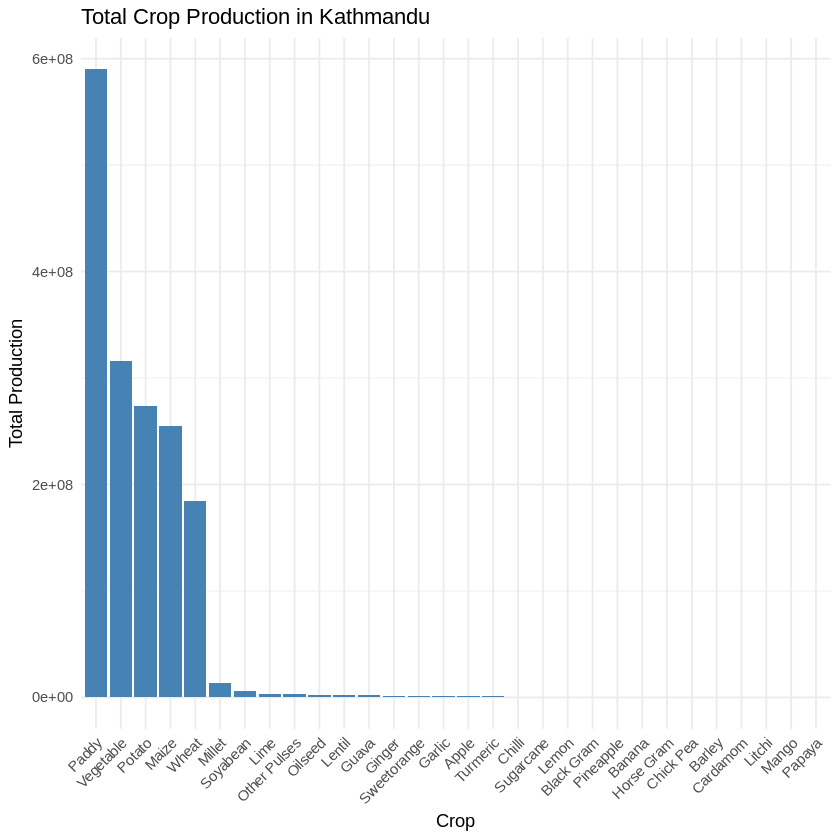

In [ ]:
# Filter for Kathmandu district
kathmandu_data <- subset(merged_data, District == "Kathmandu")

# Summarize total production by crop
crop_production_kathmandu <- aggregate(Production ~ Crop, data = kathmandu_data, sum, na.rm = TRUE)

# Sort by descending production
crop_production_kathmandu <- crop_production_kathmandu[order(-crop_production_kathmandu$Production), ]

# Plot the top crops
ggplot(crop_production_kathmandu, aes(x = reorder(Crop, -Production), y = Production)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Total Crop Production in Kathmandu", x = "Crop", y = "Total Production") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

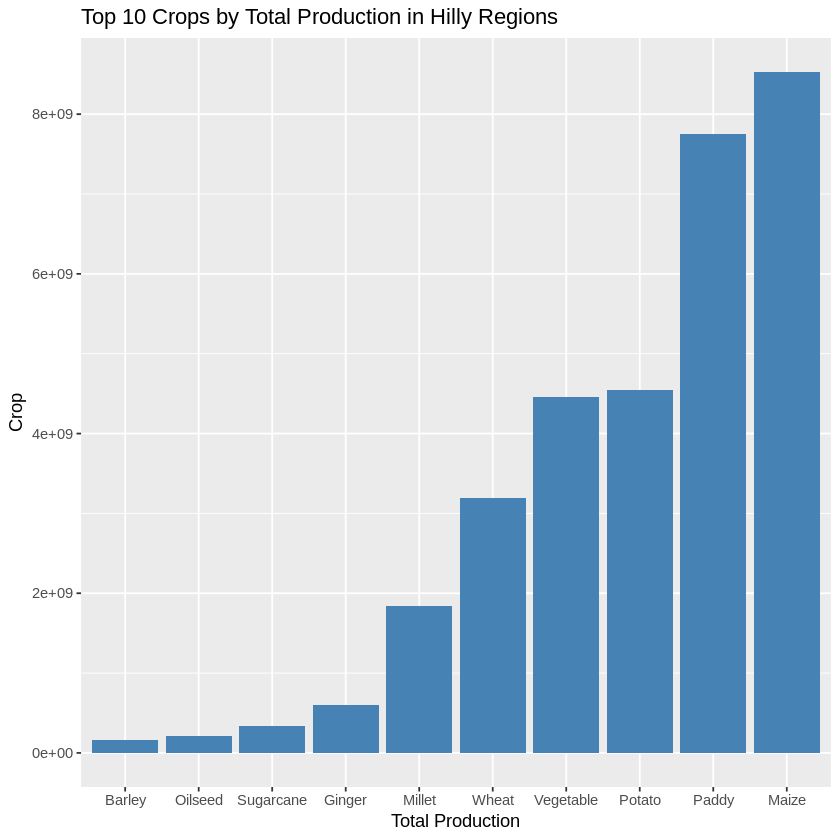

In [ ]:
top_crops <- merged_data %>%
  group_by(Crop) %>%
  summarise(Total_Production = sum(Production, na.rm = TRUE)) %>%
  arrange(desc(Total_Production))

ggplot(head(top_crops, 10), aes(x = Total_Production,y = reorder(Crop, Total_Production) )) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Top 10 Crops by Total Production in Hilly Regions",
       x = "Crop",
       y = "Total Production")

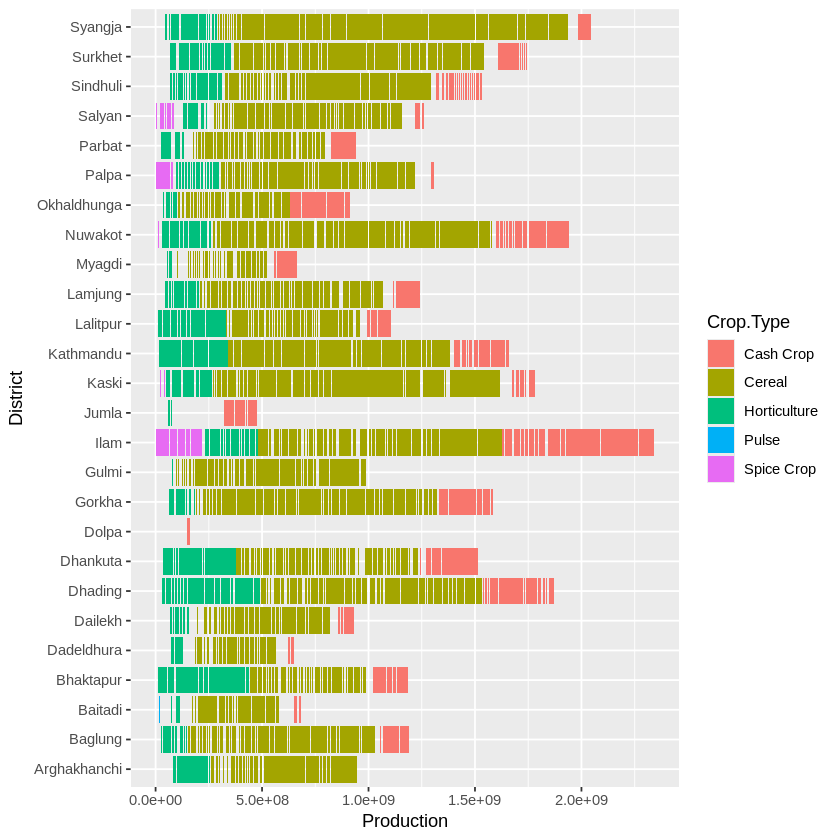

In [ ]:
ggplot(merged_data, aes(x = District, y = Production, fill = Crop.Type)) +
  geom_bar(stat = "identity", position = "stack") +
  coord_flip()

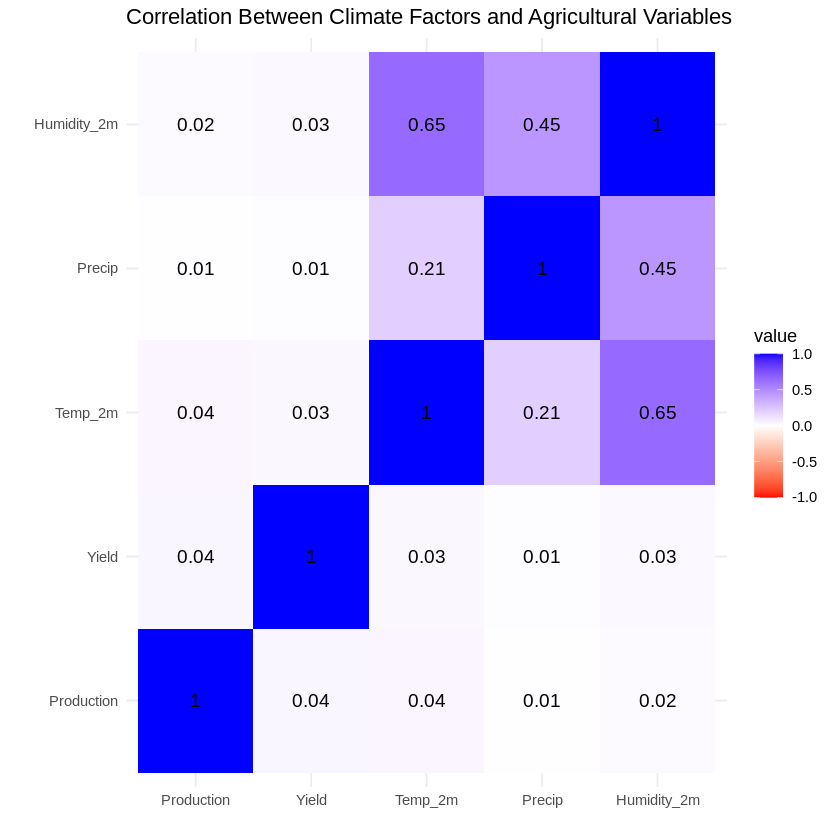

In [ ]:
# Select relevant numeric columns
climate_agri_corr <- merged_data %>%
  select(Production, Yield, Temp_2m, Precip, Humidity_2m)

# Compute correlation matrix
cor_matrix <- cor(climate_agri_corr, use = "complete.obs")

# Convert to long format for ggplot
library(reshape2)
cor_long <- melt(cor_matrix)

# Heatmap plot
ggplot(cor_long, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "red", high = "blue", mid = "white",
                       midpoint = 0, limit = c(-1,1), space = "Lab") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 4) +
  labs(title = "Correlation Between Climate Factors and Agricultural Variables",
       x = "", y = "") +
  theme_minimal()


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


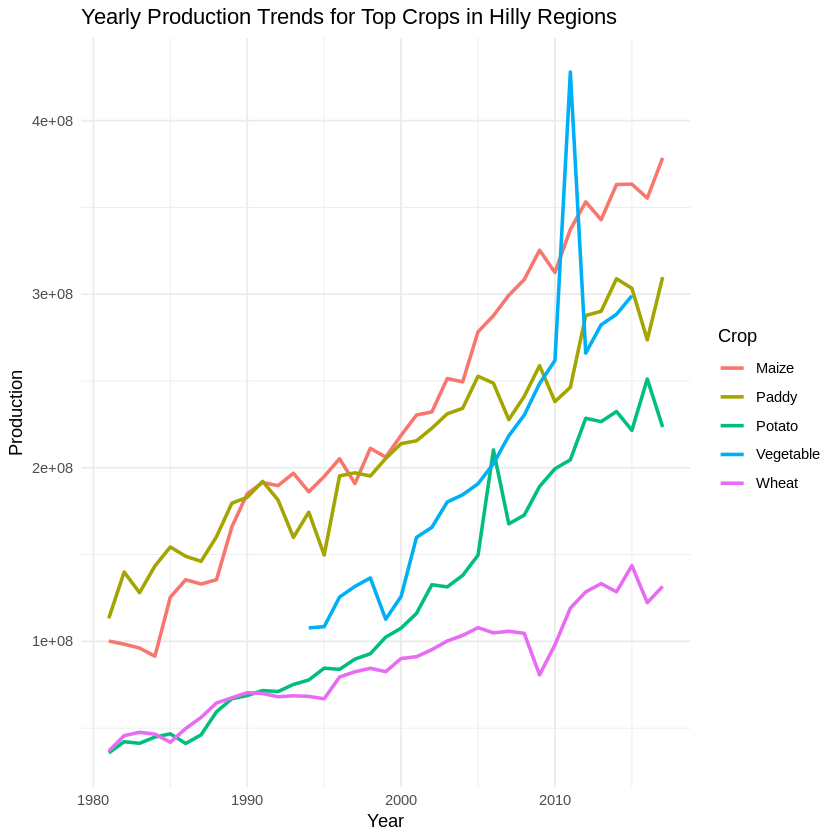

In [ ]:
# Summarize yearly production for top crops
top_crops_list <- head(top_crops$Crop, 5)  # top 5 crops

yearly_trends <- merged_data %>%
  filter(Crop %in% top_crops_list) %>%
  group_by(Year, Crop) %>%
  summarise(Yearly_Production = sum(Production, na.rm = TRUE))

# Plot
ggplot(yearly_trends, aes(x = Year, y = Yearly_Production, color = Crop)) +
  geom_line(linewidth = 1) +
  labs(title = "Yearly Production Trends for Top Crops in Hilly Regions",
       x = "Year",
       y = "Production") +
  theme_minimal()


In [ ]:
top_crops_list <- head(top_crops$Crop, 5)
top_crops_data <- merged_data %>%
  filter(Crop %in% top_crops_list)


In [ ]:
colnames(merged_data)

[1] "District"           "Year"               "Crop"              
 [4] "Crop.Type"          "Province"           "Production"        
 [7] "Yield"              "Date"               "Latitude"          
[10] "Longitude"          "Precip"             "Pressure"          
[13] "Humidity_2m"        "RH_2m"              "Temp_2m"           
[16] "WetBulbTemp_2m"     "MaxTemp_2m"         "MinTemp_2m"        
[19] "TempRange_2m"       "EarthSkinTemp"      "WindSpeed_10m"     
[22] "MaxWindSpeed_10m"   "MinWindSpeed_10m"   "WindSpeedRange_10m"
[25] "WindSpeed_50m"      "MaxWindSpeed_50m"   "MinWindSpeed_50m"  
[28] "WindSpeedRange_50m" "Month_Number"       "Month_Label"       
[31] "Season"

In [ ]:
library(dplyr)

aggregated_data <- merged_data %>%
  group_by(District, Year, Crop,Crop.Type) %>%
  summarise(
    avg_temperature = mean(Temp_2m, na.rm = TRUE),
    avg_precip = mean(Precip, na.rm = TRUE),
    avg_humidity = mean(Humidity_2m, na.rm = TRUE),
    avg_pressure = mean(Pressure, na.rm = TRUE),
    avg_wind = mean(WindSpeed_10m, na.rm = TRUE),
    Production = mean(Production, na.rm = TRUE),
    Yield = mean(Yield, na.rm = TRUE)
  ) %>%
  ungroup()


`summarise()` has grouped output by 'District', 'Year', 'Crop'. You can
override using the `.groups` argument.


In [ ]:
head(aggregated_data)

District     Year Crop    Crop.Type avg_temperature avg_precip avg_humidity
1 Arghakhanchi 1981 Barley  Cereal    21.94627        4.076164   10.3809     
2 Arghakhanchi 1981 Maize   Cereal    21.94627        4.076164   10.3809     
3 Arghakhanchi 1981 Millet  Cereal    21.94627        4.076164   10.3809     
4 Arghakhanchi 1981 Oilseed Cash Crop 21.94627        4.076164   10.3809     
5 Arghakhanchi 1981 Paddy   Cereal    21.94627        4.076164   10.3809     
6 Arghakhanchi 1981 Potato  Cash Crop 21.94627        4.076164   10.3809     
  avg_pressure avg_wind Production Yield    
1 93.1274      2.474849   150       500.0000
2 93.1274      2.474849 14230      1609.7285
3 93.1274      2.474849  2100      1166.6667
4 93.1274      2.474849    50       357.1429
5 93.1274      2.474849  4100      2169.3122
6 93.1274      2.474849   490      4900.0000

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.95 loaded



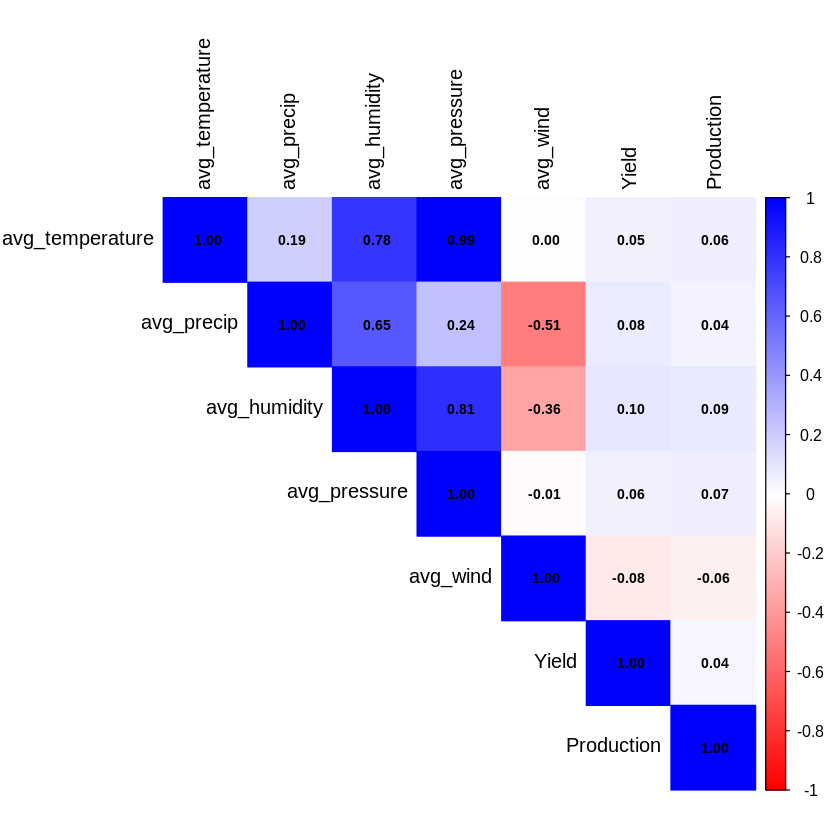

In [ ]:
library(dplyr)
library(corrplot)

# Step 1: Create a clean numeric dataset for correlation
climate_agri_subset <- aggregated_data %>%
  select(avg_temperature, avg_precip, avg_humidity, avg_pressure, avg_wind, Yield, Production)

# Step 2: Compute correlation matrix
cor_matrix <- cor(climate_agri_subset, use = "complete.obs")

# Step 3: Visualize using corrplot
corrplot(cor_matrix, method = "color",
         type = "upper",        # Only upper triangle
         tl.col = "black",      # Text label color
         addCoef.col = "black", # Add correlation values
         number.cex = 0.7,      # Size of numbers
         col = colorRampPalette(c("red", "white", "blue"))(200))


In [ ]:
# List of crops you want to filter
selected_crops <- c("Paddy", "Maize")

# Filter the dataset
merged_data22 <- merged_data2 %>%
  dplyr::filter(Crop %in% selected_crops)

# View the filtered dataset
head(merged_data22)


District     year Crop  Crop.Type Unit           Area.of.Production Measure 
1 Arghakhanchi 1981 Wheat Cereal    Kg Per Hectare 810                1148.148
2 Arghakhanchi 1981 Wheat Cereal    Kg Per Hectare 810                1148.148
3 Arghakhanchi 1981 Wheat Cereal    Kg Per Hectare 810                1148.148
4 Arghakhanchi 1981 Wheat Cereal    Kg Per Hectare 810                1148.148
5 Arghakhanchi 1981 Wheat Cereal    Kg Per Hectare 810                1148.148
6 Arghakhanchi 1981 Wheat Cereal    Kg Per Hectare 810                1148.148
  Production Yield    Date       avg_temperature avg_precip
1 930        1148.148 1981-01-06 13.24           2.41      
2 930        1148.148 1981-04-05 23.63           0.10      
3 930        1148.148 1981-01-05 13.76           1.84      
4 930        1148.148 1981-04-11 26.20           0.39      
5 930        1148.148 1981-04-12 26.03           0.80      
6 930        1148.148 1981-01-08 11.21           1.09

In [ ]:
# Create the yearly paddy dataset
df_paddy_yearly <- merged_data %>%
  filter(Crop == "Paddy") %>%
  group_by(Year) %>%
  summarise(
    total_production = sum(Production, na.rm = TRUE),
    avg_temperature = mean(Temp_2m, na.rm = TRUE),
    avg_precip=mean(Precip,na.rm=TRUE)
  )

In [ ]:
scale_factor <- max(df_paddy_yearly$total_production) / max(df_paddy_yearly$avg_temperature)


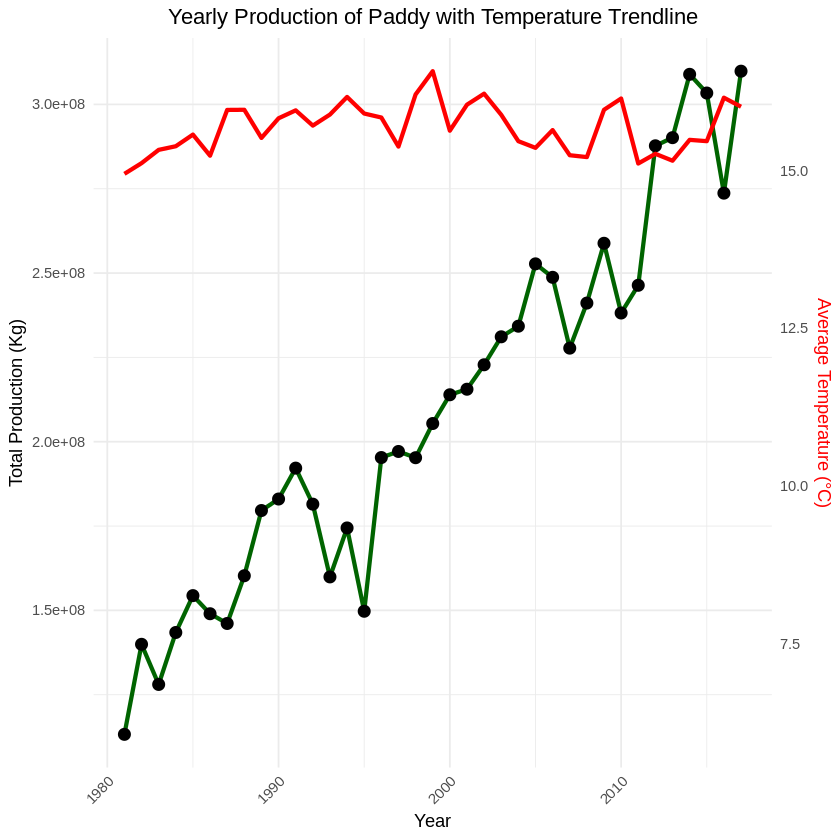

In [ ]:
ggplot(df_paddy_yearly, aes(x = Year)) +
  # Line and points for production
  geom_line(aes(y = total_production), color = "darkgreen", size = 1.2) +
  geom_point(aes(y = total_production), color = "black", size = 3) +

  # Line for temperature trend
  geom_line(aes(y = avg_temperature * scale_factor), color = "red", size = 1.2) +

  # Add second axis for temperature
  scale_y_continuous(
    name = "Total Production (Kg)",
    sec.axis = sec_axis(~ . / scale_factor, name = "Average Temperature (°C)")
  ) +

  # Titles and labels
  labs(
    title = "Yearly Production of Paddy with Temperature Trendline",
    x = "Year"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.y.right = element_text(color = "red"),
    plot.title = element_text(hjust = 0.5)
  )


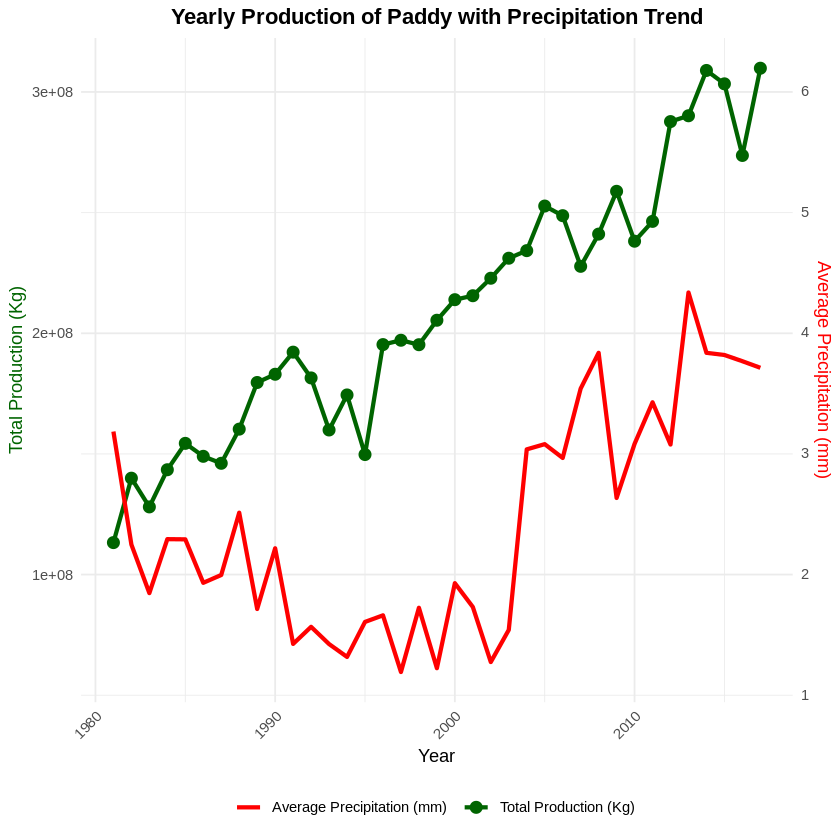

In [ ]:
# Assuming df_paddy_yearly is already created:
df_paddy_yearly <- merged_data %>%
  filter(Crop == "Paddy") %>%
  group_by(Year) %>%
  summarise(
    total_production = sum(Production, na.rm = TRUE),
    avg_temperature = mean(Temp_2m, na.rm = TRUE),
    avg_precip = mean(Precip, na.rm = TRUE)
  )

# Get the max values for dynamic scaling
max_prod_val <- max(df_paddy_yearly$total_production, na.rm = TRUE)
max_precip_val <- max(df_paddy_yearly$avg_precip, na.rm = TRUE)

target_max_proportion <- 0.7

ggplot(df_paddy_yearly, aes(x = Year)) +
  # Line and points for Production
  geom_line(aes(y = total_production, color = "Total Production (Kg)"), linewidth = 1.2) +
  geom_point(aes(y = total_production, color = "Total Production (Kg)"), size = 3) +

  # Line for Precipitation, scaled using the adjusted proportion
  geom_line(aes(y = avg_precip * (target_max_proportion * max_prod_val / max_precip_val),
                color = "Average Precipitation (mm)"), linewidth = 1.2) +

  # Add second axis for Precipitation, using the inverse of the adjusted scaling
  scale_y_continuous(
    name = "Total Production (Kg)",
    sec.axis = sec_axis(~ . * (max_precip_val / (target_max_proportion * max_prod_val)),
                        name = "Average Precipitation (mm)")
  ) +
  # Manually set colors for the lines and define legend labels
  scale_color_manual(
    name = "Variable",
    values = c(
      "Total Production (Kg)" = "darkgreen",
      "Average Precipitation (mm)" = "red"
    )
  ) +

  # Titles and labels
  labs(
    title = "Yearly Production of Paddy with Precipitation Trend",
    x = "Year"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.y.left = element_text(color = "darkgreen"),
    axis.title.y.right = element_text(color = "red"),
    legend.position = "bottom",
    legend.title = element_blank(),
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

In [ ]:
# Calculate the correlation between average temperature and total production
correlation <- cor(merged_data22$avg_precip, merged_data22$Production, use = "complete.obs")
print(paste("Correlation between temperature and production: ", correlation))


[1] "Correlation between temperature and production:  0.284510020811222"


In [ ]:
# Fit a linear regression model
model <- lm(Production ~ avg_precip, data = merged_data22)

# Display the model summary
summary(model)



Call:
lm(formula = Production ~ avg_precip, data = merged_data22)

Residuals:
   Min     1Q Median     3Q    Max 
-25374  -9265  -3716   5528 109344 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5413.7      494.6   10.95   <2e-16 ***
avg_precip    3829.7      186.1   20.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13920 on 4808 degrees of freedom
Multiple R-squared:  0.08095,	Adjusted R-squared:  0.08075 
F-statistic: 423.5 on 1 and 4808 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


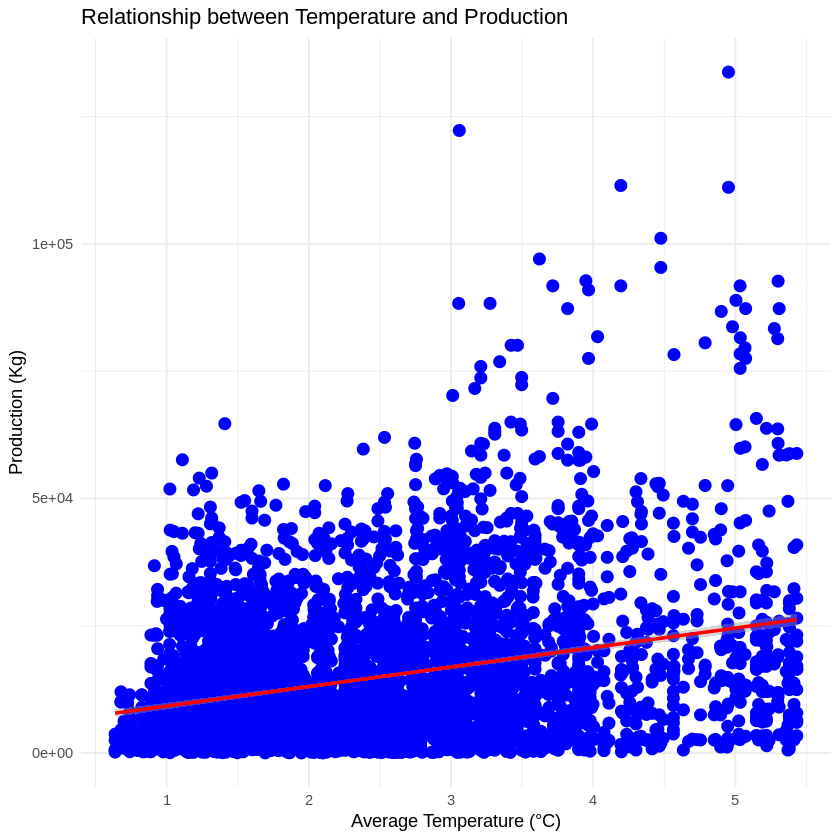

In [ ]:
# Create a scatter plot with a regression line
ggplot(merged_data22, aes(x = avg_precip, y = Production)) +
  geom_point(color = "blue", size = 3) +  # Scatter plot
  geom_smooth(method = "lm", color = "red", size = 1) +  # Regression line
  labs(title = "Relationship between Temperature and Production",
       x = "Average Temperature (°C)",
       y = "Production (Kg)") +
  theme_minimal()


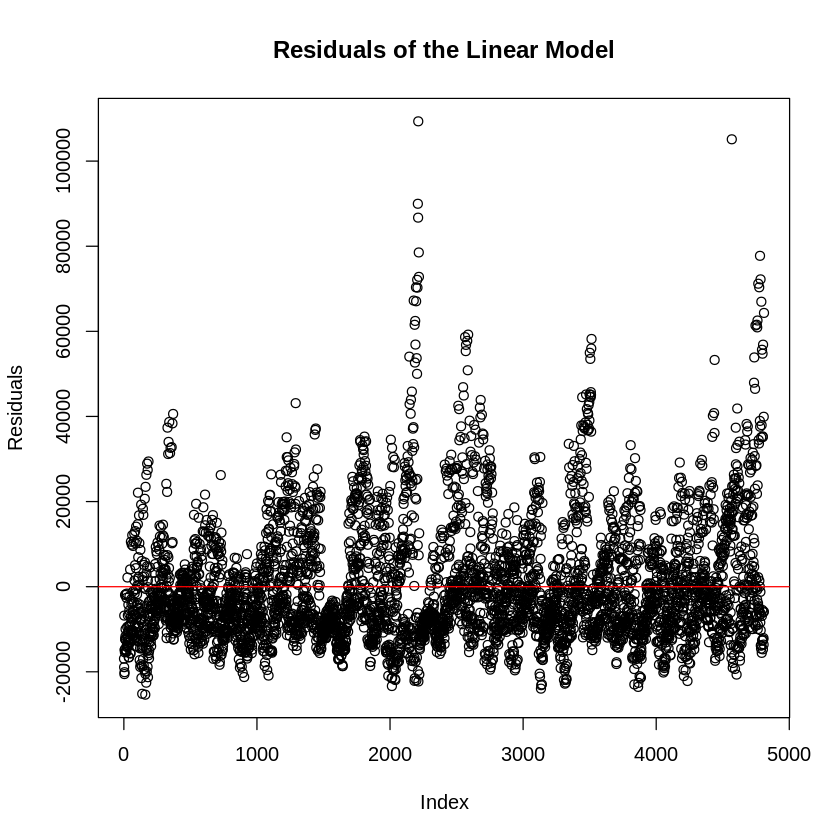

In [ ]:
# Plot residuals
plot(model$residuals, main = "Residuals of the Linear Model", ylab = "Residuals", xlab = "Index")
abline(h = 0, col = "red")


In [ ]:
# Save as CSV
write.csv(merged_data22, file = "new_hilly.csv", row.names = FALSE)

In [ ]:
head(merged_data22)

District     year Crop  Crop.Type Unit           Area.of.Production Measure 
1 Arghakhanchi 1981 Wheat Cereal    Kg Per Hectare 810                1148.148
2 Arghakhanchi 1981 Wheat Cereal    Kg Per Hectare 810                1148.148
3 Arghakhanchi 1981 Wheat Cereal    Kg Per Hectare 810                1148.148
4 Arghakhanchi 1981 Wheat Cereal    Kg Per Hectare 810                1148.148
5 Arghakhanchi 1981 Wheat Cereal    Kg Per Hectare 810                1148.148
6 Arghakhanchi 1981 Wheat Cereal    Kg Per Hectare 810                1148.148
  Production Yield    Date       avg_temperature avg_precip
1 930        1148.148 1981-01-06 13.24           2.41      
2 930        1148.148 1981-04-05 23.63           0.10      
3 930        1148.148 1981-01-05 13.76           1.84      
4 930        1148.148 1981-04-11 26.20           0.39      
5 930        1148.148 1981-04-12 26.03           0.80      
6 930        1148.148 1981-01-08 11.21           1.09

In [ ]:
df_yearly <- merged_data22 %>%
  group_by(year,Crop) %>%
  summarise(
    avg_temp = mean(avg_temperature, na.rm = TRUE),
    Avg_Precip = mean(avg_precip, na.rm = TRUE),
    avg_production= mean(Production,na.rm= TRUE),


  )



`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


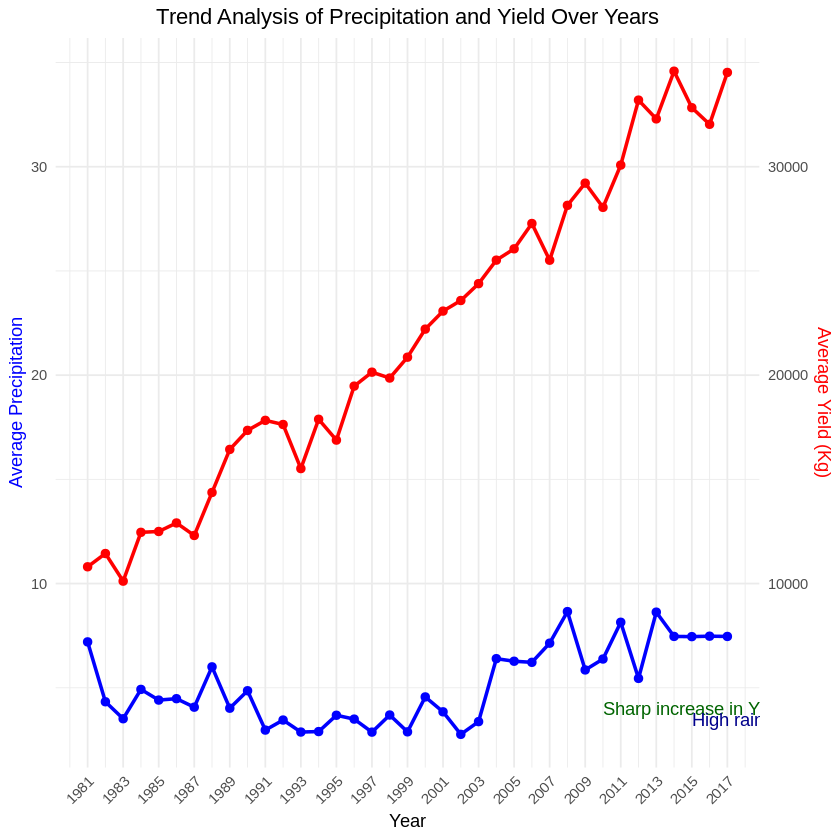

In [ ]:
ggplot(df_yearly, aes(x = as.numeric(year))) +

   # Line plot for average temperature
  geom_line(aes(y = Avg_Precip), color = "blue", size = 1, linetype = "solid") +

  geom_point(aes(y = Avg_Precip), color = "blue", size = 2) +
  # Line plot for average production (scaled)
  geom_line(aes(y = avg_production / 1000), color = "red", size = 1, linetype = "solid") +
  geom_point(aes(y = avg_production / 1000), color = "red", size = 2) +

 # Add annotations for key trends
  annotate("text", x = 2010, y = 4, label = "Sharp increase in Yield",
           color = "darkgreen", hjust = 0) +
  annotate("text", x = 2015, y = 3.5, label = "High rainfall years",
           color = "darkblue", hjust = 0) +

  # Primary axis for temperature
  labs(
    title = "Trend Analysis of Precipitation and Yield Over Years",
    x = "Year",
    y = "Average Precipitation"
  ) +
  # Secondary axis for production (adjust scaling factor here)
  scale_y_continuous(
    sec.axis = sec_axis(~ . * 1000, name = "Average Yield (Kg)")
  ) +
  # Customizing x-axis intervals
  scale_x_continuous(
    breaks = seq(min(df_yearly$year), max(df_yearly$year), by = 2)
  ) +
  # Theme adjustments
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.y.right = element_text(color = "red"),
    axis.title.y.left = element_text(color = "blue"),
    plot.title = element_text(hjust = 0.5)
  )


In [ ]:
head(df_yearly)

year avg_temp Avg_Precip avg_production
1 1981 20.83555 7.200664   10804.75      
2 1982 21.33349 4.327964   11441.31      
3 1983 21.71177 3.513542   10115.56      
4 1984 21.25880 4.921476   12457.79      
5 1985 21.41871 4.408795   12498.39      
6 1986 20.92596 4.475677   12907.17

In [ ]:
# Filter the data for Potato crop and then group by year and crop
df_potato <- merged_data22 %>%

  dplyr::group_by(year, Crop) %>%
  dplyr::summarise(
    avg_temp = mean(avg_temperature, na.rm = TRUE),
    Avg_Precip = mean(avg_precip, na.rm = TRUE),
    avg_production = mean(Production, na.rm = TRUE)
  )





`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


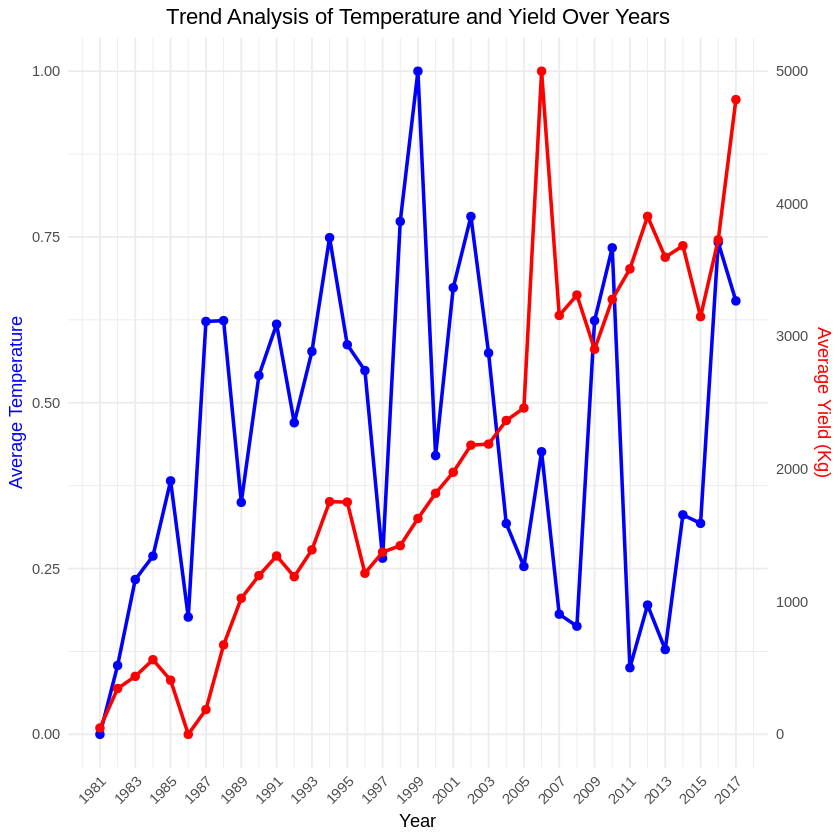

In [ ]:
ggplot(df_potato_scaled, aes(x = as.numeric(year))) +

   # Line plot for average temperature
  geom_line(aes(y = (avg_temp - min(avg_temp)) / (max(avg_temp) - min(avg_temp))), color = "blue", size = 1, linetype = "solid") +

  geom_point(aes(y =(avg_temp - min(avg_temp)) / (max(avg_temp) - min(avg_temp))), color = "blue", size = 2) +
  # Line plot for average production (scaled)
  geom_line(aes(y = (avg_production - min(avg_production)) / (max(avg_production) - min(avg_production))), color = "red", size = 1, linetype = "solid") +
  geom_point(aes(y = (avg_production - min(avg_production)) / (max(avg_production) - min(avg_production))), color = "red", size = 2) +
  # Primary axis for temperature
  labs(
    title = "Trend Analysis of Temperature and Yield Over Years",
    x = "Year",
    y = "Average Temperature"
  ) +
  # Secondary axis for production (adjust scaling factor here)
  scale_y_continuous(
    sec.axis = sec_axis(~ . * 5000, name = "Average Yield (Kg)")
  ) +
  # Customizing x-axis intervals
  scale_x_continuous(
    breaks = seq(min(df_yearly$year), max(df_yearly$year), by = 2)
  ) +
  # Theme adjustments
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.y.right = element_text(color = "red"),
    axis.title.y.left = element_text(color = "blue"),
    plot.title = element_text(hjust = 0.5)
  )


In [ ]:
# Find the year with maximum production
max_production_year <- df_potato %>%
 dplyr::filter(avg_production == max(avg_production, na.rm = TRUE))

max_production_year


In [ ]:
# Find the year with maximum temperature
max_temp_year <- df_potato %>%
  dplyr::filter(avg_temp == max(avg_temp, na.rm = TRUE))

max_temp_year


In [ ]:
top_5_districts <- df_potato %>%

  reframe(avg_temp,avg_production) %>%
  arrange(desc(avg_production)) %>%
  slice_head(n = 5)

print(top_5_districts)

# A tibble: 5 × 3
   year avg_temp avg_production
  <int>    <dbl>          <dbl>
1  2016     16.2         26392.
2  2014     15.5         24492.
3  2012     15.3         24015.
4  2013     15.2         23875.
5  2017     16.0         23549.


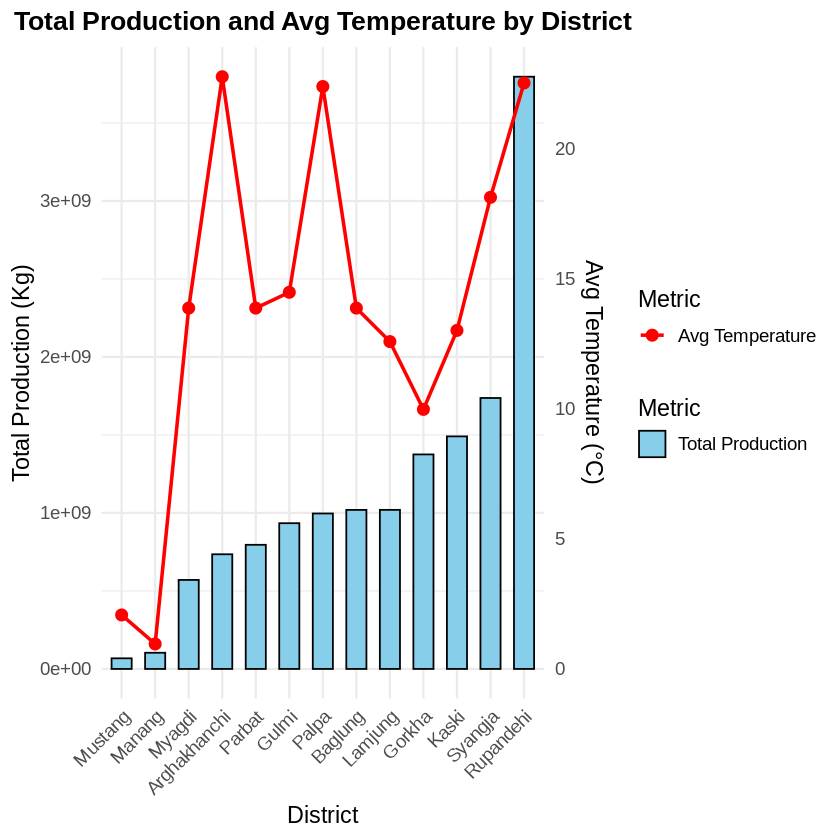

In [ ]:


# Aggregate data by district and include Area of Production
district_summary <- merged_data22 %>%
  group_by(District) %>%
  summarize(
    Total_Production = sum(Production, na.rm = TRUE),
    Avg_Temperature = mean(avg_temperature, na.rm = TRUE),
    Avg_Precip = mean(avg_precip, na.rm = TRUE),
    Total_Area_Production = sum(Area.of.Production, na.rm = TRUE)  # Added area of production
  )


# Determine scaling factor to align Avg_Temperature with Total_Production
scaling_factor <- max(district_summary$Total_Production) / max(district_summary$Avg_Temperature)

# Create the chart
ggplot(district_summary, aes(x = reorder(District, Total_Production))) +
  # Bar plot for total production
  geom_bar(aes(y = Total_Production, fill = "Total Production"), stat = "identity", color = "black", width = 0.6) +
  # Line and points for average temperature (scaled)
  geom_point(aes(y = Avg_Temperature * scaling_factor, color = "Avg Temperature"), size = 3) +
  geom_line(aes(y = Avg_Temperature * scaling_factor, group = 1, color = "Avg Temperature"), size = 1) +
  # Custom y-axis scales
  scale_y_continuous(
    name = "Total Production (Kg)",
    sec.axis = sec_axis(~ . / scaling_factor, name = "Avg Temperature (°C)")
  ) +
  # Color and fill settings
  scale_fill_manual(values = c("Total Production" = "skyblue")) +
  scale_color_manual(values = c("Avg Temperature" = "red")) +
  # Labels and title
  labs(
    title = "Total Production and Avg Temperature by District",
    x = "District",
    fill = "Metric",
    color = "Metric"
  ) +
  # Theme adjustments
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )



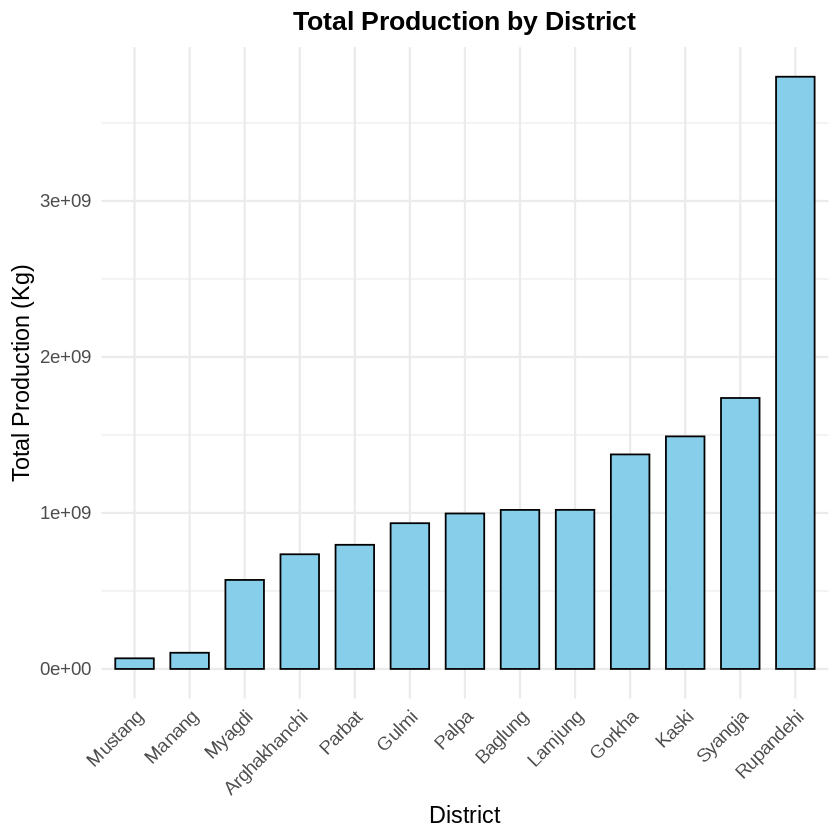

In [ ]:
# Bar chart for Total Production by District
ggplot(district_summary, aes(x = reorder(District, Total_Production), y = Total_Production)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black", width = 0.7) +
  labs(
    title = "Total Production by District",
    x = "District",
    y = "Total Production (Kg)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )


In [ ]:
ggplot(district_summary, aes(x = Avg_Temperature, y = Total_Production)) +
  geom_point(aes(color = District), size = 4) +
  geom_smooth(method = "lm", color = "red", linetype = "dashed", se= FALSE) +
  labs(
    title = "Temperature vs. Total Production",
    x = "Average Temperature (°C)",
    y = "Total Production (Kg)",
    subtitle = "How temperature influences crop production"
  ) +
  theme_minimal(base_size = 14)


ERROR: Error: object 'district_summary' not found


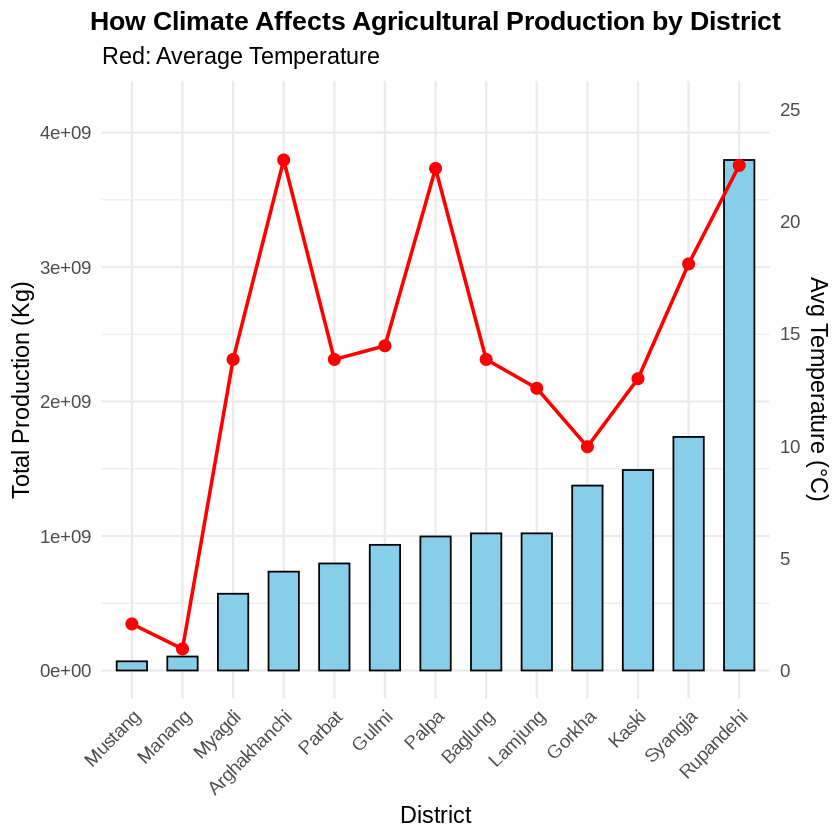

In [ ]:
scaling_factor_temp <- max(district_summary$Total_Production) / max(district_summary$Avg_Temperature)
scaling_factor_precip <- max(district_summary$Total_Production) / max(district_summary$Avg_Precip)

ggplot(district_summary, aes(x = reorder(District, Total_Production))) +
  geom_bar(aes(y = Total_Production), stat = "identity", fill = "skyblue", color = "black", width = 0.6) +
  geom_point(aes(y = Avg_Temperature * scaling_factor_temp), color = "red", size = 3) +
  geom_line(aes(y = Avg_Temperature * scaling_factor_temp, group = 1), color = "red", size = 1) +

  scale_y_continuous(
    name = "Total Production (Kg)",
    sec.axis = sec_axis(~ . / scaling_factor_temp, name = "Avg Temperature (°C)"),
    limits = c(0, max(district_summary$Total_Production) * 1.1)
  ) +
  labs(
    title = "How Climate Affects Agricultural Production by District",
    x = "District",
    subtitle = "Red: Average Temperature"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )


In [ ]:
scaling_factor_temp <- max(district_summary$Total_Production) / max(district_summary$Avg_Temperature)
scaling_factor_precip <- max(district_summary$Total_Production) / max(district_summary$Avg_Precip)


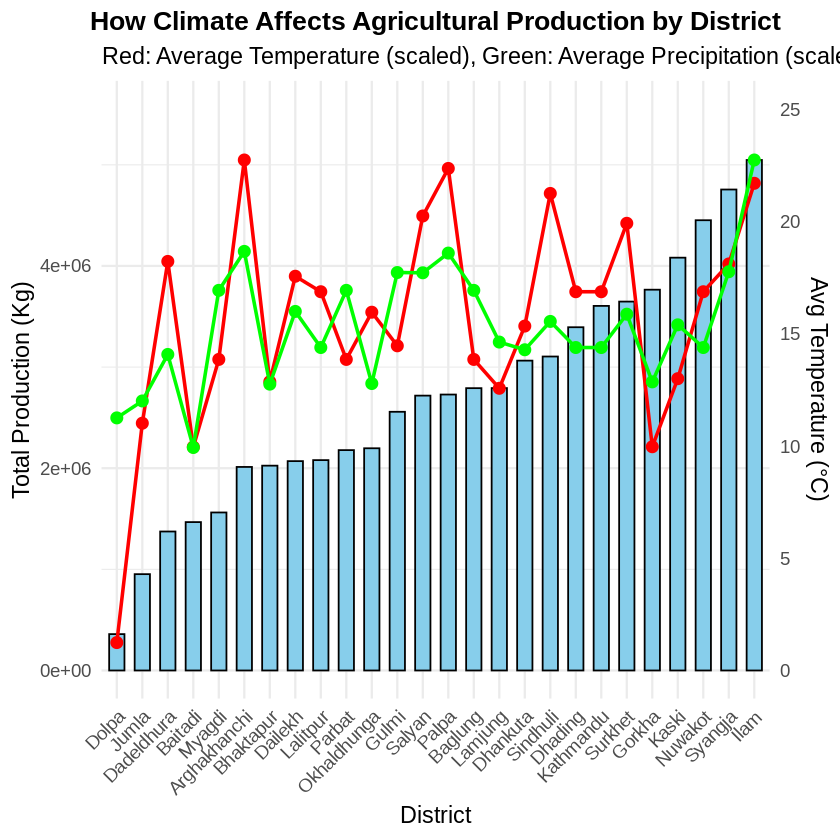

In [ ]:
ggplot(district_summary, aes(x = reorder(District, Total_Production))) +
  # Bar plot for Total Production
  geom_bar(aes(y = Total_Production), stat = "identity", fill = "skyblue", color = "black", width = 0.6) +

  # Line plot for Temperature (scaled)
  geom_point(aes(y = Avg_Temperature * scaling_factor_temp), color = "red", size = 3) +
  geom_line(aes(y = Avg_Temperature * scaling_factor_temp, group = 1), color = "red", size = 1) +

  # Line plot for Precipitation (scaled)
  geom_point(aes(y = Avg_Precip * scaling_factor_precip), color = "green", size = 3) +
  geom_line(aes(y = Avg_Precip * scaling_factor_precip, group = 1), color = "green", size = 1) +

  # Secondary y-axis for temperature
  scale_y_continuous(
    name = "Total Production (Kg)",
    sec.axis = sec_axis(~ . / scaling_factor_temp, name = "Avg Temperature (°C)"),
    limits = c(0, max(district_summary$Total_Production) * 1.1)
  ) +

  # Labels and title
  labs(
    title = "How Climate Affects Agricultural Production by District",
    x = "District",
    subtitle = "Red: Average Temperature (scaled), Green: Average Precipitation (scaled)"
  ) +

  # Customize theme
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )


In [ ]:
head(district_summary)

District     Total_Production Avg_Temperature Avg_Precip
1 Arghakhanchi 2012575          22.745708       2.955325  
2 Baglung      2791516          13.859158       2.680570  
3 Baitadi      1467197           9.958663       1.572552  
4 Bhaktapur    2025209          12.867655       2.019146  
5 Dadeldhura   1374120          18.226373       2.228610  
6 Dailekh      2070039          17.565922       2.532012

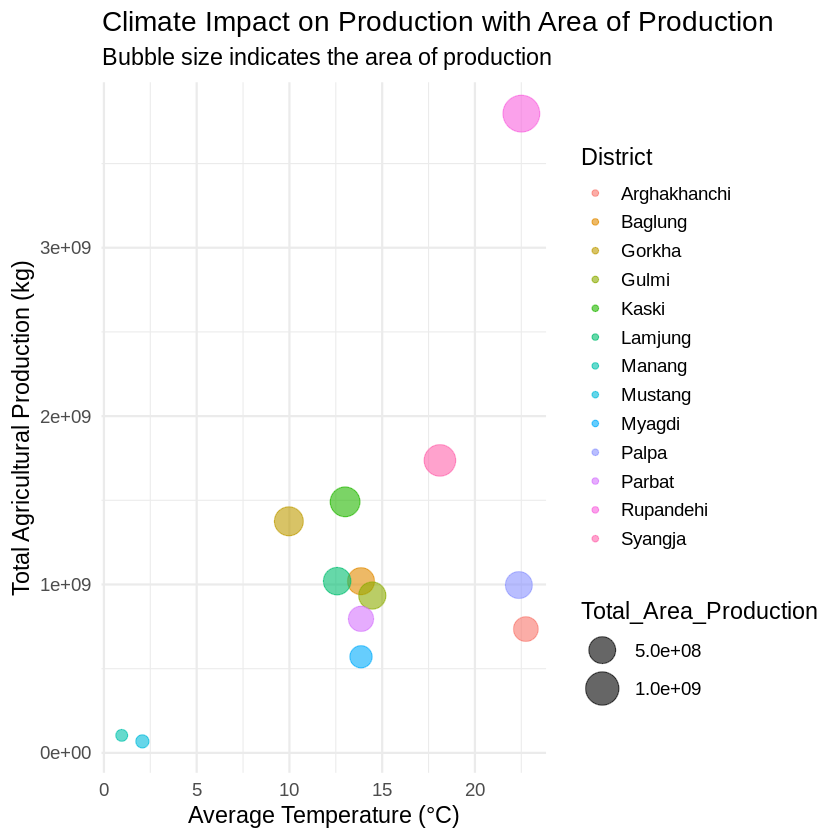

In [ ]:
ggplot(district_summary, aes(x = Avg_Temperature, y = Total_Production, size = Total_Area_Production)) +
  geom_point(aes(color = District), alpha = 0.6) +
  scale_size_continuous(range = c(3, 10)) +
  labs(
    title = "Climate Impact on Production with Area of Production",
    x = "Average Temperature (°C)",
    y = "Total Agricultural Production (kg)",
    subtitle = "Bubble size indicates the area of production"
  ) +
  theme_minimal(base_size = 14)


In [ ]:
head(district_summary)

District     Total_Production Avg_Temperature Avg_Precip
1 Arghakhanchi  735093853       22.745642       2.955543  
2 Baglung      1019602544       13.859140       2.680801  
3 Gorkha       1375197093        9.969316       2.035400  
4 Gulmi         934298196       14.466728       2.806540  
5 Kaski        1490851805       13.001716       2.437685  
6 Lamjung      1019838993       12.573033       2.316110  
  Total_Area_Production
1 373308462            
2 510562750            
3 641907720            
4 523849522            
5 703644255            
6 542865769

In [ ]:
# Aggregate data by district and include Area of Production
new <- time_based_filter %>%
  group_by(District) %>%
  summarize(

    Avg_Temperature = mean(Temp_2m, na.rm = TRUE),
    Avg_Precip = mean(Precip, na.rm = TRUE),

  )

In [ ]:
# Filter the data for Rupandehi district
rupandehi_data <- merged_data22 %>%
  dplyr::filter(District == "Rupandehi")

# Summarize the total production of each item
# Assuming 'Production' is the variable you're interested in (replace with the actual item columns if needed)
most_produced_item <- rupandehi_data %>%
  group_by(Crop) %>%   # Replace 'Item' with the actual column for the item name
  summarize(Total_Production = sum(Production, na.rm = TRUE)) %>%  # Replace 'Production' with your actual production variable
  arrange(desc(Total_Production))

# View the most produced item
head(most_produced_item)

Crop   Total_Production
1 Paddy  2582624810      
2 Wheat   790517735      
3 Potato  369158301      
4 Maize    52685479      
5 Millet    1496825

#Hilly region precipitation analysis


In [ ]:
# Create a vector of districts to filter
districts_to_filter <- c("Arghakhanchi","Baglung", "Baitadi", "Bhaktapur", "Chitwan",
                         "Dadeldhura", "Dailekh", "Dhading", "Dhankuta",
                          "Gorkha", "Gulmi", "Ilam", "Jumla",
                         "Kabhre", "Kaski", "Kathmandu", "Lalitpur",
                         "Lamjung", "Makwanpur", "Myagdi",
                         "Nuwakot", "Okhaldhunga", "Palpa", "Parbat",
                          "Rukum", "Salyan", "Sindhuli",
                         "Surkhet", "Syangja")

# Filter the dataset to only include these districts
filtered_hilly_data <- subset(df_climate, District %in% districts_to_filter)

In [ ]:
str(filtered_hilly_data)

'data.frame':	398832 obs. of  25 variables:
 $ Date              : Date, format: "1981-01-01" "1981-01-02" ...
 $ District          : chr  "Arghakhanchi" "Arghakhanchi" "Arghakhanchi" "Arghakhanchi" ...
 $ Latitude          : num  27.9 27.9 27.9 27.9 27.9 27.9 27.9 27.9 27.9 27.9 ...
 $ Longitude         : num  83.2 83.2 83.2 83.2 83.2 83.2 83.2 83.2 83.2 83.2 ...
 $ Precip            : num  0 0 0.03 0.02 1.84 2.41 2.2 1.09 0.04 0 ...
 $ Pressure          : num  93.5 93.6 93.5 93.5 93.5 ...
 $ Humidity_2m       : num  4.81 4.94 5.22 5.36 5.84 6.02 6.12 5.12 4.75 4.68 ...
 $ RH_2m             : num  45.4 46.8 47.9 50.8 55.5 ...
 $ Temp_2m           : num  13.9 13.8 14.3 13.8 13.8 ...
 $ WetBulbTemp_2m    : num  2.15 2.54 3.32 3.73 4.93 5.23 5.58 3.02 2.04 1.84 ...
 $ MaxTemp_2m        : num  20.8 20.7 20.7 20.4 19.6 ...
 $ MinTemp_2m        : num  9.94 9.54 10.78 10.02 9.08 ...
 $ TempRange_2m      : num  10.89 11.17 9.93 10.41 10.53 ...
 $ EarthSkinTemp     : num  11.3 11.4 12.2 12.2 1

###Monthly precipitation

In [ ]:
monthly_precip_hilly <- filtered_hilly_data %>%
  group_by(Month_Number, Year = as.numeric(format(Date, "%Y"))) %>%
  summarize(Avg_Precip = mean(Precip, na.rm = TRUE))

`summarise()` has grouped output by 'Month_Number'. You can override using the
`.groups` argument.


In [ ]:
# Calculate the 95th percentile of Precipitation
extreme_threshold <- quantile(filtered_hilly_data$Precip, 0.95, na.rm = TRUE)

# Filter the extreme events
extreme_events_hilly <- filtered_hilly_data %>% filter(Precip > extreme_threshold)
print(extreme_threshold)

  95% 
13.51 


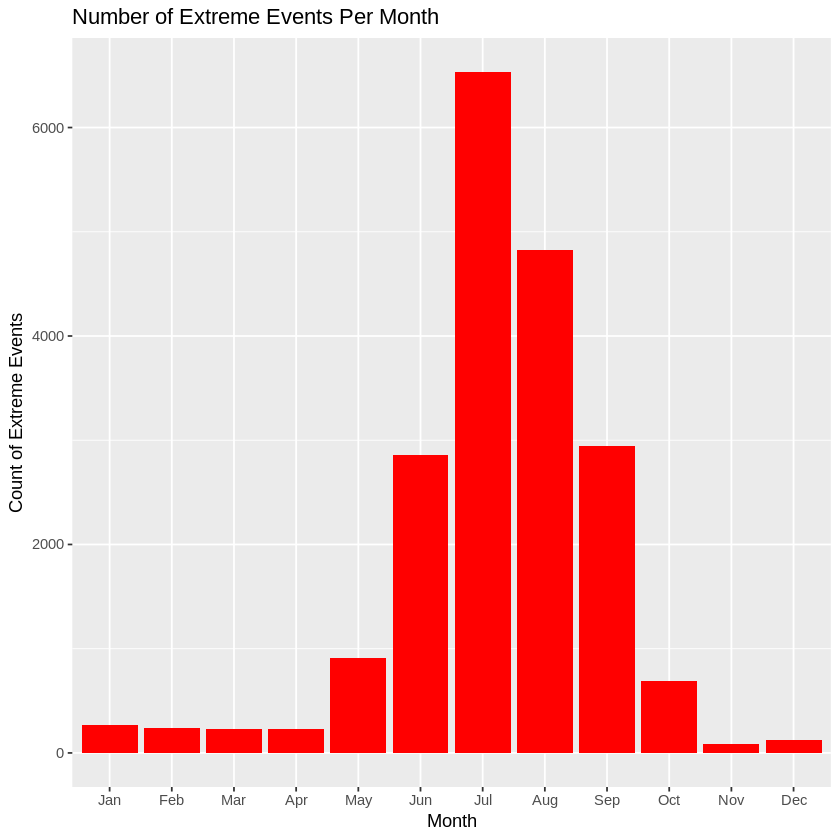

In [ ]:
# Count extreme events per month
monthly_extremes <- extreme_events_hilly %>%
  group_by(Month_Label) %>%
  summarize(Count = n())

# Plot the counts
ggplot(monthly_extremes, aes(x = Month_Label, y = Count)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(title = "Number of Extreme Events Per Month",
       x = "Month", y = "Count of Extreme Events")


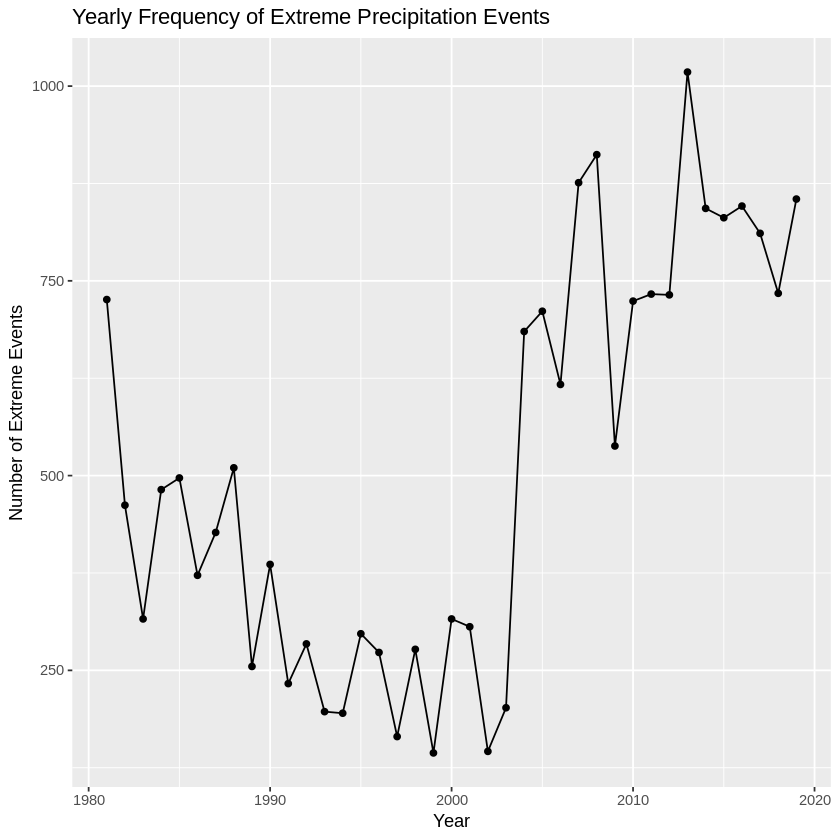

In [ ]:
# Extract year and count extreme events per year
extreme_events_hilly$Year <- format(extreme_events_hilly$Date, "%Y")
yearly_extreme <- extreme_events_hilly %>%
  group_by(Year) %>%
  summarize(Count = n())

# Plot yearly frequency
ggplot(yearly_extreme, aes(x = as.numeric(Year), y = Count)) +
  geom_line() +
  geom_point() +
  labs(title = "Yearly Frequency of Extreme Precipitation Events",
       x = "Year", y = "Number of Extreme Events")


In [ ]:
# Define threshold (e.g., 95th percentile)
extreme_threshold <- quantile(filtered_hilly_data$Precip, 0.95, na.rm = TRUE)

# Create binary target
filtered_hilly_data$ExtremeEvent <- ifelse(filtered_hilly_data$Precip > extreme_threshold, 1, 0)


In [ ]:
library(dplyr)
library(lubridate)

data <- filtered_hilly_data %>%
  mutate(Year = year(Date),
         Month = month(Date),
         Day = day(Date),
         Season = case_when(
           Month %in% c(6:9) ~ "Monsoon",
           Month %in% c(10,11) ~ "PostMonsoon",
           Month %in% c(12,1,2) ~ "Winter",
           TRUE ~ "PreMonsoon"
         )) %>%
  select(Temp_2m, Humidity_2m, Pressure, Month, Season, ExtremeEvent)


In [ ]:
head(data)

Temp_2m Humidity_2m Pressure Month Season ExtremeEvent
1 13.89   4.81        93.51    1     Winter 0           
2 13.84   4.94        93.59    1     Winter 0           
3 14.33   5.22        93.55    1     Winter 0           
4 13.82   5.36        93.49    1     Winter 0           
5 13.76   5.84        93.49    1     Winter 0           
6 13.24   6.02        93.39    1     Winter 0

In [ ]:
 set.seed(123)

index <- createDataPartition(data$ExtremeEvent, p = 0.8, list = FALSE)
train_data <- data[index, ]
test_data <- data[-index, ]


In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(randomForest)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
rf_model <- randomForest(ExtremeEvent ~ ., data = train_data, ntree = 500, importance = TRUE)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


In [ ]:
# Predict on test set
predictions <- predict(rf_model, test_data)

# Confusion matrix
confusionMatrix(predictions, test_data$ExtremeEvent)

# Feature importance
varImpPlot(rf_model)


In [ ]:
str(yearly_extreme)

tibble [39 × 2] (S3: tbl_df/tbl/data.frame)
 $ Year : chr [1:39] "1981" "1982" "1983" "1984" ...
 $ Count: int [1:39] 726 462 316 482 497 372 427 510 255 386 ...


In [ ]:
# Linear regression on yearly extreme event counts
model <- lm(Count ~ as.numeric(Year), data = yearly_extreme)
summary(model)



Call:
lm(formula = Count ~ as.numeric(Year), data = yearly_extreme)

Residuals:
    Min      1Q  Median      3Q     Max 
-393.86 -164.76   49.06  122.23  487.79 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -28216.807   5886.522  -4.793 2.67e-05 ***
as.numeric(Year)     14.364      2.943   4.880 2.04e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.9 on 37 degrees of freedom
Multiple R-squared:  0.3916,	Adjusted R-squared:  0.3752 
F-statistic: 23.82 on 1 and 37 DF,  p-value: 2.04e-05


In [ ]:
# Predict future counts
future_years <- data.frame(Year = 2020:2035)  # Example years
future_counts <- predict(lm(Count ~ as.numeric(Year), data = yearly_extremesh),
                         newdata = future_years)
print(data.frame(future_years, Predicted_Count = future_counts))


   Year Predicted_Count
1  2020        798.4076
2  2021        812.7715
3  2022        827.1355
4  2023        841.4995
5  2024        855.8634
6  2025        870.2274
7  2026        884.5914
8  2027        898.9553
9  2028        913.3193
10 2029        927.6833
11 2030        942.0472
12 2031        956.4112
13 2032        970.7752
14 2033        985.1391
15 2034        999.5031
16 2035       1013.8671


[1] "RMSE for Polynomial Regression: 232.040936798177"


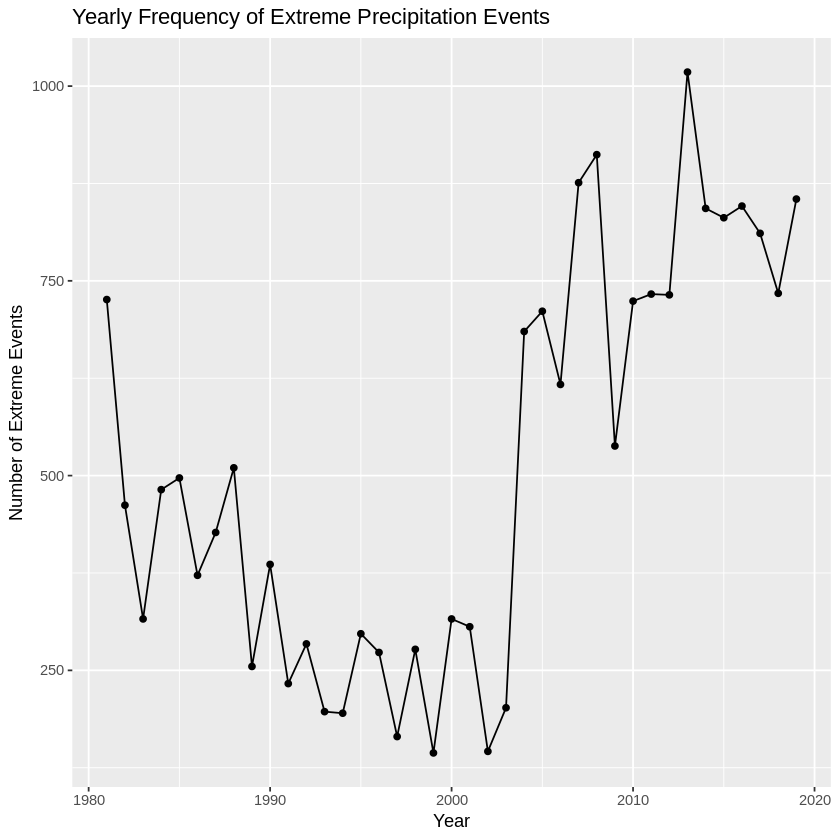

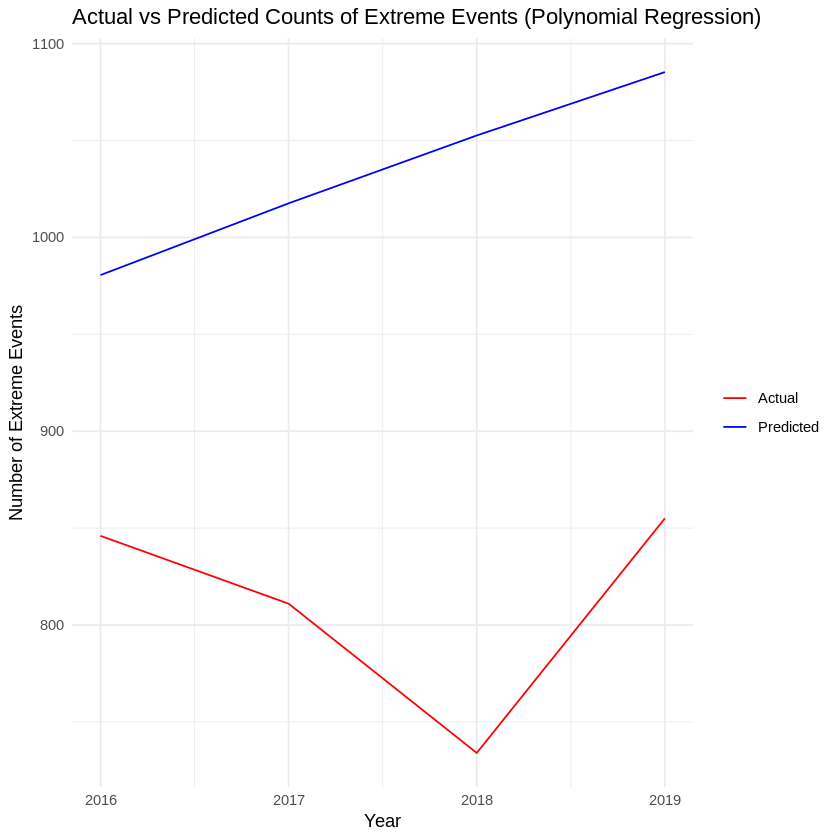

In [ ]:
# Extract year and count extreme events per year
extreme_events_hilly$Year <- format(extreme_events_hilly$Date, "%Y")
yearly_extremesh <- extreme_events_hilly %>%
  group_by(Year) %>%
  summarize(Count = n())

# Plot yearly frequency
ggplot(yearly_extreme, aes(x = as.numeric(Year), y = Count)) +
  geom_line() +
  geom_point() +
  labs(title = "Yearly Frequency of Extreme Precipitation Events",
       x = "Year", y = "Number of Extreme Events")

# Split data into training and test sets
train <- yearly_extreme[as.numeric(yearly_extreme$Year) <= 2015, ]
test <- yearly_extreme[as.numeric(yearly_extreme$Year) > 2015, ]

# Train the polynomial regression model (degree 2 for quadratic)
model_poly <- lm(Count ~ poly(as.numeric(Year), 3), data = train)

# Predict on test set
test$Predicted <- predict(model_poly, newdata = test)

# Calculate RMSE for polynomial model
rmse_poly <- sqrt(mean((test$Count - test$Predicted)^2))
print(paste("RMSE for Polynomial Regression:", rmse_poly))

# Compare predicted vs. actual
ggplot(test, aes(x = as.numeric(Year))) +
  geom_line(aes(y = Count, color = "Actual")) +
  geom_line(aes(y = Predicted, color = "Predicted")) +
  labs(title = "Actual vs Predicted Counts of Extreme Events (Polynomial Regression)",
       x = "Year", y = "Number of Extreme Events") +
  scale_color_manual(values = c("Actual" = "red", "Predicted" = "blue")) +
  theme_minimal() +
  theme(legend.title = element_blank())


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘splines’ is a base package, and should not be updated”
Warning message in bs(as.numeric(Year), degree = 3L, knots = c(2005, 2010), Boundary.knots = c(1981, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”


[1] "RMSE for Spline Regression: 700.969470863377"


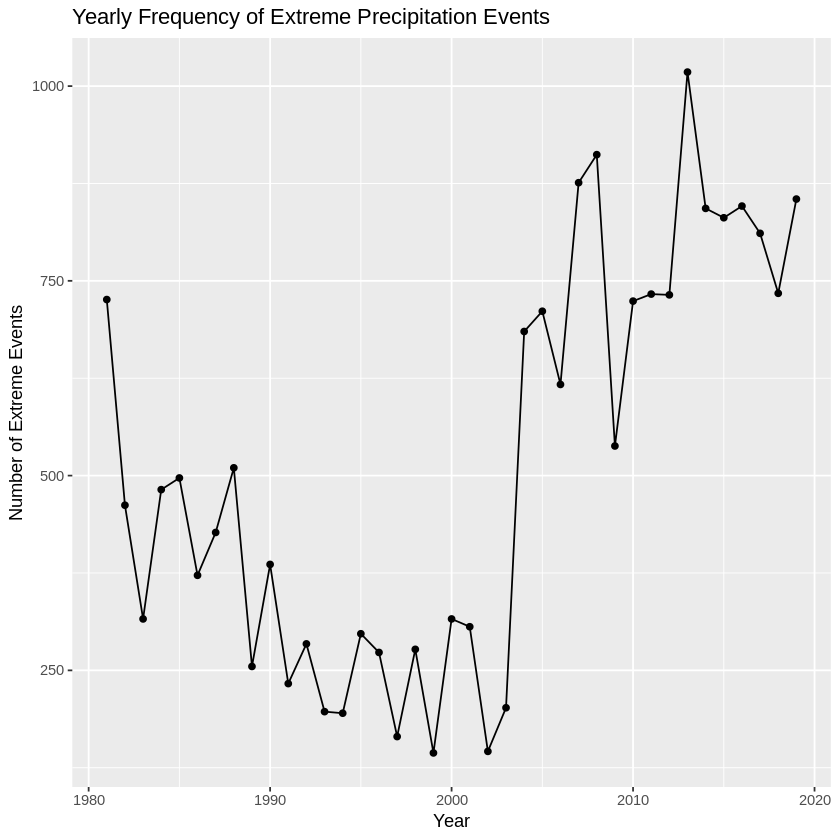

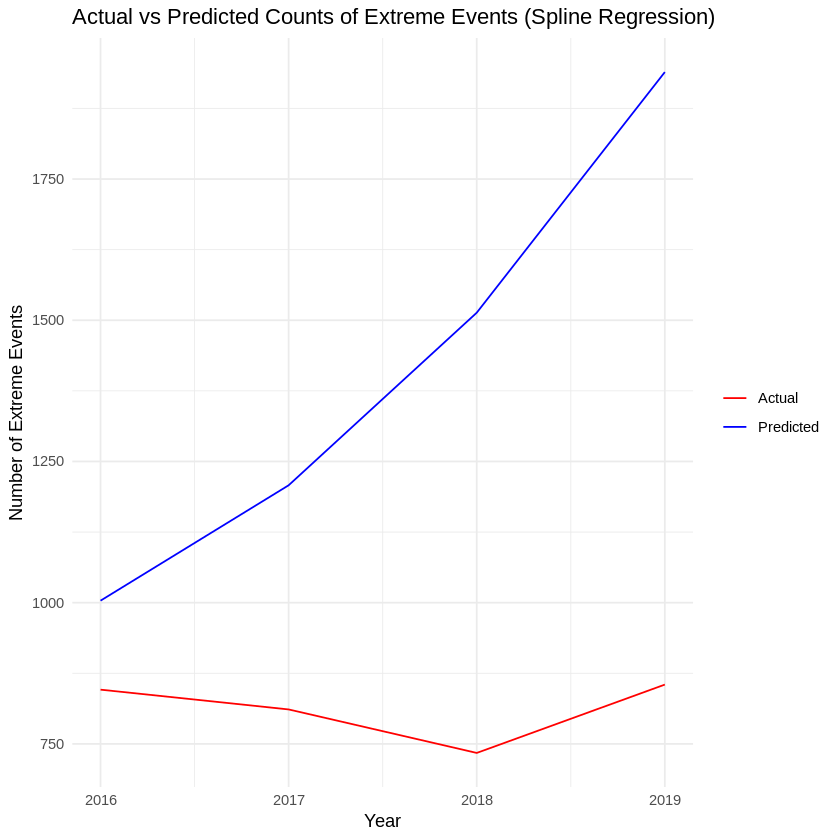

In [ ]:
# Install and load the splines package if not already done
install.packages("splines")
library(splines)

# Extract year and count extreme events per year
extreme_events_hilly$Year <- format(extreme_events_hilly$Date, "%Y")
yearly_extremesh <- extreme_events_hilly %>%
  group_by(Year) %>%
  summarize(Count = n())

# Plot yearly frequency
ggplot(yearly_extreme, aes(x = as.numeric(Year), y = Count)) +
  geom_line() +
  geom_point() +
  labs(title = "Yearly Frequency of Extreme Precipitation Events",
       x = "Year", y = "Number of Extreme Events")

# Split data into training and test sets
train <- yearly_extreme[as.numeric(yearly_extreme$Year) <= 2015, ]
test <- yearly_extreme[as.numeric(yearly_extreme$Year) > 2015, ]

# Train the spline regression model
model_spline <- lm(Count ~ bs(as.numeric(Year), knots = c(2005, 2010)), data = train)

# Predict on test set
test$Predicted <- predict(model_spline, newdata = test)

# Calculate RMSE for spline regression model
rmse_spline <- sqrt(mean((test$Count - test$Predicted)^2))
print(paste("RMSE for Spline Regression:", rmse_spline))

# Compare predicted vs. actual
ggplot(test, aes(x = as.numeric(Year))) +
  geom_line(aes(y = Count, color = "Actual")) +
  geom_line(aes(y = Predicted, color = "Predicted")) +
  labs(title = "Actual vs Predicted Counts of Extreme Events (Spline Regression)",
       x = "Year", y = "Number of Extreme Events") +
  scale_color_manual(values = c("Actual" = "red", "Predicted" = "blue")) +
  theme_minimal() +
  theme(legend.title = element_blank())


In [ ]:
monthly_precip <- filtered_districts_hilly %>%
  filter(Month_Number %in% 6:9) %>%  # Filter for months June to September
  group_by(District ,Month_Number, Year = as.numeric(format(Date, "%Y")), Latitude,Longitude) %>%
  summarize(Avg_Precip = mean(Precip, na.rm = TRUE))

`summarise()` has grouped output by 'District', 'Month_Number', 'Year',
'Latitude'. You can override using the `.groups` argument.


In [ ]:
head(monthly_precip)

District     Month_Number Year Latitude Longitude Avg_Precip
1 Arghakhanchi 6            1981 27.9     83.2      3.692333  
2 Arghakhanchi 6            1982 27.9     83.2      4.624667  
3 Arghakhanchi 6            1983 27.9     83.2      3.027667  
4 Arghakhanchi 6            1984 27.9     83.2      5.738667  
5 Arghakhanchi 6            1985 27.9     83.2      1.801333  
6 Arghakhanchi 6            1986 27.9     83.2      4.171000

In [ ]:
# Calculate 95th percentile for each district
thresholds <- monthly_precip %>%
  group_by(District) %>%
  summarize(Threshold_95 = quantile(Avg_Precip, 0.95, na.rm = TRUE))

# Join the thresholds back with the original data
monthly_precip_with_thresholds <- monthly_precip %>%
  left_join(thresholds, by = "District") %>%
  mutate(Extreme_Event = ifelse(Avg_Precip > Threshold_95, "Extreme", "Normal"))

# View the data with extreme event flag
print(monthly_precip_with_thresholds)


# A tibble: 4,368 × 8
# Groups:   District, Month_Number, Year, Latitude [4,368]
   District     Month_Number  Year Latitude Longitude Avg_Precip Threshold_95
   <chr>               <dbl> <dbl>    <dbl>     <dbl>      <dbl>        <dbl>
 1 Arghakhanchi            6  1981     27.9      83.2      3.69          17.9
 2 Arghakhanchi            6  1982     27.9      83.2      4.62          17.9
 3 Arghakhanchi            6  1983     27.9      83.2      3.03          17.9
 4 Arghakhanchi            6  1984     27.9      83.2      5.74          17.9
 5 Arghakhanchi            6  1985     27.9      83.2      1.80          17.9
 6 Arghakhanchi            6  1986     27.9      83.2      4.17          17.9
 7 Arghakhanchi            6  1987     27.9      83.2      0.408         17.9
 8 Arghakhanchi            6  1988     27.9      83.2      2.92          17.9
 9 Arghakhanchi            6  1989     27.9      83.2      5.83          17.9
10 Arghakhanchi            6  1990     27.9      83.2      5.

In [ ]:
# Filter extreme events for analysis
extreme_events <- monthly_precip_with_thresholds %>%
  filter(Extreme_Event == "Extreme")

# View extreme events
print(extreme_events)


# A tibble: 224 × 8
# Groups:   District, Month_Number, Year, Latitude [224]
   District     Month_Number  Year Latitude Longitude Avg_Precip Threshold_95
   <chr>               <dbl> <dbl>    <dbl>     <dbl>      <dbl>        <dbl>
 1 Arghakhanchi            6  2008     27.9      83.2       18.3         17.9
 2 Arghakhanchi            6  2013     27.9      83.2       20.2         17.9
 3 Arghakhanchi            7  1981     27.9      83.2       20.0         17.9
 4 Arghakhanchi            7  1990     27.9      83.2       19.0         17.9
 5 Arghakhanchi            7  2008     27.9      83.2       19.0         17.9
 6 Arghakhanchi            7  2016     27.9      83.2       20.7         17.9
 7 Arghakhanchi            7  2018     27.9      83.2       19.5         17.9
 8 Arghakhanchi            7  2019     27.9      83.2       17.9         17.9
 9 Baglung                 6  2013     28.3      83.6       15.6         15.2
10 Baglung                 7  2015     28.3      83.6       16.5 

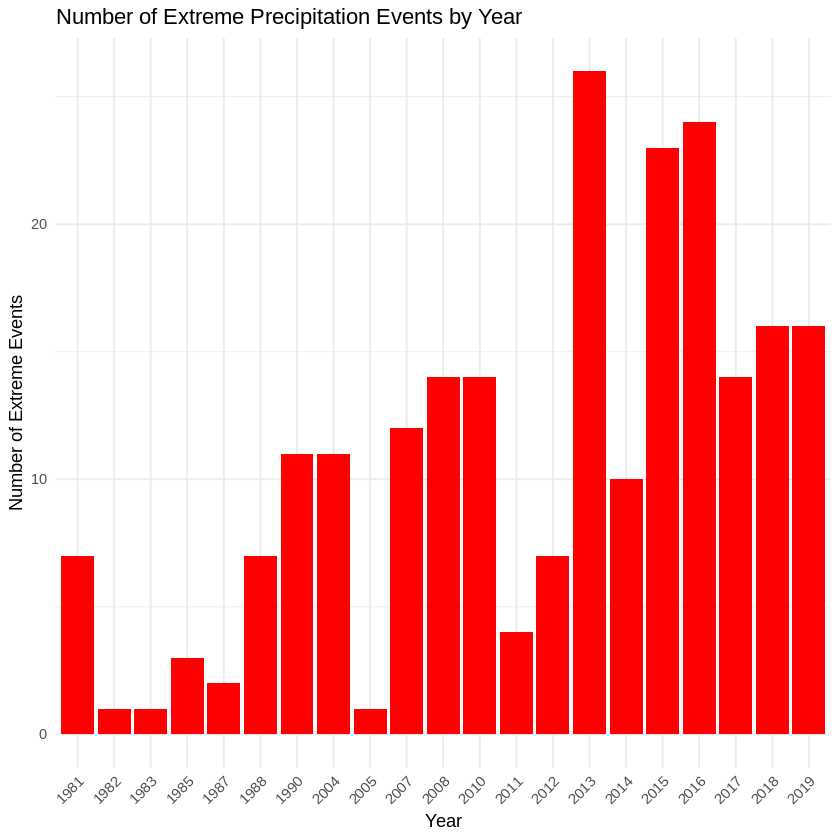

In [ ]:
# Create a bar chart showing the number of extreme events by year
ggplot(extreme_events, aes(x = as.factor(Year))) +
  geom_bar(stat = "count", fill = "red") +
  labs(title = "Number of Extreme Precipitation Events by Year",
       x = "Year",
       y = "Number of Extreme Events") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability


In [ ]:
# Calculate average temperature per district
plot_hilly <- extreme_events %>%
  group_by(District) %>%
  summarise(
  avg_precip= mean(Avg_Precip, na.rm= TRUE),
  Latitude = first(Latitude),
  Longitude = first(Longitude)
)
# Merge temperature data with spatial data
nepal_temp_hilly <- left_join(nepal_districts, plot_hilly , by = "District")

# Plot
ggplot(data = nepal_temp_hilly) +
  geom_sf(aes(fill = avg_precip), color = "black") +  # Fill districts
  geom_text(data = plot_hilly , aes(x = Longitude, y = Latitude, label = District),
            size = 1.5, vjust = 0, color = "black") +
  scale_fill_gradient(low = "skyblue", high = "blue") +  # Color scale
 labs(title = "Precipitation Map of Nepal", fill = "Precipitation") +
  theme_minimal()

# Save the plot with custom size
ggsave("precipitation_map_nepal.png", width = 30, height = 8, units = "in", dpi = 300)

ERROR: Error: object 'nepal_districts' not found


Warning message in layer_sf(geom = GeomSf, data = data, mapping = mapping, stat = stat, :
“Ignoring unknown aesthetics: data”
Warning message:
“Removed 47 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 47 rows containing missing values or values outside the scale range
(`geom_point()`).”


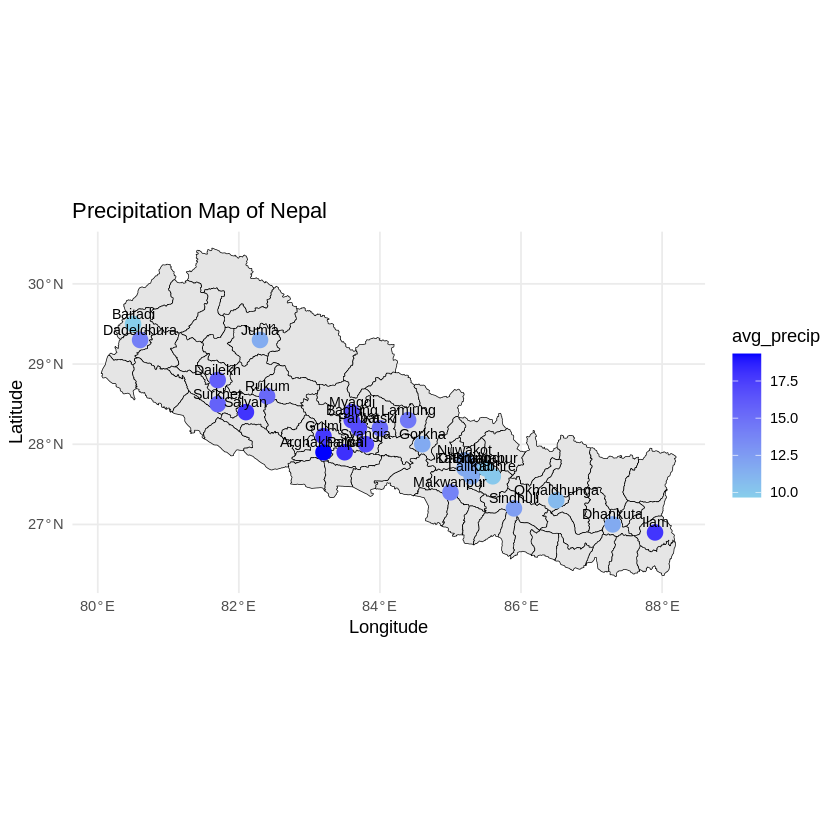

In [ ]:
# Plot
ggplot(data = nepal_temp_hilly) +
  geom_sf(aes(data= avg_precip), color = "black") +  # Fill districts
  geom_point(aes(x = Longitude, y = Latitude, color = avg_precip), size = 4) +  # Points for avg_temp
  geom_text(data = plot_hilly , aes(x = Longitude, y = Latitude, label = District),
            size = 3, vjust = -0.5, color = "black") +
              scale_color_gradient(low = "skyblue", high = "blue") +  # Color scale
 labs(title = "Precipitation Map of Nepal", fill = "Precipitation") +
  theme_minimal()

# Save the plot with custom size
ggsave("precipitation_map_nepal.png", width = 20, height = 12, units = "in", dpi = 400)

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


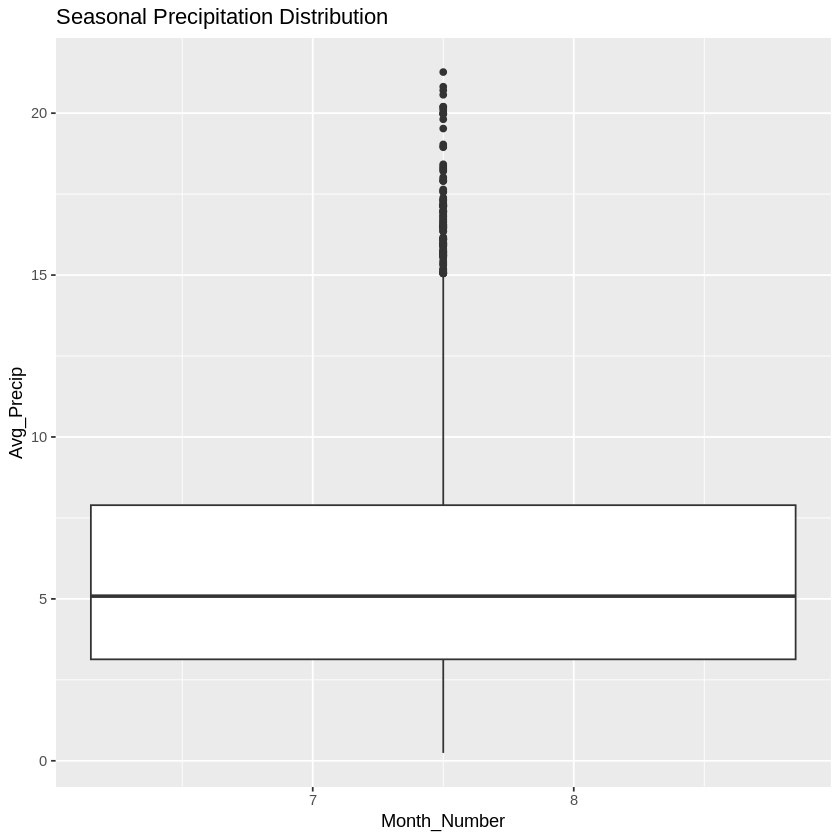

In [ ]:
ggplot(monthly_precip, aes(x = Month_Number, y = Avg_Precip)) +
  geom_boxplot() +
  labs(title = "Seasonal Precipitation Distribution")


In [ ]:
dim(extreme_events)

[1] 224   8

In [ ]:
# Count extreme events by year
extreme_events_by_year <- extreme_events %>%
  group_by(Year) %>%
  summarize(Count = n())

# View the count of extreme events by year
print(extreme_events_by_year)



# A tibble: 21 × 2
    Year Count
   <dbl> <int>
 1  1981     7
 2  1982     1
 3  1983     1
 4  1985     3
 5  1987     2
 6  1988     7
 7  1990    11
 8  2004    11
 9  2005     1
10  2007    12
# ℹ 11 more rows


In [ ]:
# Fit Poisson regression model
poisson_model <- glm(Count ~ Year, data = extreme_events_by_year, family = poisson())

# Summarize the model
summary(poisson_model)



Call:
glm(formula = Count ~ Year, family = poisson(), data = extreme_events_by_year)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -87.293632  13.219876  -6.603 4.02e-11 ***
Year          0.044684   0.006579   6.792 1.10e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 118.235  on 20  degrees of freedom
Residual deviance:  60.399  on 19  degrees of freedom
AIC: 145.5

Number of Fisher Scoring iterations: 5


In [ ]:
# Create a new dataset for prediction
future_years <- data.frame(Year = 2020:2025)

# Predict extreme events for the years 2020 to 2025
predictions <- predict(poisson_model, newdata = future_years, type = "response")

# Combine the years with the predictions
future_predictions <- cbind(future_years, Predicted_Count = predictions)

# View the predicted counts
print(future_predictions)


  Year Predicted_Count
1 2020        19.44514
2 2021        20.33372
3 2022        21.26292
4 2023        22.23457
5 2024        23.25063
6 2025        24.31311


In [ ]:
# Fit a linear regression model
lm_model <- lm(Count ~ Year, data = extreme_events_by_year)

# Summarize the model
summary(lm_model)



Call:
lm(formula = Count ~ Year, data = extreme_events_by_year)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3898  -2.0372  -0.3255   2.0644  11.5729 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -749.8359   186.2833  -4.025 0.000723 ***
Year           0.3797     0.0930   4.083 0.000634 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.695 on 19 degrees of freedom
Multiple R-squared:  0.4673,	Adjusted R-squared:  0.4393 
F-statistic: 16.67 on 1 and 19 DF,  p-value: 0.0006345


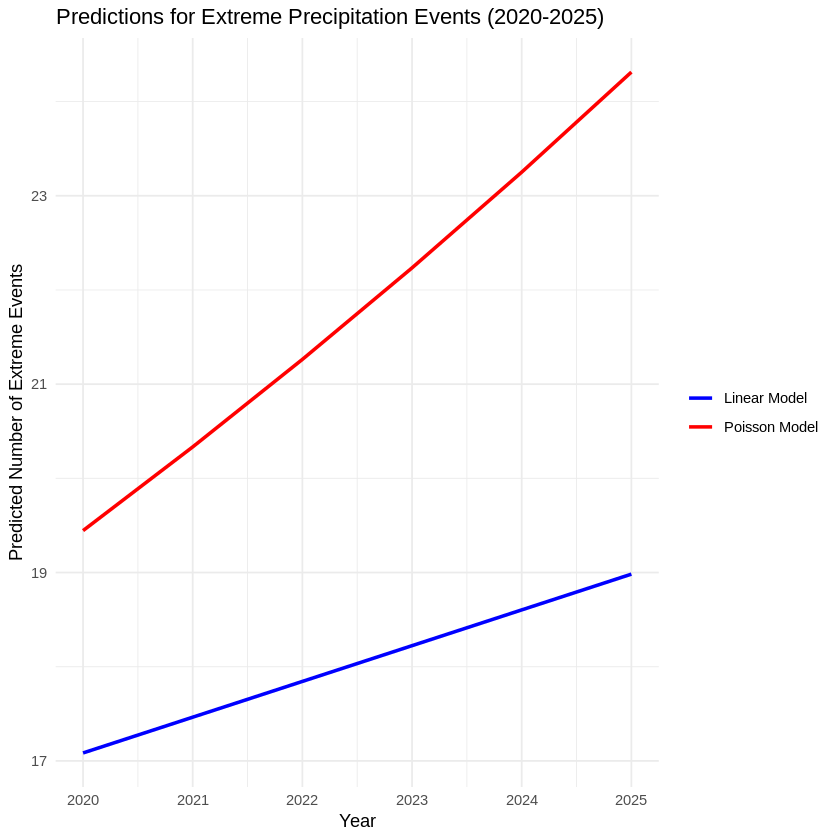

In [ ]:
# Make predictions
lm_predictions <- predict(lm_model, newdata = data.frame(Year = 2020:2025))
poisson_predictions <- predict(poisson_model, newdata = data.frame(Year = 2020:2025), type = "response")

# Combine the predictions into a dataframe
prediction_df <- data.frame(
  Year = 2020:2025,
  LM_Prediction = lm_predictions,
  Poisson_Prediction = poisson_predictions
)

# Plot the predictions
library(ggplot2)

ggplot(prediction_df, aes(x = Year)) +
  geom_line(aes(y = LM_Prediction, color = "Linear Model"), size = 1) +
  geom_line(aes(y = Poisson_Prediction, color = "Poisson Model"), size = 1) +
  labs(title = "Predictions for Extreme Precipitation Events (2020-2025)",
       x = "Year", y = "Predicted Number of Extreme Events") +
  scale_color_manual(values = c("Linear Model" = "blue", "Poisson Model" = "red")) +
  theme_minimal() +
  theme(legend.title = element_blank())  # Remove legend title

`geom_smooth()` using formula = 'y ~ x'


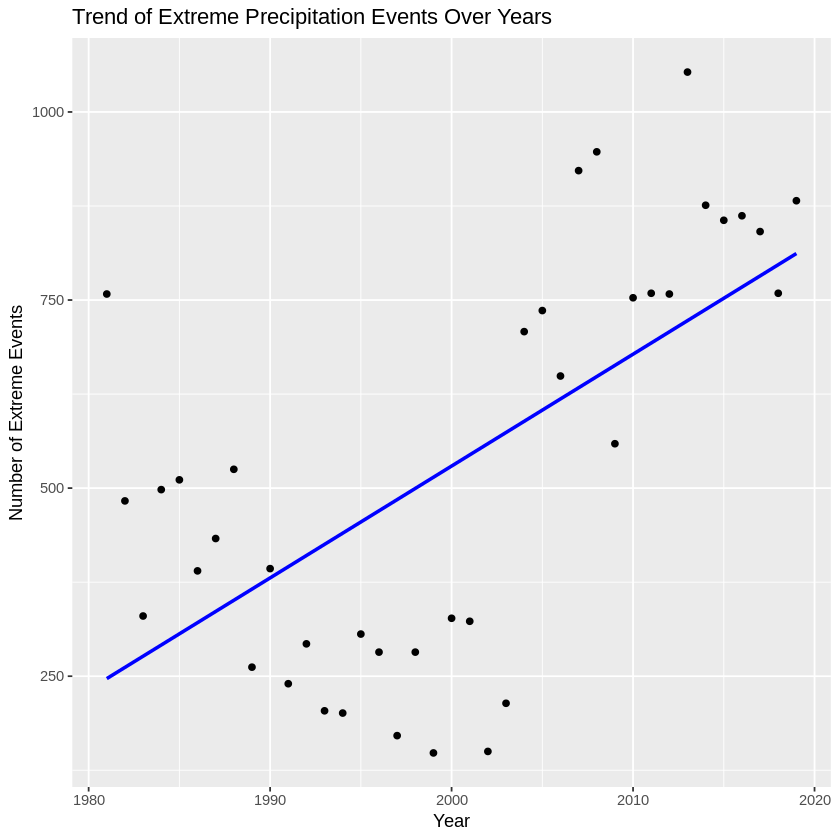

In [ ]:
# Plot yearly counts and regression line
ggplot(yearly_extremes, aes(x = as.numeric(Year), y = Count)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Trend of Extreme Precipitation Events Over Years",
       x = "Year", y = "Number of Extreme Events")


In [ ]:
# Predict future counts
future_years <- data.frame(Year = 2020:2035) # Example years
future_counts <- predict(lm(Count ~ as.numeric(Year), data = extreme_events_by_year),
                         newdata = future_years)
future_predictions <- data.frame(Year = future_years$Year, Predicted_Count = future_counts)
print(future_predictions)


   Year Predicted_Count
1  2020        17.08479
2  2021        17.46446
3  2022        17.84412
4  2023        18.22378
5  2024        18.60345
6  2025        18.98311
7  2026        19.36277
8  2027        19.74244
9  2028        20.12210
10 2029        20.50177
11 2030        20.88143
12 2031        21.26109
13 2032        21.64076
14 2033        22.02042
15 2034        22.40008
16 2035        22.77975


In [ ]:
(test$Count)        # Check actual values
(test$Predicted)    # Check predicted values


[1] 862 841 759 882

1        2        3        4 
744.0622 757.9387 771.8151 785.6916

In [ ]:
poly_model <- lm(Count ~ poly(as.numeric(Year), 2), data = yearly_extremes)
summary(poly_model)



Call:
lm(formula = Count ~ poly(as.numeric(Year), 2), data = yearly_extremes)

Residuals:
    Min      1Q  Median      3Q     Max 
-268.32 -115.24  -32.34   82.24  377.71 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  529.33      27.35  19.355  < 2e-16 ***
poly(as.numeric(Year), 2)1  1045.00     170.79   6.119 4.83e-07 ***
poly(as.numeric(Year), 2)2   811.05     170.79   4.749 3.23e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 170.8 on 36 degrees of freedom
Multiple R-squared:  0.625,	Adjusted R-squared:  0.6041 
F-statistic: 29.99 on 2 and 36 DF,  p-value: 2.155e-08


`geom_smooth()` using formula = 'y ~ x'


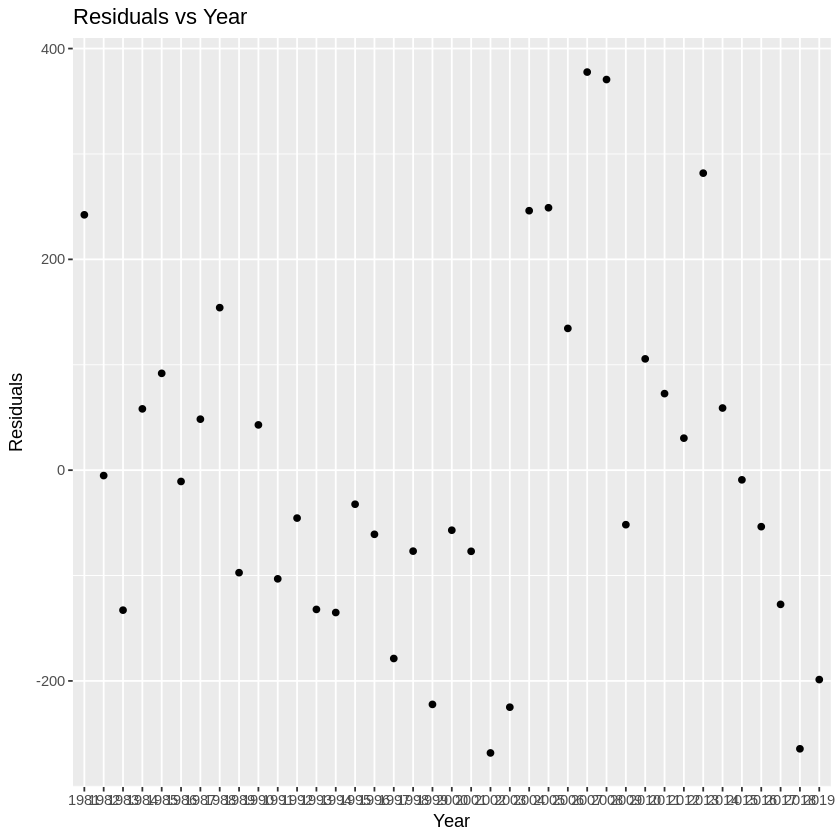

In [ ]:
residuals <- residuals(lm(formula = Count ~ poly(as.numeric(Year), 2), data = yearly_extremes))
ggplot(data.frame(Year = yearly_extremes$Year, Residuals = residuals), aes(x = Year, y = Residuals)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, color = "red") +
  labs(title = "Residuals vs Year", x = "Year", y = "Residuals")


In [ ]:
future_years <- data.frame(Year = c(2025, 2030, 2035))
predictions <- predict(lm(formula = Count ~ poly(as.numeric(Year), 2), data = yearly_extremes), newdata = future_years)
print(predictions)


Warning message in poly(as.numeric(Year), 2):
“NAs introduced by coercion”


ERROR: Error in poly(as.numeric(Year), 2): missing values are not allowed in 'poly'


In [ ]:
future_years <- data.frame(Year = c(2020,2025, 2030, 2035))  # Example years
predictions <- predict(lm(formula = Count ~ poly(as.numeric(Year), 2), data = yearly_extremes), newdata = future_years)
print(data.frame(future_years, Predicted_Count = predictions))

Warning message in poly(as.numeric(Year), 2):
“NAs introduced by coercion”


ERROR: Error in poly(as.numeric(Year), 2): missing values are not allowed in 'poly'


In [ ]:
# Combine actual and predicted data
predicted_data <- data.frame(
  Year = c(yearly_extremes$Year, c( 2020 ,2025, 2030, 2035)),
  Count = c(yearly_extremes$Count, c(1140.330 ,1472.85, 1862.74, 2309.99)),
  Type = c(rep("Actual", length(yearly_extremes$Year)), rep("Predicted", 4))
)



In [ ]:
# Ensure 'Year' is numeric
predicted_data$Year <- as.numeric(predicted_data$Year)

# Create the plot
ggplot(predicted_data, aes(x = Year, y = Count, color = Type)) +

  geom_point(size = 3) +
  scale_color_manual(values = c("Actual" = "red", "Predicted" = "blue")) +
  labs(title = "Actual vs Predicted Counts of Extreme Events",
       x = "Year", y = "Count of Extreme Events") +
  theme_minimal() +
  theme(legend.title = element_blank(),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 10)) +  # Combine the adjustments for x-axis text
  scale_x_continuous(breaks = seq(min(predicted_data$Year), max(predicted_data$Year), by = 5))  # Show every 5th year


Warning message:
“NAs introduced by coercion”


ERROR: Error in seq.default(min(predicted_data$Year), max(predicted_data$Year), : 'from' must be a finite number
